# LSE_DA201_Phil_Best

## Contents
1) Problem Statement
2) Collecting the data: [6] to [9]
3) Clean the data: [12] to [31]
4) Explore the data: [34] to [68]
5) Analyse the data: [72] to [236]
6) Visualise the data: [239] to [282]
7) Recommendation Summary

## 1) Problem Statement

Analysis into whether the NHS has enough capacity to meet demand, and how resources are currently being utilized. Failing to understand this could lead to poor investment decisions and, ultimately poorer provision of healthcare amongst the UK population.

## 2) Collecting the data

In [6]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [8]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [9]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


## 3) Clean the data

#### 3a) Actual Duration data

In [12]:
# Check data type and shape of data
print(ad.shape)
print(ad.dtypes)

(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


In [13]:
# Convert appointment_date to datetime.
import datetime as dt

# Create function to convert string to datetime
def convert_to_datetime(date_string):
    return dt.datetime.strptime(date_string, "%d-%b-%y")

# Apply function to appointment_date column
ad['appointment_date'] = ad['appointment_date'].apply(convert_to_datetime)

# Check data types again to confirm this has worked
print(ad.dtypes)

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


In [14]:
# Convert to date format to DD.MM.YYYY
ad['appointment_date'] = ad['appointment_date'].dt.strftime('%d.%m.%Y')

# Check dataframe to check format
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01.12.2021,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01.12.2021,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01.12.2021,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01.12.2021,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01.12.2021,16-20 Minutes,730


In [15]:
# Determine whether there are missing values.
ad_na = ad[ad.isna().any(axis=1)]
print(ad_na.shape)

(0, 8)


In [16]:
# Determine the metadata to double check for missing values.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


#### 3b) Appointments Regional data

In [18]:
# Check data type and shape of data.
print(ar.shape)
print(ar.dtypes)

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [19]:
# Change format of 'appointment month' to datetime
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

ar.dtypes

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object

In [20]:
# Check dataframe to check format.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [21]:
# Change format of 'appointment month' to year.month
ar['appointment_month'] = ar['appointment_month'].dt.to_period('M')

ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [22]:
# Determine whether there are missing values.
ar_na = ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

In [23]:
# Determine the metadata to double check for missing values.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype    
---  ------                             --------------   -----    
 0   icb_ons_code                       596821 non-null  object   
 1   appointment_month                  596821 non-null  period[M]
 2   appointment_status                 596821 non-null  object   
 3   hcp_type                           596821 non-null  object   
 4   appointment_mode                   596821 non-null  object   
 5   time_between_book_and_appointment  596821 non-null  object   
 6   count_of_appointments              596821 non-null  int64    
dtypes: int64(1), object(5), period[M](1)
memory usage: 31.9+ MB


#### 3c) National Categories Data

In [25]:
# Check data type and shape of data

print(nc.shape)
print(nc.dtypes)

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [26]:
# Change format of 'appointment month' to datetime
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])

nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month        datetime64[ns]
dtype: object

In [27]:
# Check dataframe to check format.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08-01
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08-01
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08-01
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08-01
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08-01


In [28]:
# Change format of 'appointment month' to year.month
nc['appointment_month'] = nc['appointment_month'].dt.to_period('M')

nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [29]:
# Convert appointment date format to DD.MM.YYYY
nc['appointment_date'] = nc['appointment_date'].dt.strftime('%d.%m.%Y')

# Check dataframe to check format
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,02.08.2021,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,02.08.2021,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,02.08.2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,02.08.2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,02.08.2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [30]:
# Determine whether there are missing values.
nc_na = nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

In [31]:
# Determine the metadata to double check for missing values.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype    
---  ------                 --------------   -----    
 0   appointment_date       817394 non-null  object   
 1   icb_ons_code           817394 non-null  object   
 2   sub_icb_location_name  817394 non-null  object   
 3   service_setting        817394 non-null  object   
 4   context_type           817394 non-null  object   
 5   national_category      817394 non-null  object   
 6   count_of_appointments  817394 non-null  int64    
 7   appointment_month      817394 non-null  period[M]
dtypes: int64(1), object(6), period[M](1)
memory usage: 49.9+ MB


## 4) Explore the data

#### 4a) Locations

In [34]:
# Identify common location columns in each dataset.
print(ad.columns)
print(nc.columns)
print(ar.columns)

Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


In [35]:
# Determine the number of unique icb_ons_codes in each data set.
loc_count_ad = ad['icb_ons_code'].nunique()
loc_count_nc = nc['icb_ons_code'].nunique()
loc_count_ar = ar['icb_ons_code'].nunique()

print("Count of icb locations (ad): ", loc_count_ad)
print("Count of icb locations (nc): ", loc_count_nc)
print("Count of icb locations (ar): ", loc_count_ar)

Count of icb locations (ad):  42
Count of icb locations (nc):  42
Count of icb locations (ar):  42


In [36]:
# Determine the hierarchy of locational data
loc_count_sub = ad['sub_icb_location_code'].nunique()
loc_count_icb = ad['icb_ons_code'].nunique()
loc_count_reg = ad['region_ons_code'].nunique()

print("Count of regions locations: ", loc_count_reg)
print("Count of icb locations: ", loc_count_icb)
print("Count of sub icb locations: ", loc_count_sub)

Count of regions locations:  7
Count of icb locations:  42
Count of sub icb locations:  106


#### 4b) Dates

In [38]:
# Ensure correct format to read date range in ad.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d.%m.%Y', errors='coerce')

# Get min and max dates in ad
ad_first_app = ad['appointment_date'].min()
ad_last_app = ad['appointment_date'].max()

# Print first and last appointments in ad
print('ad first appointment =', ad_first_app.strftime('%d.%m.%Y'))
print('ad last appointment =', ad_last_app.strftime('%d.%m.%Y'))

ad first appointment = 01.12.2021
ad last appointment = 30.06.2022


In [39]:
# Ensure correct format to read date range in nc.
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'], format='%d.%m.%Y', errors='coerce')

# Get min and max dates in ad
nc_first_app = nc['appointment_date'].min()
nc_last_app = nc['appointment_date'].max()

# Print first and last appointments in ad
print('nc first appointment =', nc_first_app.strftime('%d.%m.%Y'))
print('nc last appointment =', nc_last_app.strftime('%d.%m.%Y'))

nc first appointment = 01.08.2021
nc last appointment = 30.06.2022


In [40]:
# Get min and max months in ar
ar_first_month = ar['appointment_month'].min()
ar_last_month = ar['appointment_month'].max()

# Print first and last appointments in ad
print('ar first month =', ar_first_month.strftime('%m.%Y'))
print('ar last month =', ar_last_month.strftime('%m.%Y'))

ar first month = 01.2020
ar last month = 06.2022


In [41]:
# Check if appointment_count is consistent between datasets
# Group nc data by day
apps_x_day_nc_compare = nc.groupby(
    ['appointment_date'])['count_of_appointments'].sum()\
.reset_index()

print(apps_x_day_nc_compare.tail())

    appointment_date  count_of_appointments
329       2022-06-26                   6574
330       2022-06-27                1410883
331       2022-06-28                1335598
332       2022-06-29                1237258
333       2022-06-30                1226746


In [42]:
# Group ad data by day
apps_x_day_ad_compare = ad.groupby(
    ['appointment_date'])['count_of_appointments'].sum()\
.reset_index()

print(apps_x_day_ad_compare.tail())

    appointment_date  count_of_appointments
207       2022-06-26                   5540
208       2022-06-27                1297442
209       2022-06-28                1220805
210       2022-06-29                1130637
211       2022-06-30                1121864


In [43]:
# Group nc and ad data by month to compare with ar
# Add column for months in nc
apps_x_day_nc_compare['month_name'] = pd.to_datetime(apps_x_day_nc_compare['appointment_date']).dt.strftime('%B')

apps_x_day_nc_compare.head()

,appointment_date,count_of_appointments,month_name
0,2021-08-01,5627,August
1,2021-08-02,1222768,August
2,2021-08-03,1169920,August
3,2021-08-04,1093532,August
4,2021-08-05,1074043,August


In [44]:
# Group nc data by month
nc_month = apps_x_day_nc_compare.groupby(
    ['month_name'])['count_of_appointments'].sum()\
.reset_index()

nc_month

,month_name,count_of_appointments
0,April,23913060
1,August,23852171
2,December,25140776
3,February,25355260
4,January,25635474
5,June,25828078
6,March,29595038
7,May,27495508
8,November,30405070
9,October,30303834


In [45]:
# Add column for months in ad
apps_x_day_ad_compare['month_name'] = pd.to_datetime(apps_x_day_ad_compare['appointment_date']).dt.strftime('%B')

apps_x_day_ad_compare.head()

,appointment_date,count_of_appointments,month_name
0,2021-12-01,1156233,December
1,2021-12-02,1143290,December
2,2021-12-03,1109114,December
3,2021-12-04,75938,December
4,2021-12-05,9693,December


In [46]:
# Group ad data by month
ad_month = apps_x_day_ad_compare.groupby(
    ['month_name'])['count_of_appointments'].sum()\
.reset_index()

ad_month

,month_name,count_of_appointments
0,April,21948814
1,December,22853483
2,February,23351939
3,January,23597196
4,June,23715317
5,March,27170002
6,May,25343941


In [47]:
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [48]:
# Compare monthly appointment count for ar dataset
# Filter the ar data for dates after August 2021
ar_filtered = ar[ar['appointment_month'] >= '2021-08']

ar_filtered.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961


In [49]:
# Group ar data by month
ar_month = ar_filtered.groupby(
    ['appointment_month'])['count_of_appointments'].sum()\
.reset_index()

ar_month

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


In [50]:
# Recall the nc data grouped by month to compare
# Define the correct month order
month_order = ["August", "September", "October", "November", 
               "December", "January", "February", "March", 
               "April", "May", "June", "July"]

# Convert 'month_name' column to categorical with correct order
nc_month['month_name'] = pd.Categorical(nc_month['month_name'], categories=month_order, ordered=True)

# Sort nc_month by the ordered month_name column
nc_month = nc_month.sort_values('month_name')

nc_month

,month_name,count_of_appointments
1,August,23852171
10,September,28522501
9,October,30303834
8,November,30405070
2,December,25140776
4,January,25635474
3,February,25355260
6,March,29595038
0,April,23913060
7,May,27495508


In [51]:
# Recall the ad data grouped by month to compare
# Convert 'month' column to categorical with correct order (from above)
ad_month['month_name'] = pd.Categorical(ad_month['month_name'], categories=month_order, ordered=True)

# Sort ad_month by the ordered month_name column
ad_month = ad_month.sort_values('month_name')

ad_month

,month_name,count_of_appointments
1,December,22853483
3,January,23597196
2,February,23351939
5,March,27170002
0,April,21948814
6,May,25343941
4,June,23715317


#### 4c) Actual Duration Data

In [53]:
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [54]:
# Determine the number of duration categories.
print("Number of duration categories: ", ad['actual_duration'].nunique())

# Counts of each of those national categories.
ad.value_counts('actual_duration')

Number of duration categories:  7


actual_duration
Unknown / Data Quality    20161
1-5 Minutes               19909
6-10 Minutes              19902
11-15 Minutes             19738
16-20 Minutes             19534
21-30 Minutes             19452
31-60 Minutes             19097
Name: count, dtype: int64

In [55]:
# Determine the descriptive statistics of the data set.
ad.describe()

,appointment_date,count_of_appointments
count,137793,137793.000000
mean,2022-03-16 19:31:17.868977664,1219.080011
min,2021-12-01 00:00:00,1.000000
25%,2022-01-25 00:00:00,194.000000
50%,2022-03-16 00:00:00,696.000000
75%,2022-05-09 00:00:00,1621.000000
max,2022-06-30 00:00:00,15400.000000
std,NaN,1546.902956


#### 4d) National Categories Data

In [57]:
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [58]:
# Determine the number of service settings.
print("Number of service settings: ", nc['service_setting'].nunique())

# Counts of each of those service settings.
print(nc.value_counts('service_setting'))

Number of service settings:  5
service_setting
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: count, dtype: int64


In [59]:
# Determine the number of context types.
print("Number of context types: ", nc['context_type'].nunique())

# Counts of each of those context types.
nc.value_counts('context_type')

Number of context types:  3


context_type
Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: count, dtype: int64

In [60]:
# Determine the number of national categories.
print("Number of national categories: ", nc['national_category'].nunique())

# Counts of each of those national categories.
nc.value_counts('national_category')

Number of national categories:  18


national_category
Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                           

In [61]:
# Determine the descriptive statistics of the data set.
nc.describe()

,appointment_date,count_of_appointments
count,817394,817394.000000
mean,2022-01-16 00:50:35.860796160,362.183684
min,2021-08-01 00:00:00,1.000000
25%,2021-10-25 00:00:00,7.000000
50%,2022-01-18 00:00:00,25.000000
75%,2022-04-07 00:00:00,128.000000
max,2022-06-30 00:00:00,16590.000000
std,NaN,1084.576600


#### 4e) Appointment Regional Data

In [63]:
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [64]:
# Determine the number of appointment statuses.
print("Number of appointment statuses: ", ar['appointment_status'].nunique())

ar.value_counts('appointment_status')

Number of appointment statuses:  3


appointment_status
Attended    232137
Unknown     201324
DNA         163360
Name: count, dtype: int64

In [65]:
# Determine the number of hcp_types
print("Number of hcp types: ", ar['hcp_type'].nunique())

ar.value_counts('hcp_type')

Number of hcp types:  3


hcp_type
Other Practice staff    241557
GP                      226036
Unknown                 129228
Name: count, dtype: int64

In [66]:
# Determine the number of appointment mode.
print("Number of appointment mode: ", ar['appointment_mode'].nunique())

ar.value_counts('appointment_mode')

Number of appointment mode:  5


appointment_mode
Face-to-Face    180410
Telephone       166483
Home Visit      111194
Unknown          79147
Video/Online     59587
Name: count, dtype: int64

In [67]:
# Determine the number of time between booking and appointment
print("Number of time categories: ", ar['time_between_book_and_appointment'].nunique())

ar.value_counts('time_between_book_and_appointment')

Number of time categories:  8


time_between_book_and_appointment
Same Day                  95502
2 to 7 Days               92409
1 Day                     88957
8  to 14 Days             82698
15  to 21 Days            73666
22  to 28 Days            68755
More than 28 Days         65147
Unknown / Data Quality    29687
Name: count, dtype: int64

In [68]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


## 5) Analyse the data

#### 5a) How do the number of appointments change per month?

##### Findings from below analysis
- Covid pandemic impacts data upto and including July 2021
- This leaves 11 months worth of data to analyse
- The highest month for appointments is November 2021 (30,405,070 appointments)
- The lowest month for appointments is August 2021 (23,852,171 appointments)

In [72]:
# Group ar data by month
apps_x_month = ar.groupby(
    ['appointment_month'])['count_of_appointments'].sum()\
.reset_index()

print(apps_x_month.head())

  appointment_month  count_of_appointments
0           2020-01               27199296
1           2020-02               24104621
2           2020-03               24053468
3           2020-04               16007881
4           2020-05               16417212


In [73]:
# Get descriptive statistics
apps_x_month_ds = apps_x_month.describe()

# Convert 'count_of_appointments' statistics to integers
apps_x_month_ds['count_of_appointments'] = apps_x_month_ds['count_of_appointments'].astype(int)

# Display the formatted output
print(apps_x_month_ds)

       count_of_appointments
count                     30
mean                24760150
std                  3472765
min                 16007881
25%                 23515280
50%                 25101189
75%                 27095517
max                 30405070


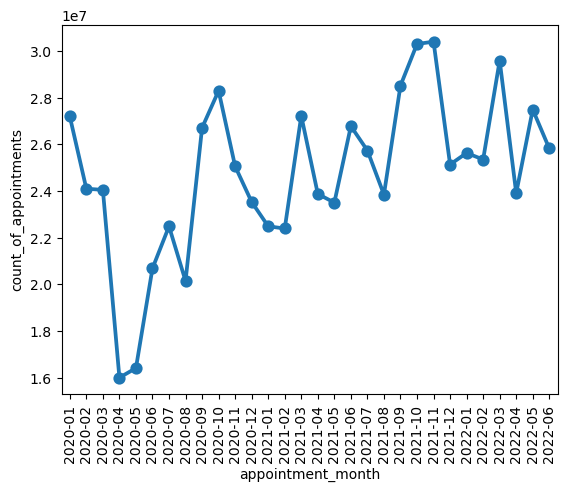

In [74]:
# Create a pointplot
sns.pointplot(x='appointment_month', y='count_of_appointments', data=apps_x_month)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

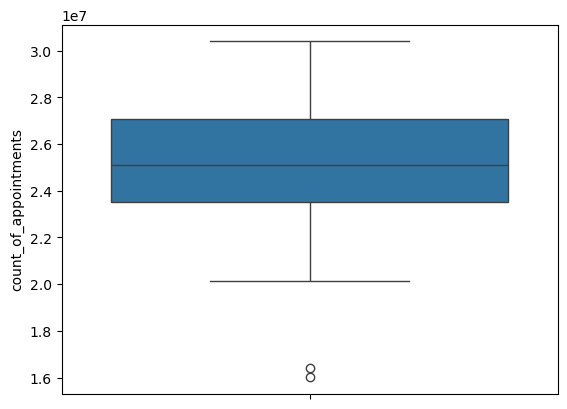

In [75]:
# Idenitfy outliers through boxplot
sns.boxplot(y=apps_x_month['count_of_appointments'])

# Show the plot
plt.show()


In [76]:
# Filter data >July 2021 as data impacted by covid restrictions
apps_x_non_covid_months = apps_x_month[apps_x_month['appointment_month']>'2021-07']\
    .sort_values('count_of_appointments', ascending=False)

print(apps_x_non_covid_months)

   appointment_month  count_of_appointments
22           2021-11               30405070
21           2021-10               30303834
26           2022-03               29595038
20           2021-09               28522501
28           2022-05               27495508
29           2022-06               25828078
24           2022-01               25635474
25           2022-02               25355260
23           2021-12               25140776
27           2022-04               23913060
19           2021-08               23852171


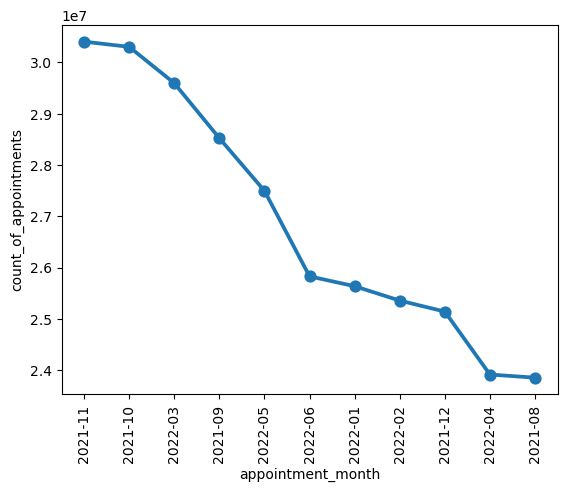

In [77]:
# Create a pointplot
sns.pointplot(x='appointment_month', y='count_of_appointments', data=apps_x_non_covid_months)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

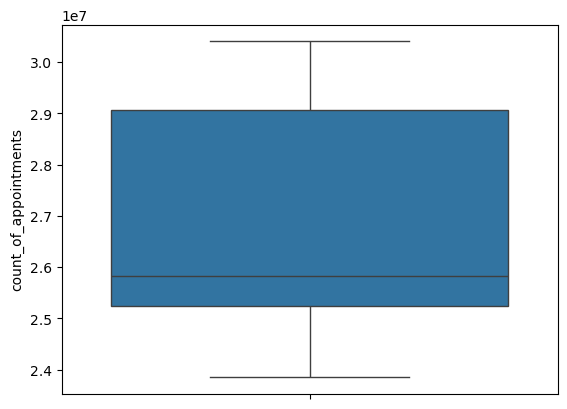

In [78]:
# Idenitfy outliers through boxplot
sns.boxplot(y=apps_x_non_covid_months['count_of_appointments'])

# Show the plot
plt.show()

#### 5b) How do the days of the week influence appointment count?

##### Findings from the below analysis
- Average daily appointment count for whole dataset is 886,367
- There is a significant drop in appointments on Saturday + Sunday, due to GP practices being closed, and several outliers in the data
- Removed all weekends from data and outliers
- Friday is the lowest day of week in terms of average appointment count (1,182,204)
- Mondays is the highest day of the week in terms of average appointment count (1,387,447)
- The average appointment count declines through the course of the working week

In [81]:
# Group nc data by day
apps_x_day = nc.groupby(
    ['appointment_date'])['count_of_appointments'].sum()\
.reset_index()

print(apps_x_day.head())

  appointment_date  count_of_appointments
0       2021-08-01                   5627
1       2021-08-02                1222768
2       2021-08-03                1169920
3       2021-08-04                1093532
4       2021-08-05                1074043


In [82]:
# Get descriptive statistics
apps_x_day_ds = apps_x_day.describe()

# Convert 'count_of_appointments' statistics to integers
apps_x_day_ds['count_of_appointments'] = apps_x_day_ds['count_of_appointments'].astype(int)

# Display the formatted output
print(apps_x_day_ds)

          appointment_date  count_of_appointments
count                  334                    334
mean   2022-01-14 12:00:00                 886367
min    2021-08-01 00:00:00                   3693
25%    2021-10-23 06:00:00                  40102
50%    2022-01-14 12:00:00                1208260
75%    2022-04-07 18:00:00                1292652
max    2022-06-30 00:00:00                1480215
std                    NaN                 567945


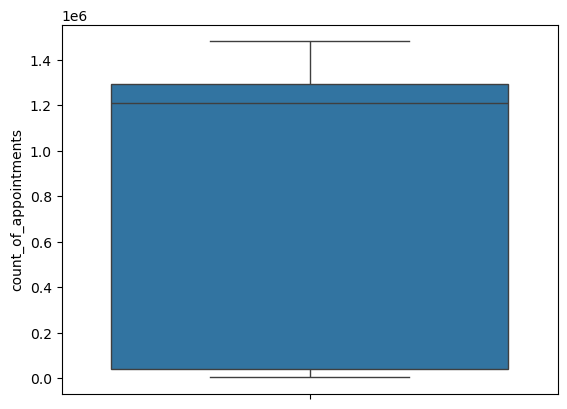

In [83]:
# Idenitfy outliers through boxplot
sns.boxplot(y=apps_x_day['count_of_appointments'])

# Show the plot
plt.show()

In [84]:
# Check difference in days of the week
# Add day of the week column
apps_x_day['day_of_week'] = apps_x_day['appointment_date'].dt.day_name()

print(apps_x_day.head())

  appointment_date  count_of_appointments day_of_week
0       2021-08-01                   5627      Sunday
1       2021-08-02                1222768      Monday
2       2021-08-03                1169920     Tuesday
3       2021-08-04                1093532   Wednesday
4       2021-08-05                1074043    Thursday


In [85]:
# Group by day of the week
apps_x_dow = apps_x_day.groupby(
    ['day_of_week'])['count_of_appointments'].sum()\
.reset_index()

print(apps_x_dow)

  day_of_week  count_of_appointments
0      Friday               52394868
1      Monday               59695267
2    Saturday                5574922
3      Sunday                 614161
4    Thursday               56976354
5     Tuesday               61806933
6   Wednesday               58984265


In [86]:
# Order days of the week.
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the column to a categorical type sorted in the above order
apps_x_dow['day_of_week'] = pd.Categorical(apps_x_dow['day_of_week'], categories=day_order, ordered=True)

# Sort data by day of week
apps_x_dow = apps_x_dow.sort_values(by='day_of_week')

print(apps_x_dow)

  day_of_week  count_of_appointments
1      Monday               59695267
5     Tuesday               61806933
6   Wednesday               58984265
4    Thursday               56976354
0      Friday               52394868
2    Saturday                5574922
3      Sunday                 614161


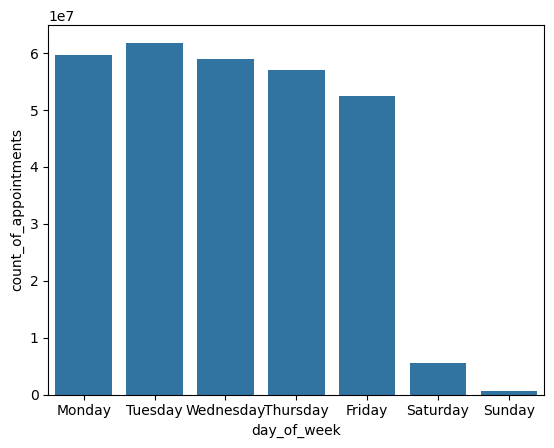

In [87]:
# Create a barplot of days of week
sns.barplot(x='day_of_week', y='count_of_appointments', data=apps_x_dow)

# Show the plot
plt.show()

In [88]:
# Get descriptive statistics
apps_x_dow_ds = apps_x_dow.describe()

# Convert 'count_of_appointments' statistics to integers
apps_x_dow_ds['count_of_appointments'] = apps_x_dow_ds['count_of_appointments'].astype(int)

# Display the formatted output
print(apps_x_dow_ds)

       count_of_appointments
count                      7
mean                42292395
std                 26972894
min                   614161
25%                 28984895
50%                 56976354
75%                 59339766
max                 61806933


In [89]:
# Filter weekdays only when GPs open
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Filter out weekends
apps_x_wd = apps_x_dow[apps_x_dow['day_of_week'].isin(weekdays)]

# Print the filtered DataFrame
print(apps_x_wd)

  day_of_week  count_of_appointments
1      Monday               59695267
5     Tuesday               61806933
6   Wednesday               58984265
4    Thursday               56976354
0      Friday               52394868


In [90]:
# Add percentage column to look at relative difference
# Sum the total count_of_appointments
total_appointments = apps_x_wd['count_of_appointments'].sum()

# Create a new percentage column
apps_x_wd['percentage'] = (apps_x_wd['count_of_appointments'] / total_appointments) * 100

# Round to 1 decimal places
apps_x_wd['percentage'] = apps_x_wd['percentage'].round(1)

# Print the updated DataFrame
print(apps_x_wd)


  day_of_week  count_of_appointments  percentage
1      Monday               59695267        20.6
5     Tuesday               61806933        21.3
6   Wednesday               58984265        20.3
4    Thursday               56976354        19.7
0      Friday               52394868        18.1


In [91]:
# Get descriptive statistics
apps_x_wd_ds = apps_x_wd.describe()

# Convert 'count_of_appointments' statistics to integers
apps_x_wd_ds['count_of_appointments'] = apps_x_wd_ds['count_of_appointments'].astype(int)

# Display the formatted output
print(apps_x_wd_ds)

       count_of_appointments  percentage
count                      5    5.000000
mean                57971537   20.000000
std                  3563592    1.208305
min                 52394868   18.100000
25%                 56976354   19.700000
50%                 58984265   20.300000
75%                 59695267   20.600000
max                 61806933   21.300000


In [92]:
# Filter out weekends from apps_x_day
apps_x_day_wd = apps_x_day[apps_x_day['appointment_date'].dt.dayofweek < 5]

print(apps_x_day_wd.head(10))

   appointment_date  count_of_appointments day_of_week
1        2021-08-02                1222768      Monday
2        2021-08-03                1169920     Tuesday
3        2021-08-04                1093532   Wednesday
4        2021-08-05                1074043    Thursday
5        2021-08-06                1032165      Friday
8        2021-08-09                1223650      Monday
9        2021-08-10                1167188     Tuesday
10       2021-08-11                1104807   Wednesday
11       2021-08-12                1080555    Thursday
12       2021-08-13                1041610      Friday


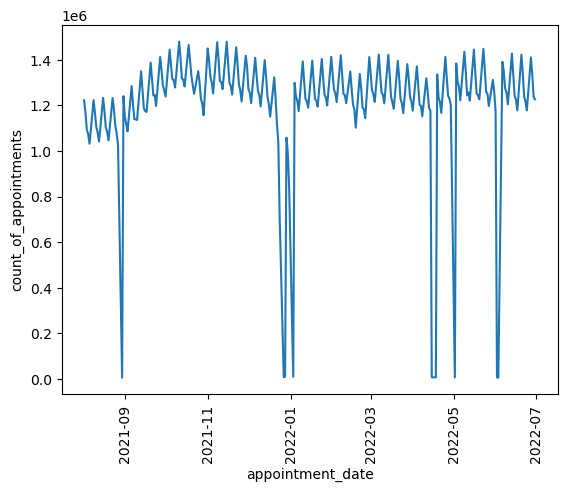

In [93]:
# Show weekdays over time on a linegraph
sns.lineplot(x='appointment_date', y='count_of_appointments', data=apps_x_day_wd)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

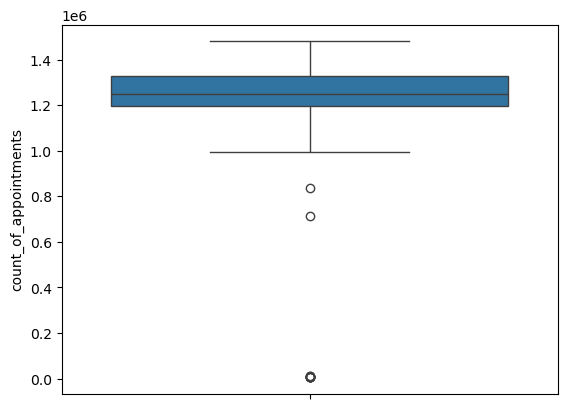

In [94]:
# Idenitfy outliers through boxplot
sns.boxplot(y=apps_x_day_wd['count_of_appointments'])

# Show the plot
plt.show()

In [95]:
# Filter out any days below 1 million appointments (outliers)
apps_x_day_flt = apps_x_day_wd[apps_x_day_wd['count_of_appointments']>1000000]

print(apps_x_day_flt.head())
print(apps_x_day_flt.tail())

  appointment_date  count_of_appointments day_of_week
1       2021-08-02                1222768      Monday
2       2021-08-03                1169920     Tuesday
3       2021-08-04                1093532   Wednesday
4       2021-08-05                1074043    Thursday
5       2021-08-06                1032165      Friday
    appointment_date  count_of_appointments day_of_week
327       2022-06-24                1178564      Friday
330       2022-06-27                1410883      Monday
331       2022-06-28                1335598     Tuesday
332       2022-06-29                1237258   Wednesday
333       2022-06-30                1226746    Thursday


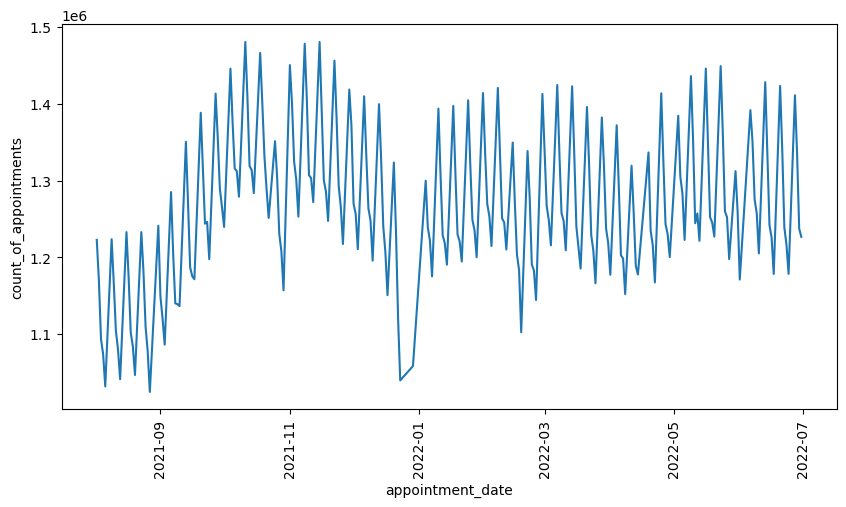

In [96]:
# Show over time on a linegraph
plt.figure(figsize=(10, 5))
sns.lineplot(x='appointment_date', y='count_of_appointments', data=apps_x_day_flt)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [97]:
# Average number of appointments by day of week
avg_app_dow = apps_x_day_flt.groupby('day_of_week')['count_of_appointments'].mean().reset_index()

# Remove scientific notation
pd.options.display.float_format = '{:.0f}'.format

avg_app_dow

,day_of_week,count_of_appointments
0,Friday,1182204
1,Monday,1387447
2,Thursday,1216870
3,Tuesday,1314824
4,Wednesday,1228839


In [98]:
# Reorder days of the week.
day_order_wd = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Convert the column to a categorical type sorted in the above order
avg_app_dow['day_of_week'] = pd.Categorical(avg_app_dow['day_of_week'], categories=day_order_wd, ordered=True)

# Sort data by day of week
avg_app_dow = avg_app_dow.sort_values(by='day_of_week')

avg_app_dow

,day_of_week,count_of_appointments
1,Monday,1387447
3,Tuesday,1314824
4,Wednesday,1228839
2,Thursday,1216870
0,Friday,1182204


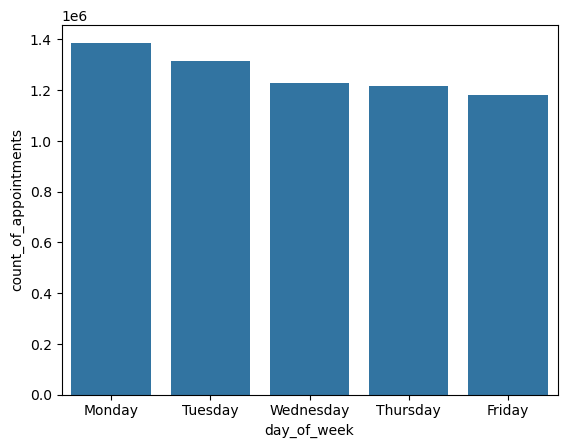

In [99]:
# Create a barplot of weekdays
sns.barplot(x='day_of_week', y='count_of_appointments', data=avg_app_dow)

# Show the plot
plt.show()

In [100]:
# Create same visualisation just for November (busiest time of year)
# Filter apps_x_day_flt only for days in November
apps_x_day_flt_nov = apps_x_day_flt[(apps_x_day_flt['appointment_date'].dt.month == 11)]

apps_x_day_flt_nov

,appointment_date,count_of_appointments,day_of_week
92,2021-11-01,1450076,Monday
93,2021-11-02,1400299,Tuesday
94,2021-11-03,1324445,Wednesday
95,2021-11-04,1301327,Thursday
96,2021-11-05,1252991,Friday
99,2021-11-08,1477922,Monday
100,2021-11-09,1404467,Tuesday
101,2021-11-10,1306877,Wednesday
102,2021-11-11,1303133,Thursday
103,2021-11-12,1271938,Friday


In [101]:
# Average number of appointments by day of week
avg_app_dow_nov = apps_x_day_flt_nov.groupby('day_of_week')['count_of_appointments'].mean().reset_index()

# Remove scientific notation
pd.options.display.float_format = '{:.0f}'.format

avg_app_dow_nov

,day_of_week,count_of_appointments
0,Friday,1247452
1,Monday,1456483
2,Thursday,1288840
3,Tuesday,1389855
4,Wednesday,1306138


In [102]:
# Reorder days of the week.
day_order_wd = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Convert the column to a categorical type sorted in the above order
avg_app_dow_nov['day_of_week'] = pd.Categorical(avg_app_dow_nov['day_of_week'], categories=day_order_wd, ordered=True)

# Sort data by day of week
avg_app_dow_nov = avg_app_dow_nov.sort_values(by='day_of_week')

avg_app_dow_nov

,day_of_week,count_of_appointments
1,Monday,1456483
3,Tuesday,1389855
4,Wednesday,1306138
2,Thursday,1288840
0,Friday,1247452


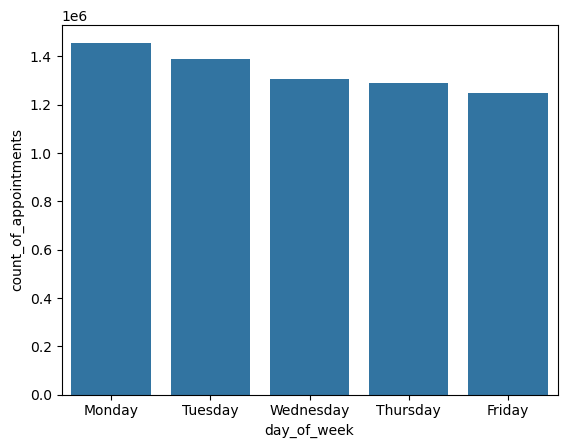

In [103]:
# Create a barplot of weekdays
sns.barplot(x='day_of_week', y='count_of_appointments', data=avg_app_dow_nov)

# Show the plot
plt.show()

#### 5c) How does weekday appointment count change through the year?

##### Findings from the below analysis
- August is the lowest month for average daily weekday appointments (1,129,529 appointments)
- November is the highest month for average daily weekday appointments (1,345,519 appointments)
- Between August and November appointment count grows every month from the lowest point to the highest point of the year
- It is not known whether this is because demand or supply

In [106]:
# Look at monthly variations in daily weekday appointments
# View previous dataframe apps_x_day_flt (all outliers removed)
apps_x_day_flt

,appointment_date,count_of_appointments,day_of_week
1,2021-08-02,1222768,Monday
2,2021-08-03,1169920,Tuesday
3,2021-08-04,1093532,Wednesday
4,2021-08-05,1074043,Thursday
5,2021-08-06,1032165,Friday
...,...,...,...
327,2022-06-24,1178564,Friday
330,2022-06-27,1410883,Monday
331,2022-06-28,1335598,Tuesday
332,2022-06-29,1237258,Wednesday


In [107]:
# Add column for months
apps_x_day_flt['month_name'] = pd.to_datetime(apps_x_day_flt['appointment_date']).dt.strftime('%B')

apps_x_day_flt

,appointment_date,count_of_appointments,day_of_week,month_name
1,2021-08-02,1222768,Monday,August
2,2021-08-03,1169920,Tuesday,August
3,2021-08-04,1093532,Wednesday,August
4,2021-08-05,1074043,Thursday,August
5,2021-08-06,1032165,Friday,August
...,...,...,...,...
327,2022-06-24,1178564,Friday,June
330,2022-06-27,1410883,Monday,June
331,2022-06-28,1335598,Tuesday,June
332,2022-06-29,1237258,Wednesday,June


In [108]:
# Average number of appointments on weekdays by month
avg_app_dow_mon = apps_x_day_flt.groupby('month_name')['count_of_appointments'].mean().reset_index()

# Remove scientific notation
pd.options.display.float_format = '{:.0f}'.format

avg_app_dow_mon

,month_name,count_of_appointments
0,April,1247687
1,August,1129529
2,December,1238183
3,February,1259643
4,January,1272445
5,June,1283363
6,March,1278974
7,May,1300806
8,November,1345519
9,October,1321946


In [109]:
# Reorder months of the year.
month_order = ['January', 'February', 'March', 'April', 
               'May', 'June', 'July', 'August', 'September', 
               'October', 'November', 'December']

# Convert the column to a categorical type sorted in the above order
avg_app_dow_mon['month_name'] = pd.Categorical(avg_app_dow_mon['month_name'], categories=month_order, ordered=True)

# Sort data by month
avg_app_dow_mon = avg_app_dow_mon.sort_values(by='month_name')

avg_app_dow_mon

,month_name,count_of_appointments
4,January,1272445
3,February,1259643
6,March,1278974
0,April,1247687
7,May,1300806
5,June,1283363
1,August,1129529
10,September,1233360
9,October,1321946
8,November,1345519


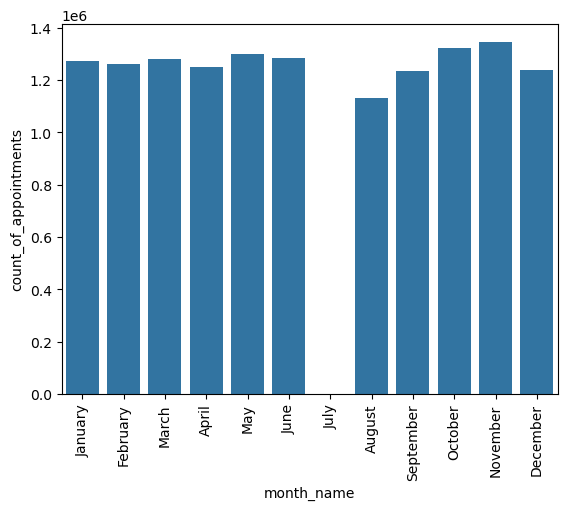

In [110]:
# Create a barplot of weekdays
sns.barplot(x='month_name', y='count_of_appointments', data=avg_app_dow_mon)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

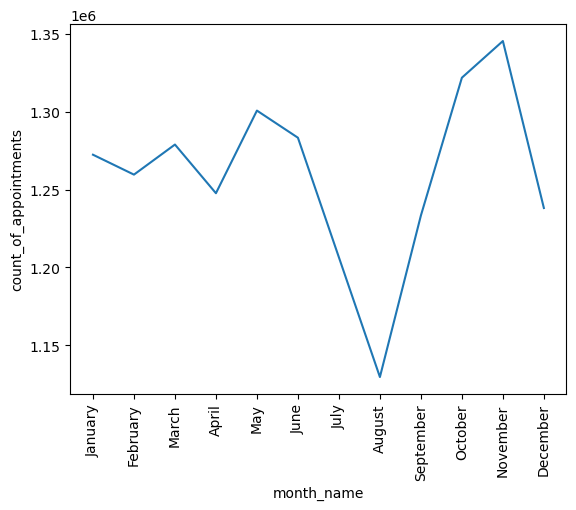

In [111]:
# Create a lineplot of average weekday appointment count by month
sns.lineplot(x='month_name', y='count_of_appointments', data=avg_app_dow_mon)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [112]:
# Sort data by count of appointments
avg_app_dow_mon = avg_app_dow_mon.sort_values(by='count_of_appointments')

avg_app_dow_mon

,month_name,count_of_appointments
1,August,1129529
10,September,1233360
2,December,1238183
0,April,1247687
3,February,1259643
4,January,1272445
6,March,1278974
5,June,1283363
7,May,1300806
9,October,1321946


#### 5d) Which health professionals take the appointments? (HCP Type)

##### From the below analysis
- Overall 51% of appointments were done by GPs
- 46% were done by Other Health Professionals
- During the busiest time of the year Oct and November, Other Health Professionals took a higher % of appointments

In [115]:
# Review ar dataframe
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [116]:
# Group data by date and hcp_type
# Filter out data before August 2021
ar_filtered = ar[ar['appointment_month'] >= '2021-08-01']

# Exclude 'unknown' hcp_type
ar_filtered = ar_filtered[ar_filtered['hcp_type'] != 'Unknown']

# Group data by date and hcp_type
app_x_day_hcp = ar_filtered.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

app_x_day_hcp


,appointment_month,hcp_type,count_of_appointments
0,2021-08,GP,12299022
1,2021-08,Other Practice staff,10797821
2,2021-09,GP,14487785
3,2021-09,Other Practice staff,13126731
4,2021-10,GP,14300751
5,2021-10,Other Practice staff,14942504
6,2021-11,GP,14897749
7,2021-11,Other Practice staff,14432800
8,2021-12,GP,12654767
9,2021-12,Other Practice staff,11614470


In [117]:
# Convert Period to String
app_x_day_hcp['appointment_month'] = app_x_day_hcp['appointment_month'].astype(str)

app_x_day_hcp.dtypes

appointment_month        object
hcp_type                 object
count_of_appointments     int64
dtype: object

In [118]:
# add appointments per day
# add number of days in each month
app_x_day_hcp['days_in_month'] = pd.to_datetime(app_x_day_hcp['appointment_month']).dt.days_in_month

# add appointments per day
app_x_day_hcp['apps_per_day'] = app_x_day_hcp['count_of_appointments'] / app_x_day_hcp['days_in_month']

app_x_day_hcp

,appointment_month,hcp_type,count_of_appointments,days_in_month,apps_per_day
0,2021-08,GP,12299022,31,396743
1,2021-08,Other Practice staff,10797821,31,348317
2,2021-09,GP,14487785,30,482926
3,2021-09,Other Practice staff,13126731,30,437558
4,2021-10,GP,14300751,31,461315
5,2021-10,Other Practice staff,14942504,31,482016
6,2021-11,GP,14897749,30,496592
7,2021-11,Other Practice staff,14432800,30,481093
8,2021-12,GP,12654767,31,408218
9,2021-12,Other Practice staff,11614470,31,374660


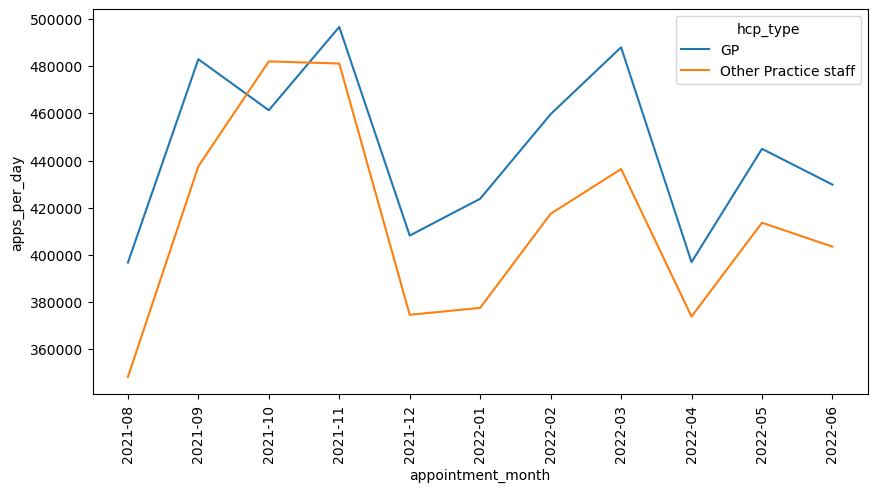

In [119]:
# Create linechart to show change over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='appointment_month', y='apps_per_day', hue='hcp_type', data=app_x_day_hcp)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [120]:
# Pivot the dataframe to allow for percentages by month
app_x_day_hcp_pivot = app_x_day_hcp.pivot_table(index='appointment_month', columns='hcp_type', values='apps_per_day', aggfunc='sum')

app_x_day_hcp_pivot

hcp_type,GP,Other Practice staff
appointment_month,,
2021-08,396743,348317
2021-09,482926,437558
2021-10,461315,482016
2021-11,496592,481093
2021-12,408218,374660
2022-01,423808,377585
2022-02,459633,417432
2022-03,487975,436406
2022-04,396949,373925


In [121]:
# Add a totals column
app_x_day_hcp_pivot['Total_apps_per_day'] = app_x_day_hcp_pivot.sum(axis=1)

# Add a totals row
app_x_day_hcp_pivot.loc["Total"] = app_x_day_hcp_pivot.sum()

app_x_day_hcp_pivot

hcp_type,GP,Other Practice staff,Total_apps_per_day
appointment_month,,,
2021-08,396743,348317,745059
2021-09,482926,437558,920484
2021-10,461315,482016,943331
2021-11,496592,481093,977685
2021-12,408218,374660,782879
2022-01,423808,377585,801393
2022-02,459633,417432,877065
2022-03,487975,436406,924381
2022-04,396949,373925,770873


In [122]:
# Convert values to percentages
# Create a new dataframe copying original
app_x_day_hcp_pct = app_x_day_hcp_pivot.copy()

# Convert values to percentages
app_x_day_hcp_pct[['GP', 'Other Practice staff']] = \
    app_x_day_hcp_pct[['GP', 'Other Practice staff']]\
    .div(app_x_day_hcp_pct['Total_apps_per_day'], axis=0) * 100

app_x_day_hcp_pct

hcp_type,GP,Other Practice staff,Total_apps_per_day
appointment_month,,,
2021-08,53,47,745059
2021-09,52,48,920484
2021-10,49,51,943331
2021-11,51,49,977685
2021-12,52,48,782879
2022-01,53,47,801393
2022-02,52,48,877065
2022-03,53,47,924381
2022-04,51,49,770873


<Axes: xlabel='appointment_month'>

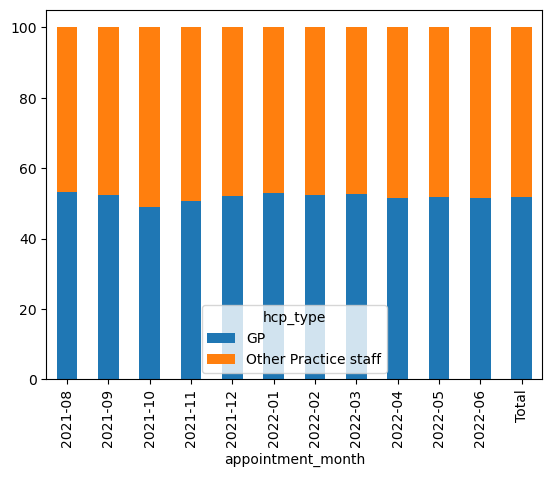

In [123]:
# Create a stacked barchart to visualise the difference in months
app_x_day_hcp_pct[['GP', 'Other Practice staff']].plot(
    kind='bar', stacked=True)

#### 5e) What percentage of appointments are attended? (Appointment Status)

##### From the below analysis:
- 91% of appointments between August 2021 and June 2022 were attended
- This figure does not significantly alter between months

In [126]:
# Group data by date and appointment status)
apps_x_day_as = ar.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()

apps_x_day_as

,appointment_month,appointment_status,count_of_appointments
0,2020-01,Attended,24538291
1,2020-01,DNA,1298269
2,2020-01,Unknown,1362736
3,2020-02,Attended,21640067
4,2020-02,DNA,1215154
...,...,...,...
85,2022-05,DNA,1199518
86,2022-05,Unknown,952049
87,2022-06,Attended,23715317
88,2022-06,DNA,1167790


In [127]:
# Filter out covid months (i.e. months before August 2021)
apps_x_day_as_flt = apps_x_day_as[apps_x_day_as['appointment_month'] >= '2021-08']

apps_x_day_as_flt

,appointment_month,appointment_status,count_of_appointments
57,2021-08,Attended,22081765
58,2021-08,DNA,949137
59,2021-08,Unknown,821269
60,2021-09,Attended,25757066
61,2021-09,DNA,1321348
62,2021-09,Unknown,1444087
63,2021-10,Attended,27170506
64,2021-10,DNA,1565624
65,2021-10,Unknown,1567704
66,2021-11,Attended,27667665


In [128]:
# Convert Period to String
apps_x_day_as_flt['appointment_month'] = apps_x_day_as_flt['appointment_month'].astype(str)

apps_x_day_as_flt.dtypes

appointment_month        object
appointment_status       object
count_of_appointments     int64
dtype: object

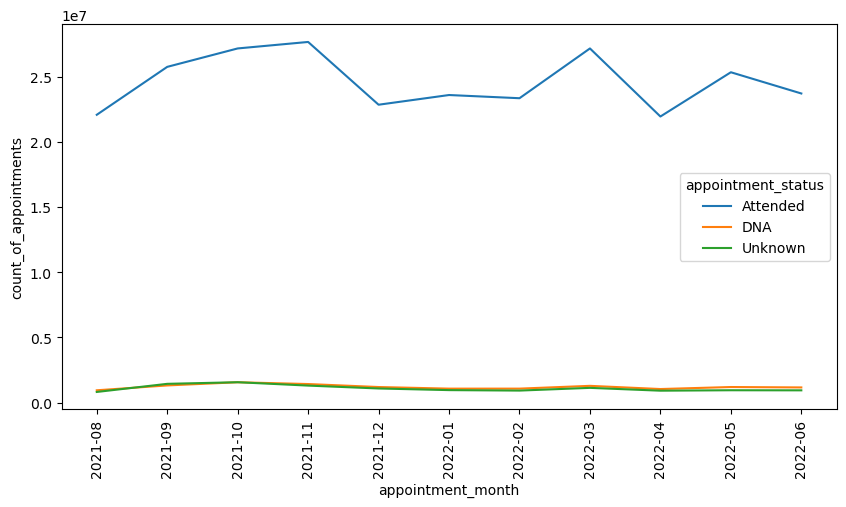

In [129]:
# Create linechart to show change over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data=apps_x_day_as_flt)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [130]:
# Pivot the dataframe to allow for percentages by month
apps_x_day_as_pivot = apps_x_day_as_flt.pivot_table(\
    index='appointment_month', 
    columns='appointment_status', 
    values='count_of_appointments', 
    aggfunc='sum')

apps_x_day_as_pivot

appointment_status,Attended,DNA,Unknown
appointment_month,,,
2021-08,22081765,949137,821269
2021-09,25757066,1321348,1444087
2021-10,27170506,1565624,1567704
2021-11,27667665,1428087,1309318
2021-12,22853483,1198866,1088427
2022-01,23597196,1076013,962265
2022-02,23351939,1076658,926663
2022-03,27170002,1289888,1135148
2022-04,21948814,1045455,918791


In [131]:
# Add a totals column
apps_x_day_as_pivot['Total_apps'] = apps_x_day_as_pivot.sum(axis=1)

# Add a totals row
apps_x_day_as_pivot.loc["Total"] = apps_x_day_as_pivot.sum()

apps_x_day_as_pivot

appointment_status,Attended,DNA,Unknown,Total_apps
appointment_month,,,,
2021-08,22081765,949137,821269,23852171
2021-09,25757066,1321348,1444087,28522501
2021-10,27170506,1565624,1567704,30303834
2021-11,27667665,1428087,1309318,30405070
2021-12,22853483,1198866,1088427,25140776
2022-01,23597196,1076013,962265,25635474
2022-02,23351939,1076658,926663,25355260
2022-03,27170002,1289888,1135148,29595038
2022-04,21948814,1045455,918791,23913060


In [132]:
# Convert values to percentages
# Create a new dataframe copying original
apps_x_day_as_pct = apps_x_day_as_pivot.copy()

# Convert values to percentages
apps_x_day_as_pct[['Attended', 'DNA', 'Unknown']] = \
    apps_x_day_as_pct[['Attended', 'DNA', 'Unknown']]\
    .div(apps_x_day_as_pct['Total_apps'], axis=0) * 100

apps_x_day_as_pct

appointment_status,Attended,DNA,Unknown,Total_apps
appointment_month,,,,
2021-08,93,4,3,23852171
2021-09,90,5,5,28522501
2021-10,90,5,5,30303834
2021-11,91,5,4,30405070
2021-12,91,5,4,25140776
2022-01,92,4,4,25635474
2022-02,92,4,4,25355260
2022-03,92,4,4,29595038
2022-04,92,4,4,23913060


<Axes: xlabel='appointment_month'>

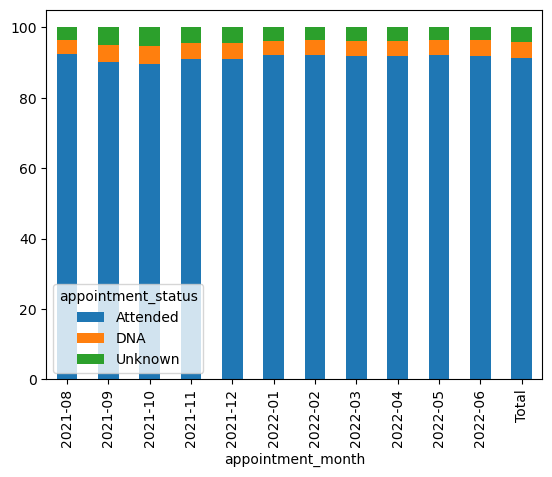

In [133]:
# Create a stacked barchart to visualise the difference in months
apps_x_day_as_pct[['Attended', 'DNA', 'Unknown']].plot(
    kind='bar', stacked=True)

#### 5f) What percentage of appointments are made face-to-face?

##### From the below analysis:
- 62% of appointments are done face to face
- 34% of appointments are done via telephone
- Broadly, the amount of face-to-face appointments is greater proportionately during busy periods

In [136]:
# Group data by date and appointment mode
apps_x_day_am = ar.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

apps_x_day_am

,appointment_month,appointment_mode,count_of_appointments
0,2020-01,Face-to-Face,21733394
1,2020-01,Home Visit,266942
2,2020-01,Telephone,3701775
3,2020-01,Unknown,1302979
4,2020-01,Video/Online,194206
...,...,...,...
145,2022-06,Face-to-Face,16744191
146,2022-06,Home Visit,187640
147,2022-06,Telephone,8082270
148,2022-06,Unknown,677860


In [137]:
# Filter out covid months (i.e. months before August 2021)
apps_x_day_am_flt = apps_x_day_am[apps_x_day_am['appointment_month'] >= '2021-08']

apps_x_day_am_flt

,appointment_month,appointment_mode,count_of_appointments
95,2021-08,Face-to-Face,13717325
96,2021-08,Home Visit,151619
97,2021-08,Telephone,9149072
98,2021-08,Unknown,724126
99,2021-08,Video/Online,110029
100,2021-09,Face-to-Face,17266602
101,2021-09,Home Visit,171829
102,2021-09,Telephone,10068770
103,2021-09,Unknown,859946
104,2021-09,Video/Online,155354


In [138]:
# Convert Period to String
apps_x_day_am_flt['appointment_month'] = apps_x_day_am_flt['appointment_month'].astype(str)

apps_x_day_am_flt.dtypes

appointment_month        object
appointment_mode         object
count_of_appointments     int64
dtype: object

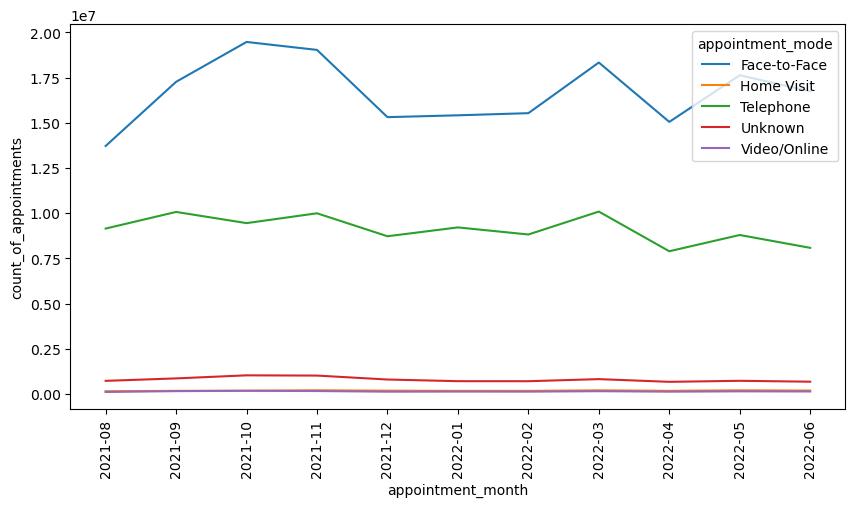

In [139]:
# Create linechart to show change over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=apps_x_day_am_flt)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [140]:
# Pivot the dataframe to allow for percentages by month
apps_x_day_am_pivot = apps_x_day_am_flt.pivot_table(\
    index='appointment_month', 
    columns='appointment_mode', 
    values='count_of_appointments', 
    aggfunc='sum')

apps_x_day_am_pivot

appointment_mode,Face-to-Face,Home Visit,Telephone,Unknown,Video/Online
appointment_month,,,,,
2021-08,13717325,151619,9149072,724126,110029
2021-09,17266602,171829,10068770,859946,155354
2021-10,19471561,178593,9449544,1029671,174465
2021-11,19031327,203352,9993842,1015969,160580
2021-12,15312340,181264,8723325,798049,125798
2022-01,15414102,171669,9212553,706352,130798
2022-02,15531971,170435,8820538,704619,127697
2022-03,18333743,200945,10088419,819913,152018
2022-04,15049567,172936,7893805,670299,126453


In [141]:
# Add a totals column
apps_x_day_am_pivot['Total_apps'] = apps_x_day_am_pivot.sum(axis=1)

# Add a totals row
apps_x_day_am_pivot.loc["Total"] = apps_x_day_am_pivot.sum()

apps_x_day_am_pivot

appointment_mode,Face-to-Face,Home Visit,Telephone,Unknown,Video/Online,Total_apps
appointment_month,,,,,,
2021-08,13717325,151619,9149072,724126,110029,23852171
2021-09,17266602,171829,10068770,859946,155354,28522501
2021-10,19471561,178593,9449544,1029671,174465,30303834
2021-11,19031327,203352,9993842,1015969,160580,30405070
2021-12,15312340,181264,8723325,798049,125798,25140776
2022-01,15414102,171669,9212553,706352,130798,25635474
2022-02,15531971,170435,8820538,704619,127697,25355260
2022-03,18333743,200945,10088419,819913,152018,29595038
2022-04,15049567,172936,7893805,670299,126453,23913060


In [142]:
# Convert values to percentages
# Create a new dataframe copying original
apps_x_day_am_pct = apps_x_day_am_pivot.copy()

# Convert values to percentages
apps_x_day_am_pct[['Face-to-Face', 'Home Visit', 'Telephone', 'Unknown', 'Video/Online']] = \
    apps_x_day_am_pct[['Face-to-Face', 'Home Visit', 'Telephone', 'Unknown', 'Video/Online']]\
    .div(apps_x_day_am_pct['Total_apps'], axis=0) * 100

apps_x_day_am_pct

appointment_mode,Face-to-Face,Home Visit,Telephone,Unknown,Video/Online,Total_apps
appointment_month,,,,,,
2021-08,58,1,38,3,0,23852171
2021-09,61,1,35,3,1,28522501
2021-10,64,1,31,3,1,30303834
2021-11,63,1,33,3,1,30405070
2021-12,61,1,35,3,1,25140776
2022-01,60,1,36,3,1,25635474
2022-02,61,1,35,3,1,25355260
2022-03,62,1,34,3,1,29595038
2022-04,63,1,33,3,1,23913060


<Axes: xlabel='appointment_month'>

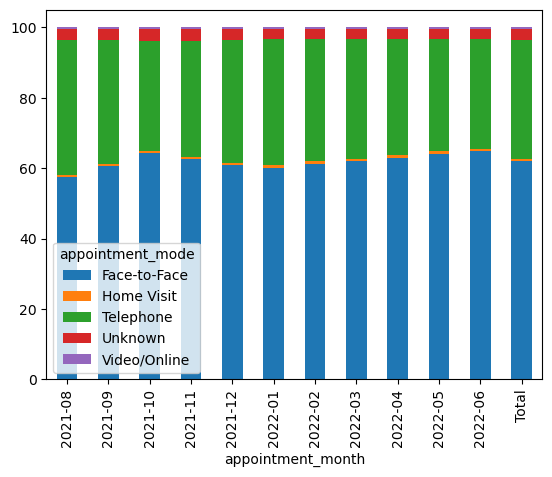

In [143]:
# Create a stacked barchart to visualise the difference in months
apps_x_day_am_pct[['Face-to-Face', 'Home Visit', 'Telephone', 'Unknown', 'Video/Online']].plot(
    kind='bar', stacked=True)

#### 5g) Does appointment waiting time change over time?

##### From the below analysis
- 44% of appointments are seen the same day
- 53% of patients are seen in 1 day or less
- Waiting times are at their highest during October and November

In [146]:
# Group data by date and waiting time
apps_x_day_wt = ar.groupby(['appointment_month', 
                            'time_between_book_and_appointment'])\
                            ['count_of_appointments'].sum().reset_index()

apps_x_day_wt

,appointment_month,time_between_book_and_appointment,count_of_appointments
0,2020-01,1 Day,1945711
1,2020-01,15 to 21 Days,1881819
2,2020-01,2 to 7 Days,5604909
3,2020-01,22 to 28 Days,1313557
4,2020-01,8 to 14 Days,3444637
...,...,...,...
235,2022-06,22 to 28 Days,1217197
236,2022-06,8 to 14 Days,3250347
237,2022-06,More than 28 Days,1067420
238,2022-06,Same Day,11461923


In [147]:
# Filter out covid months (i.e. months before August 2021)
apps_x_day_wt_flt = apps_x_day_wt[apps_x_day_wt['appointment_month'] >= '2021-08']

apps_x_day_wt_flt

,appointment_month,time_between_book_and_appointment,count_of_appointments
152,2021-08,1 Day,2018319
153,2021-08,15 to 21 Days,1453209
154,2021-08,2 to 7 Days,4924960
155,2021-08,22 to 28 Days,828866
156,2021-08,8 to 14 Days,2889150
...,...,...,...
235,2022-06,22 to 28 Days,1217197
236,2022-06,8 to 14 Days,3250347
237,2022-06,More than 28 Days,1067420
238,2022-06,Same Day,11461923


In [148]:
# Convert Period to String
apps_x_day_wt_flt['appointment_month'] = apps_x_day_wt_flt['appointment_month'].astype(str)

apps_x_day_wt_flt.dtypes

appointment_month                    object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

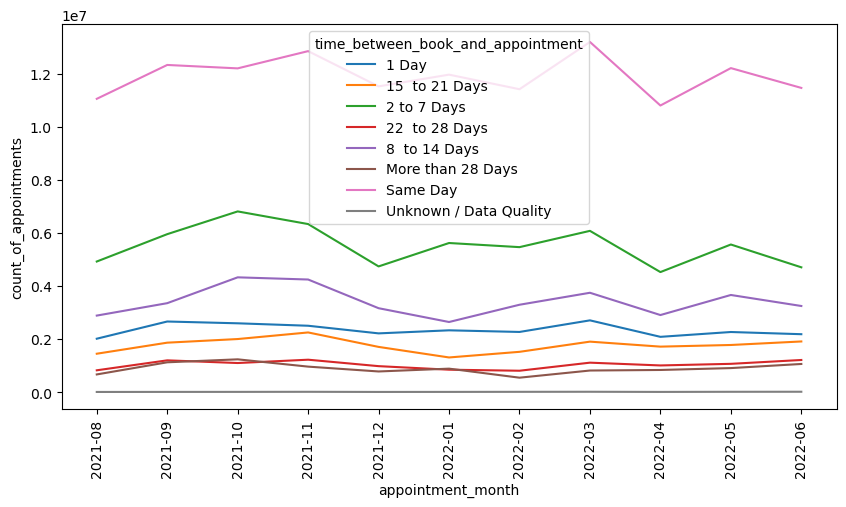

In [149]:
# Create linechart to show change over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', data=apps_x_day_wt_flt)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [150]:
# Pivot the dataframe to allow for percentages by month
apps_x_day_wt_pivot = apps_x_day_wt_flt.pivot_table(\
    index='appointment_month', 
    columns='time_between_book_and_appointment', 
    values='count_of_appointments', 
    aggfunc='sum')

apps_x_day_wt_pivot

time_between_book_and_appointment,1 Day,15 to 21 Days,2 to 7 Days,22 to 28 Days,8 to 14 Days,More than 28 Days,Same Day,Unknown / Data Quality
appointment_month,,,,,,,,
2021-08,2018319,1453209,4924960,828866,2889150,673225,11051004,13438
2021-09,2666072,1869263,5955074,1203657,3356476,1130118,12326333,15508
2021-10,2598516,2005851,6811322,1102915,4329393,1241794,12197576,16467
2021-11,2506532,2254189,6335266,1227907,4247246,967303,12847122,19505
2021-12,2219212,1709999,4740529,985213,3167030,785009,11519536,14248
2022-01,2334274,1312377,5621812,851865,2647216,890975,11961272,15683
2022-02,2272923,1524398,5466290,812489,3297314,550847,11412540,18459
2022-03,2709362,1908058,6079566,1116304,3748272,820399,13192245,20832
2022-04,2088881,1720218,4527185,1011663,2909492,841319,10799188,15114


In [151]:
# Add a totals column
apps_x_day_wt_pivot['Total_apps'] = apps_x_day_wt_pivot.sum(axis=1)

# Add a totals row
apps_x_day_wt_pivot.loc["Total"] = apps_x_day_wt_pivot.sum()

apps_x_day_wt_pivot

time_between_book_and_appointment,1 Day,15 to 21 Days,2 to 7 Days,22 to 28 Days,8 to 14 Days,More than 28 Days,Same Day,Unknown / Data Quality,Total_apps
appointment_month,,,,,,,,,
2021-08,2018319,1453209,4924960,828866,2889150,673225,11051004,13438,23852171
2021-09,2666072,1869263,5955074,1203657,3356476,1130118,12326333,15508,28522501
2021-10,2598516,2005851,6811322,1102915,4329393,1241794,12197576,16467,30303834
2021-11,2506532,2254189,6335266,1227907,4247246,967303,12847122,19505,30405070
2021-12,2219212,1709999,4740529,985213,3167030,785009,11519536,14248,25140776
2022-01,2334274,1312377,5621812,851865,2647216,890975,11961272,15683,25635474
2022-02,2272923,1524398,5466290,812489,3297314,550847,11412540,18459,25355260
2022-03,2709362,1908058,6079566,1116304,3748272,820399,13192245,20832,29595038
2022-04,2088881,1720218,4527185,1011663,2909492,841319,10799188,15114,23913060


In [152]:
# Convert values to percentages
# Create a new dataframe copying original
apps_x_day_wt_pct = apps_x_day_wt_pivot.copy()

# Convert values to percentages
apps_x_day_wt_pct[[
    '1 Day', 
    '15  to 21 Days', 
    '2 to 7 Days', 
    '22  to 28 Days', 
    '8  to 14 Days', 
    'More than 28 Days', 
    'Same Day', 
    'Unknown / Data Quality']] = \
    apps_x_day_wt_pct[[
    '1 Day', 
    '15  to 21 Days', 
    '2 to 7 Days', 
    '22  to 28 Days', 
    '8  to 14 Days', 
    'More than 28 Days', 
    'Same Day', 
    'Unknown / Data Quality']]\
    .div(apps_x_day_wt_pct['Total_apps'], axis=0) * 100

apps_x_day_wt_pct

time_between_book_and_appointment,1 Day,15 to 21 Days,2 to 7 Days,22 to 28 Days,8 to 14 Days,More than 28 Days,Same Day,Unknown / Data Quality,Total_apps
appointment_month,,,,,,,,,
2021-08,8,6,21,3,12,3,46,0,23852171
2021-09,9,7,21,4,12,4,43,0,28522501
2021-10,9,7,22,4,14,4,40,0,30303834
2021-11,8,7,21,4,14,3,42,0,30405070
2021-12,9,7,19,4,13,3,46,0,25140776
2022-01,9,5,22,3,10,3,47,0,25635474
2022-02,9,6,22,3,13,2,45,0,25355260
2022-03,9,6,21,4,13,3,45,0,29595038
2022-04,9,7,19,4,12,4,45,0,23913060


In [153]:
apps_x_day_wt_pct.columns

Index(['1 Day', '15  to 21 Days', '2 to 7 Days', '22  to 28 Days',
       '8  to 14 Days', 'More than 28 Days', 'Same Day',
       'Unknown / Data Quality', 'Total_apps'],
      dtype='object', name='time_between_book_and_appointment')

<Figure size 1500x1000 with 0 Axes>

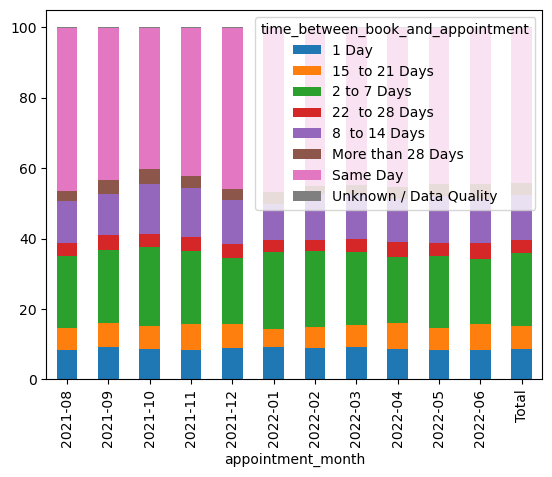

In [154]:
# Create a stacked barchart to visualise the difference in months
plt.figure(figsize=(15, 10))
apps_x_day_wt_pct[['1 Day', 
    '15  to 21 Days', 
    '2 to 7 Days', 
    '22  to 28 Days', 
    '8  to 14 Days', 
    'More than 28 Days', 
    'Same Day', 
    'Unknown / Data Quality']].plot(
    kind='bar', stacked=True)

# Show the plot
plt.show()

In [155]:
apps_x_day_wt_pct.columns

Index(['1 Day', '15  to 21 Days', '2 to 7 Days', '22  to 28 Days',
       '8  to 14 Days', 'More than 28 Days', 'Same Day',
       'Unknown / Data Quality', 'Total_apps'],
      dtype='object', name='time_between_book_and_appointment')

In [156]:
# Group the waiting time so less variables
# Define dictionary
time_groups = {
    'Same Day': '<=1 day',
    '1 Day': '<=1 day',
    '2 to 7 Days': '2-7 days',
    '8  to 14 Days': '8+ days',
    '15  to 21 Days': '8+ days',
    '22  to 28 Days': '8+ days',
    'More than 28 Days': '8+ days'
}

# Apply mapping
apps_x_day_wt_flt['time_group'] = apps_x_day_wt_flt['time_between_book_and_appointment'].replace(time_groups)

# Display results
apps_x_day_wt_flt

,appointment_month,time_between_book_and_appointment,count_of_appointments,time_group
152,2021-08,1 Day,2018319,<=1 day
153,2021-08,15 to 21 Days,1453209,8+ days
154,2021-08,2 to 7 Days,4924960,2-7 days
155,2021-08,22 to 28 Days,828866,8+ days
156,2021-08,8 to 14 Days,2889150,8+ days
...,...,...,...,...
235,2022-06,22 to 28 Days,1217197,8+ days
236,2022-06,8 to 14 Days,3250347,8+ days
237,2022-06,More than 28 Days,1067420,8+ days
238,2022-06,Same Day,11461923,<=1 day


In [157]:
# Create new dataframe grouped by month and new waiting time groups
apps_x_day_tg_flt = apps_x_day_wt_flt.groupby(['appointment_month', 
                            'time_group'])\
                            ['count_of_appointments'].sum().reset_index()

apps_x_day_tg_flt

,appointment_month,time_group,count_of_appointments
0,2021-08,2-7 days,4924960
1,2021-08,8+ days,5844450
2,2021-08,<=1 day,13069323
3,2021-08,Unknown / Data Quality,13438
4,2021-09,2-7 days,5955074
5,2021-09,8+ days,7559514
6,2021-09,<=1 day,14992405
7,2021-09,Unknown / Data Quality,15508
8,2021-10,2-7 days,6811322
9,2021-10,8+ days,8679953


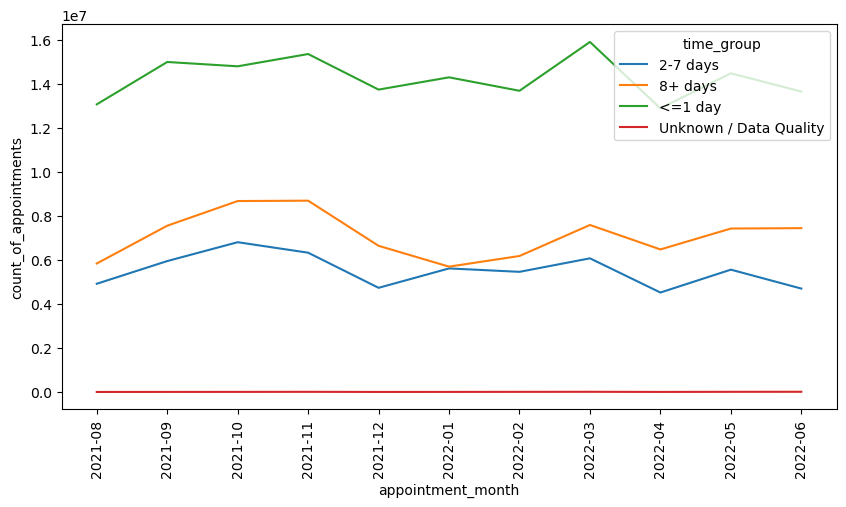

In [158]:
# Create linechart to show change over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_group', data=apps_x_day_tg_flt)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [159]:
# Pivot the dataframe to allow for percentages by month
apps_x_day_tg_flt_pivot = apps_x_day_tg_flt.pivot_table(\
    index='appointment_month', 
    columns='time_group', 
    values='count_of_appointments', 
    aggfunc='sum')

apps_x_day_tg_flt_pivot

time_group,2-7 days,8+ days,<=1 day,Unknown / Data Quality
appointment_month,,,,
2021-08,4924960,5844450,13069323,13438
2021-09,5955074,7559514,14992405,15508
2021-10,6811322,8679953,14796092,16467
2021-11,6335266,8696645,15353654,19505
2021-12,4740529,6647251,13738748,14248
2022-01,5621812,5702433,14295546,15683
2022-02,5466290,6185048,13685463,18459
2022-03,6079566,7593033,15901607,20832
2022-04,4527185,6482692,12888069,15114


In [160]:
# Add a totals column
apps_x_day_tg_flt_pivot['Total_apps'] = apps_x_day_tg_flt_pivot.sum(axis=1)

# Add a totals row
apps_x_day_tg_flt_pivot.loc["Total"] = apps_x_day_tg_flt_pivot.sum()

apps_x_day_tg_flt_pivot

time_group,2-7 days,8+ days,<=1 day,Unknown / Data Quality,Total_apps
appointment_month,,,,,
2021-08,4924960,5844450,13069323,13438,23852171
2021-09,5955074,7559514,14992405,15508,28522501
2021-10,6811322,8679953,14796092,16467,30303834
2021-11,6335266,8696645,15353654,19505,30405070
2021-12,4740529,6647251,13738748,14248,25140776
2022-01,5621812,5702433,14295546,15683,25635474
2022-02,5466290,6185048,13685463,18459,25355260
2022-03,6079566,7593033,15901607,20832,29595038
2022-04,4527185,6482692,12888069,15114,23913060


In [161]:
# Convert values to percentages
# Create a new dataframe copying original
apps_x_day_tg_pct = apps_x_day_tg_flt_pivot.copy()

# Convert values to percentages
apps_x_day_tg_pct[[
    '<=1 day',
    '2-7 days', 
    '8+ days',
    'Unknown / Data Quality']] = \
    apps_x_day_tg_pct[[
    '<=1 day',
    '2-7 days', 
    '8+ days',
    'Unknown / Data Quality']]\
    .div(apps_x_day_tg_pct['Total_apps'], axis=0) * 100

apps_x_day_tg_pct

time_group,2-7 days,8+ days,<=1 day,Unknown / Data Quality,Total_apps
appointment_month,,,,,
2021-08,21,25,55,0,23852171
2021-09,21,27,53,0,28522501
2021-10,22,29,49,0,30303834
2021-11,21,29,50,0,30405070
2021-12,19,26,55,0,25140776
2022-01,22,22,56,0,25635474
2022-02,22,24,54,0,25355260
2022-03,21,26,54,0,29595038
2022-04,19,27,54,0,23913060


<Figure size 1500x1000 with 0 Axes>

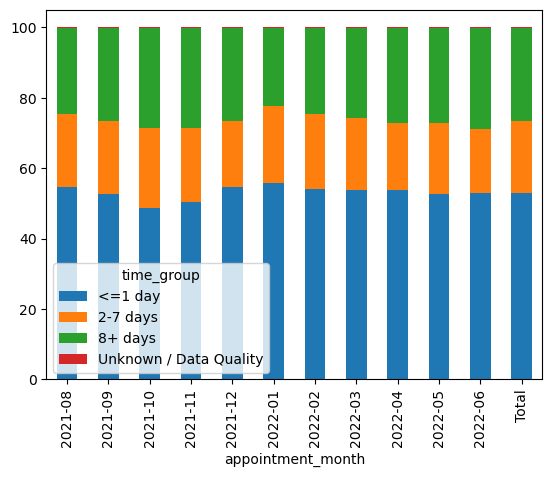

In [162]:
# Create a stacked barchart to visualise the difference in months
plt.figure(figsize=(15, 10))
apps_x_day_tg_pct[[
    '<=1 day',
    '2-7 days', 
    '8+ days',
    'Unknown / Data Quality']].plot(
    kind='bar', stacked=True)

# Show the plot
plt.show()

#### 5h) Which service settings have the most appointments?

##### From the below analysis:
- Over 90% of appointments are seen at a General Practice
- This fluctuates between 90 and 92% through the year with no clear pattern

In [165]:
# Review national categories dataframe

nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [166]:
# Aggregate on monthly level and determine the sum of records per month.
nc_monthly_ss = nc.groupby(['appointment_month','service_setting'])[['count_of_appointments']]\
.sum().sort_values('appointment_month').reset_index()

# View output.
nc_monthly_ss

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


In [167]:
# Convert appointment_month to datetme64 so seaborn can read it
nc_monthly_ss['appointment_month'] = nc_monthly_ss['appointment_month'].dt.to_timestamp()

In [168]:
nc_monthly_ss.dtypes

appointment_month        datetime64[ns]
service_setting                  object
count_of_appointments             int64
dtype: object

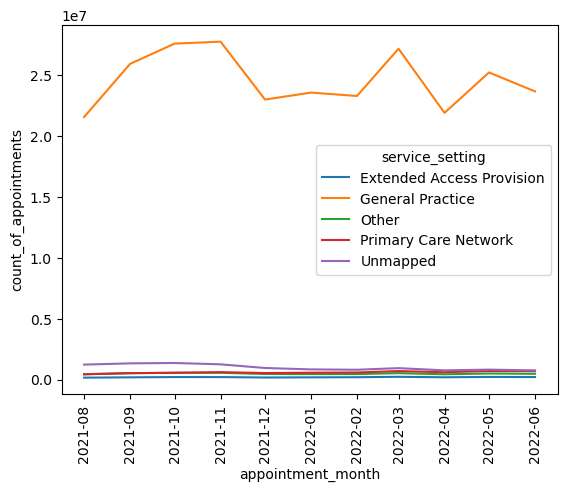

In [169]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    hue='service_setting',
    data=nc_monthly_ss)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [170]:
# Pivot the dataframe to allow for percentages by month
nc_monthly_ss_pivots = nc_monthly_ss.pivot_table(\
    index='appointment_month', 
    columns='service_setting', 
    values='count_of_appointments', 
    aggfunc='sum')

# Convert appointment_month to string to avoid pivot adjusting format
nc_monthly_ss_pivots.index = nc_monthly_ss_pivots.index.astype(str)

nc_monthly_ss_pivots

service_setting,Extended Access Provision,General Practice,Other,Primary Care Network,Unmapped
appointment_month,,,,,
2021-08-01,160927,21575852,449101,432448,1233843
2021-09-01,187906,25940821,527174,530485,1336115
2021-10-01,209539,27606171,556487,564981,1366656
2021-11-01,207577,27767889,558784,614324,1256496
2021-12-01,173504,23008818,464718,539479,954257
2022-01-01,186375,23583053,457440,569044,839562
2022-02-01,196627,23305934,456153,585300,811246
2022-03-01,231905,27187368,530677,702176,942912
2022-04-01,192284,21916791,437402,606270,760313


In [171]:
# Add a totals column
nc_monthly_ss_pivots['Total_apps'] = nc_monthly_ss_pivots.sum(numeric_only=True, axis=1)

# Add a totals row
nc_monthly_ss_pivots.loc["Total"] = nc_monthly_ss_pivots.sum(numeric_only=True)

nc_monthly_ss_pivots

service_setting,Extended Access Provision,General Practice,Other,Primary Care Network,Unmapped,Total_apps
appointment_month,,,,,,
2021-08-01,160927,21575852,449101,432448,1233843,23852171
2021-09-01,187906,25940821,527174,530485,1336115,28522501
2021-10-01,209539,27606171,556487,564981,1366656,30303834
2021-11-01,207577,27767889,558784,614324,1256496,30405070
2021-12-01,173504,23008818,464718,539479,954257,25140776
2022-01-01,186375,23583053,457440,569044,839562,25635474
2022-02-01,196627,23305934,456153,585300,811246,25355260
2022-03-01,231905,27187368,530677,702176,942912,29595038
2022-04-01,192284,21916791,437402,606270,760313,23913060


In [172]:
# See column names to input into new percentage table
nc_monthly_ss_pivots.columns

Index(['Extended Access Provision', 'General Practice', 'Other',
       'Primary Care Network', 'Unmapped', 'Total_apps'],
      dtype='object', name='service_setting')

In [173]:
# Convert values to percentages
# Create a new dataframe copying original
nc_monthly_ss_pct = nc_monthly_ss_pivots.copy()

# Convert values to percentages
nc_monthly_ss_pct[[
    'Extended Access Provision', 
    'General Practice', 'Other',
    'Primary Care Network', 'Unmapped', 
    'Total_apps']] = \
    nc_monthly_ss_pct[[
     'Extended Access Provision', 
    'General Practice', 'Other',
    'Primary Care Network', 'Unmapped', 
    'Total_apps']]\
    .div(nc_monthly_ss_pct['Total_apps'], axis=0) * 100

nc_monthly_ss_pct

service_setting,Extended Access Provision,General Practice,Other,Primary Care Network,Unmapped,Total_apps
appointment_month,,,,,,
2021-08-01,1,90,2,2,5,100
2021-09-01,1,91,2,2,5,100
2021-10-01,1,91,2,2,5,100
2021-11-01,1,91,2,2,4,100
2021-12-01,1,92,2,2,4,100
2022-01-01,1,92,2,2,3,100
2022-02-01,1,92,2,2,3,100
2022-03-01,1,92,2,2,3,100
2022-04-01,1,92,2,3,3,100


<Figure size 1500x1000 with 0 Axes>

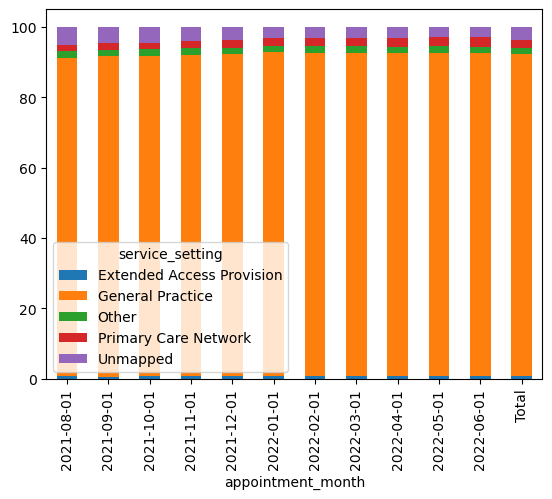

In [174]:
# Create a stacked barchart to visualise the difference in months
plt.figure(figsize=(15, 10))
nc_monthly_ss_pct[[
    'Extended Access Provision', 
    'General Practice', 'Other',
    'Primary Care Network', 'Unmapped']].plot(
    kind='bar', stacked=True)

# Show the plot
plt.show()

#### 5i) How many appointments were non-care related

##### From the below analysis:
- Around 10% of appointments are non-care related

In [177]:
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [178]:
# Aggregate on monthly level and determine the sum of records per month.
nc_monthly_ct = nc.groupby(['appointment_month','context_type'])[['count_of_appointments']]\
.sum().sort_values('appointment_month').reset_index()

# View output.
nc_monthly_ct

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


In [179]:
# Convert appointment_month to datetme64 so seaborn can read it
nc_monthly_ct['appointment_month'] = nc_monthly_ct['appointment_month'].dt.to_timestamp()

In [180]:
nc_monthly_ct.dtypes

appointment_month        datetime64[ns]
context_type                     object
count_of_appointments             int64
dtype: object

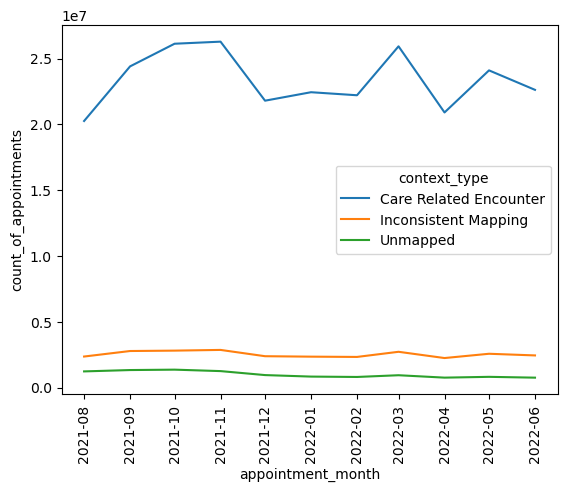

In [181]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    hue='context_type',
    data=nc_monthly_ct)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [182]:
# Pivot the dataframe to allow for percentages by month
nc_monthly_ct_pivot = nc_monthly_ct.pivot_table(\
    index='appointment_month', 
    columns='context_type', 
    values='count_of_appointments', 
    aggfunc='sum')

# Convert appointment_month to string to avoid pivot adjusting format
nc_monthly_ct_pivot.index = nc_monthly_ct_pivot.index.astype(str)

nc_monthly_ct_pivot

context_type,Care Related Encounter,Inconsistent Mapping,Unmapped
appointment_month,,,
2021-08-01,20255235,2363093,1233843
2021-09-01,24404251,2782135,1336115
2021-10-01,26125201,2811977,1366656
2021-11-01,26282778,2865796,1256496
2021-12-01,21798612,2387907,954257
2022-01-01,22441947,2353965,839562
2022-02-01,22211021,2332993,811246
2022-03-01,25928850,2723276,942912
2022-04-01,20904193,2248554,760313


In [183]:
# Add a totals column
nc_monthly_ct_pivot['Total_apps'] = nc_monthly_ct_pivot.sum(numeric_only=True, axis=1)

# Add a totals row
nc_monthly_ct_pivot.loc["Total"] = nc_monthly_ct_pivot.sum(numeric_only=True)

nc_monthly_ct_pivot

context_type,Care Related Encounter,Inconsistent Mapping,Unmapped,Total_apps
appointment_month,,,,
2021-08-01,20255235,2363093,1233843,23852171
2021-09-01,24404251,2782135,1336115,28522501
2021-10-01,26125201,2811977,1366656,30303834
2021-11-01,26282778,2865796,1256496,30405070
2021-12-01,21798612,2387907,954257,25140776
2022-01-01,22441947,2353965,839562,25635474
2022-02-01,22211021,2332993,811246,25355260
2022-03-01,25928850,2723276,942912,29595038
2022-04-01,20904193,2248554,760313,23913060


In [184]:
# See column names to input into new percentage table
nc_monthly_ct_pivot.columns

Index(['Care Related Encounter', 'Inconsistent Mapping', 'Unmapped',
       'Total_apps'],
      dtype='object', name='context_type')

In [185]:
# Convert values to percentages
# Create a new dataframe copying original
nc_monthly_ct_pct = nc_monthly_ct_pivot.copy()

# Convert values to percentages
nc_monthly_ct_pct[[
    'Care Related Encounter', 
    'Inconsistent Mapping', 'Unmapped',
       'Total_apps']] = \
    nc_monthly_ct_pct[[
     'Care Related Encounter', 
    'Inconsistent Mapping', 'Unmapped',
       'Total_apps']]\
    .div(nc_monthly_ct_pct['Total_apps'], axis=0) * 100

nc_monthly_ct_pct

context_type,Care Related Encounter,Inconsistent Mapping,Unmapped,Total_apps
appointment_month,,,,
2021-08-01,85,10,5,100
2021-09-01,86,10,5,100
2021-10-01,86,9,5,100
2021-11-01,86,9,4,100
2021-12-01,87,9,4,100
2022-01-01,88,9,3,100
2022-02-01,88,9,3,100
2022-03-01,88,9,3,100
2022-04-01,87,9,3,100


<Figure size 1500x1000 with 0 Axes>

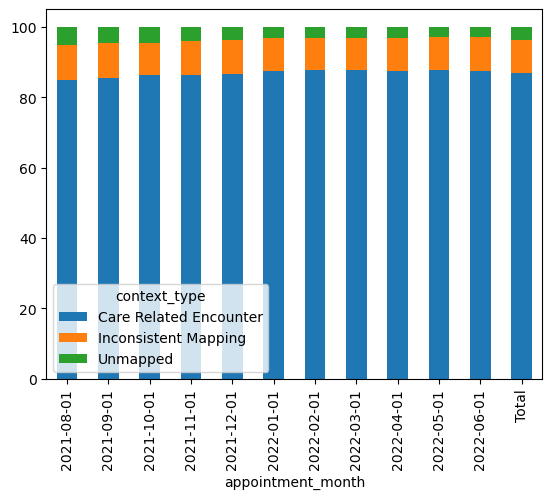

In [186]:
# Create a stacked barchart to visualise the difference in months
plt.figure(figsize=(15, 10))
nc_monthly_ct_pct[[
    'Care Related Encounter', 
    'Inconsistent Mapping', 'Unmapped']].plot(
    kind='bar', stacked=True)

# Show the plot
plt.show()

#### 5j) Which National Categories do most appointments fall into?

##### From the below analysis:
- General Consultation (whether accute or routine) account for 51% of all appointments
- Planned Clincs and Clinical Procedures jumped in Oct and Nov (from 15% in August to 24% in October)
- From desk research this is likely due to autumn vaccination programs
- Based on this year, NHS England starts the flu vaccination campaign for the general population on 3rd Oct (https://www.england.nhs.uk/statistics/statistical-work-areas/flu-vaccinations/)

In [189]:
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [190]:
# Aggregate on monthly level and determine the sum of records per month.
nc_monthly_nc = nc.groupby(['appointment_month', 'national_category'])[['count_of_appointments']]\
.sum().sort_values('appointment_month').reset_index()

# View output.
nc_monthly_nc

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Walk-in,34012
2,2021-08,Unplanned Clinical Activity,241523
3,2021-08,Unmapped,1233843
4,2021-08,Structured Medication Review,138570
...,...,...,...
193,2022-06,Care Home Visit,61546
194,2022-06,Care Home Needs Assessment & Personalised Care...,40222
195,2022-06,Unplanned Clinical Activity,274491
196,2022-06,Inconsistent Mapping,2447611


In [191]:
# Convert appointment_month to datetme64 so seaborn can read it
nc_monthly_nc['appointment_month'] = nc_monthly_nc['appointment_month'].dt.to_timestamp()

In [192]:
# View datatypes to check conversion has worked
nc_monthly_nc.dtypes

appointment_month        datetime64[ns]
national_category                object
count_of_appointments             int64
dtype: object

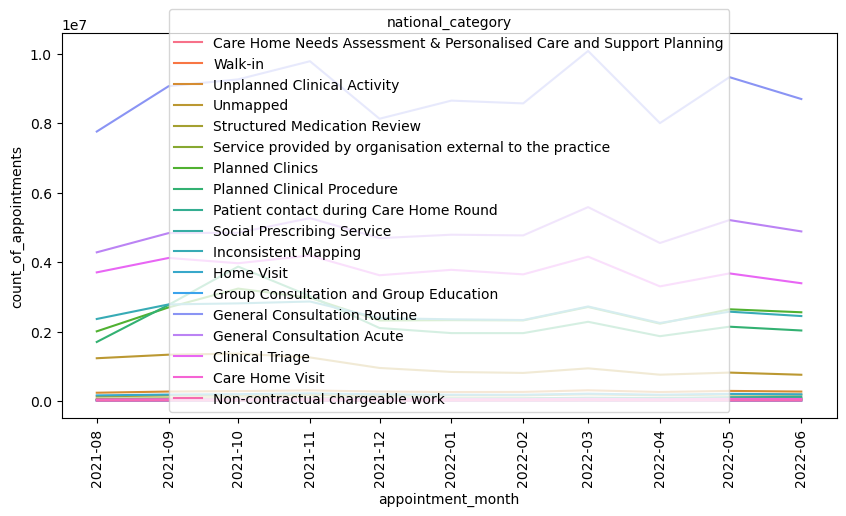

In [193]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
plt.figure(figsize=(10, 5))
sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    hue='national_category',
    data=nc_monthly_nc)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [194]:
# Pivot the dataframe to allow for percentages by month
nc_monthly_nc_pivot = nc_monthly_nc.pivot_table(\
    index='appointment_month', 
    columns='national_category', 
    values='count_of_appointments', 
    aggfunc='sum')

# Convert appointment_month to string to avoid pivot adjusting format
nc_monthly_nc_pivot.index = nc_monthly_nc_pivot.index.astype(str)

nc_monthly_nc_pivot

national_category,Care Home Needs Assessment & Personalised Care and Support Planning,Care Home Visit,Clinical Triage,General Consultation Acute,General Consultation Routine,Group Consultation and Group Education,Home Visit,Inconsistent Mapping,Non-contractual chargeable work,Patient contact during Care Home Round,Planned Clinical Procedure,Planned Clinics,Service provided by organisation external to the practice,Social Prescribing Service,Structured Medication Review,Unmapped,Unplanned Clinical Activity,Walk-in
appointment_month,,,,,,,,,,,,,,,,,,
2021-08-01,29676,47583,3704207,4280920,7756045,5161,165061,2363093,10775,31316,1701814,2007880,69206,31486,138570,1233843,241523,34012
2021-09-01,33503,53519,4118862,4834413,9060243,5892,188756,2782135,13138,34966,2770296,2696591,76461,36077,163167,1336115,275526,42841
2021-10-01,32441,53713,3966561,4843309,9256788,5528,201362,2811977,12965,40064,3870643,3237242,76947,36642,155493,1366656,288158,47345
2021-11-01,38827,61816,4189237,5265514,9778682,5907,223867,2865796,13909,62619,3019944,2972210,81803,42038,174116,1256496,307098,45191
2021-12-01,34653,55230,3621415,4689373,8123938,4790,195510,2387907,10240,70047,2102959,2319263,70993,36120,153503,954257,275381,35197
2022-01-01,37988,55860,3777487,4787643,8645563,5108,184279,2353965,12121,74860,1957081,2329241,73134,42533,165890,839562,261010,32149
2022-02-01,37219,55078,3646672,4767965,8565715,5397,183418,2332993,12650,77638,1956726,2321981,74059,43640,165911,811246,265287,31665
2022-03-01,43189,65413,4155846,5581504,10074249,6114,214743,2723276,14663,98338,2281907,2708552,87542,52186,195229,942912,311305,38070
2022-04-01,35282,53715,3301285,4548963,7998377,4921,183950,2248554,11885,87757,1868140,2228734,74919,45690,166146,760313,262083,32346


In [195]:
# Add a totals column
nc_monthly_nc_pivot['Total_apps'] = nc_monthly_nc_pivot.sum(numeric_only=True, axis=1)

# Add a totals row
nc_monthly_nc_pivot.loc["Total"] = nc_monthly_nc_pivot.sum(numeric_only=True)

nc_monthly_nc_pivot

national_category,Care Home Needs Assessment & Personalised Care and Support Planning,Care Home Visit,Clinical Triage,General Consultation Acute,General Consultation Routine,Group Consultation and Group Education,Home Visit,Inconsistent Mapping,Non-contractual chargeable work,Patient contact during Care Home Round,Planned Clinical Procedure,Planned Clinics,Service provided by organisation external to the practice,Social Prescribing Service,Structured Medication Review,Unmapped,Unplanned Clinical Activity,Walk-in,Total_apps
appointment_month,,,,,,,,,,,,,,,,,,,
2021-08-01,29676,47583,3704207,4280920,7756045,5161,165061,2363093,10775,31316,1701814,2007880,69206,31486,138570,1233843,241523,34012,23852171
2021-09-01,33503,53519,4118862,4834413,9060243,5892,188756,2782135,13138,34966,2770296,2696591,76461,36077,163167,1336115,275526,42841,28522501
2021-10-01,32441,53713,3966561,4843309,9256788,5528,201362,2811977,12965,40064,3870643,3237242,76947,36642,155493,1366656,288158,47345,30303834
2021-11-01,38827,61816,4189237,5265514,9778682,5907,223867,2865796,13909,62619,3019944,2972210,81803,42038,174116,1256496,307098,45191,30405070
2021-12-01,34653,55230,3621415,4689373,8123938,4790,195510,2387907,10240,70047,2102959,2319263,70993,36120,153503,954257,275381,35197,25140776
2022-01-01,37988,55860,3777487,4787643,8645563,5108,184279,2353965,12121,74860,1957081,2329241,73134,42533,165890,839562,261010,32149,25635474
2022-02-01,37219,55078,3646672,4767965,8565715,5397,183418,2332993,12650,77638,1956726,2321981,74059,43640,165911,811246,265287,31665,25355260
2022-03-01,43189,65413,4155846,5581504,10074249,6114,214743,2723276,14663,98338,2281907,2708552,87542,52186,195229,942912,311305,38070,29595038
2022-04-01,35282,53715,3301285,4548963,7998377,4921,183950,2248554,11885,87757,1868140,2228734,74919,45690,166146,760313,262083,32346,23913060


In [196]:
# See column names to input into new percentage table
nc_monthly_nc_pivot.columns

Index(['Care Home Needs Assessment & Personalised Care and Support Planning',
       'Care Home Visit', 'Clinical Triage', 'General Consultation Acute',
       'General Consultation Routine',
       'Group Consultation and Group Education', 'Home Visit',
       'Inconsistent Mapping', 'Non-contractual chargeable work',
       'Patient contact during Care Home Round', 'Planned Clinical Procedure',
       'Planned Clinics',
       'Service provided by organisation external to the practice',
       'Social Prescribing Service', 'Structured Medication Review',
       'Unmapped', 'Unplanned Clinical Activity', 'Walk-in', 'Total_apps'],
      dtype='object', name='national_category')

In [197]:
# Convert values to percentages
# Create a new dataframe copying original
nc_monthly_nc_pct = nc_monthly_nc_pivot.copy()

# Convert values to percentages
nc_monthly_nc_pct[[
    'Care Home Needs Assessment & Personalised Care and Support Planning',
       'Care Home Visit', 'Clinical Triage', 'General Consultation Acute',
       'General Consultation Routine',
       'Group Consultation and Group Education', 'Home Visit',
       'Inconsistent Mapping', 'Non-contractual chargeable work',
       'Patient contact during Care Home Round', 'Planned Clinical Procedure',
       'Planned Clinics',
       'Service provided by organisation external to the practice',
       'Social Prescribing Service', 'Structured Medication Review',
       'Unmapped', 'Unplanned Clinical Activity', 'Walk-in', 'Total_apps']] = \
    nc_monthly_nc_pct[[
     'Care Home Needs Assessment & Personalised Care and Support Planning',
       'Care Home Visit', 'Clinical Triage', 'General Consultation Acute',
       'General Consultation Routine',
       'Group Consultation and Group Education', 'Home Visit',
       'Inconsistent Mapping', 'Non-contractual chargeable work',
       'Patient contact during Care Home Round', 'Planned Clinical Procedure',
       'Planned Clinics',
       'Service provided by organisation external to the practice',
       'Social Prescribing Service', 'Structured Medication Review',
       'Unmapped', 'Unplanned Clinical Activity', 'Walk-in', 'Total_apps']]\
    .div(nc_monthly_nc_pct['Total_apps'], axis=0) * 100

nc_monthly_nc_pct

national_category,Care Home Needs Assessment & Personalised Care and Support Planning,Care Home Visit,Clinical Triage,General Consultation Acute,General Consultation Routine,Group Consultation and Group Education,Home Visit,Inconsistent Mapping,Non-contractual chargeable work,Patient contact during Care Home Round,Planned Clinical Procedure,Planned Clinics,Service provided by organisation external to the practice,Social Prescribing Service,Structured Medication Review,Unmapped,Unplanned Clinical Activity,Walk-in,Total_apps
appointment_month,,,,,,,,,,,,,,,,,,,
2021-08-01,0,0,16,18,33,0,1,10,0,0,7,8,0,0,1,5,1,0,100
2021-09-01,0,0,14,17,32,0,1,10,0,0,10,9,0,0,1,5,1,0,100
2021-10-01,0,0,13,16,31,0,1,9,0,0,13,11,0,0,1,5,1,0,100
2021-11-01,0,0,14,17,32,0,1,9,0,0,10,10,0,0,1,4,1,0,100
2021-12-01,0,0,14,19,32,0,1,9,0,0,8,9,0,0,1,4,1,0,100
2022-01-01,0,0,15,19,34,0,1,9,0,0,8,9,0,0,1,3,1,0,100
2022-02-01,0,0,14,19,34,0,1,9,0,0,8,9,0,0,1,3,1,0,100
2022-03-01,0,0,14,19,34,0,1,9,0,0,8,9,0,0,1,3,1,0,100
2022-04-01,0,0,14,19,33,0,1,9,0,0,8,9,0,0,1,3,1,0,100


In [198]:
# Change date format to YYYY-MM
# Exclude Total row as not a datetime object
nc_monthly_nc_pct = nc_monthly_nc_pct[~nc_monthly_nc_pct.index.str.contains("Total", na=False)]

# Convert appointment month (index) to datetime object
nc_monthly_nc_pct.index = pd.to_datetime(nc_monthly_nc_pct.index)

# Format as YYYY-MM
nc_monthly_nc_pct.index = nc_monthly_nc_pct.index.strftime('%Y-%m')

nc_monthly_nc_pct

national_category,Care Home Needs Assessment & Personalised Care and Support Planning,Care Home Visit,Clinical Triage,General Consultation Acute,General Consultation Routine,Group Consultation and Group Education,Home Visit,Inconsistent Mapping,Non-contractual chargeable work,Patient contact during Care Home Round,Planned Clinical Procedure,Planned Clinics,Service provided by organisation external to the practice,Social Prescribing Service,Structured Medication Review,Unmapped,Unplanned Clinical Activity,Walk-in,Total_apps
appointment_month,,,,,,,,,,,,,,,,,,,
2021-08,0,0,16,18,33,0,1,10,0,0,7,8,0,0,1,5,1,0,100
2021-09,0,0,14,17,32,0,1,10,0,0,10,9,0,0,1,5,1,0,100
2021-10,0,0,13,16,31,0,1,9,0,0,13,11,0,0,1,5,1,0,100
2021-11,0,0,14,17,32,0,1,9,0,0,10,10,0,0,1,4,1,0,100
2021-12,0,0,14,19,32,0,1,9,0,0,8,9,0,0,1,4,1,0,100
2022-01,0,0,15,19,34,0,1,9,0,0,8,9,0,0,1,3,1,0,100
2022-02,0,0,14,19,34,0,1,9,0,0,8,9,0,0,1,3,1,0,100
2022-03,0,0,14,19,34,0,1,9,0,0,8,9,0,0,1,3,1,0,100
2022-04,0,0,14,19,33,0,1,9,0,0,8,9,0,0,1,3,1,0,100


<Figure size 1500x1000 with 0 Axes>

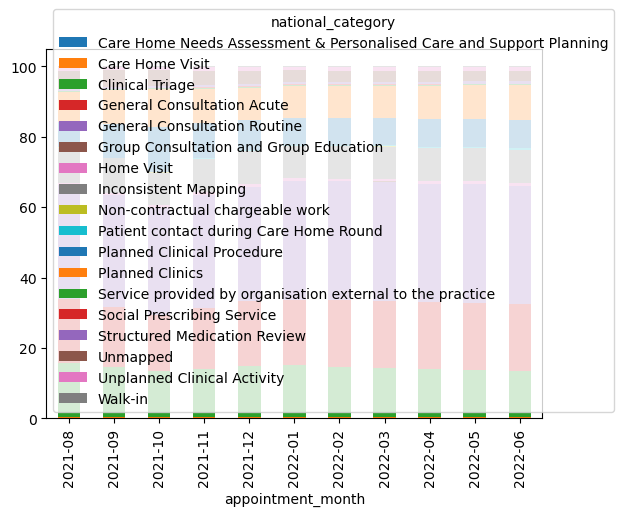

In [199]:
# Create a stacked barchart to visualise the difference in months
plt.figure(figsize=(15, 10))
nc_monthly_nc_pct[[
    'Care Home Needs Assessment & Personalised Care and Support Planning',
       'Care Home Visit', 'Clinical Triage', 'General Consultation Acute',
       'General Consultation Routine',
       'Group Consultation and Group Education', 'Home Visit',
       'Inconsistent Mapping', 'Non-contractual chargeable work',
       'Patient contact during Care Home Round', 'Planned Clinical Procedure',
       'Planned Clinics',
       'Service provided by organisation external to the practice',
       'Social Prescribing Service', 'Structured Medication Review',
       'Unmapped', 'Unplanned Clinical Activity', 'Walk-in']].plot(
    kind='bar', stacked=True)

# Show the plot
plt.show()

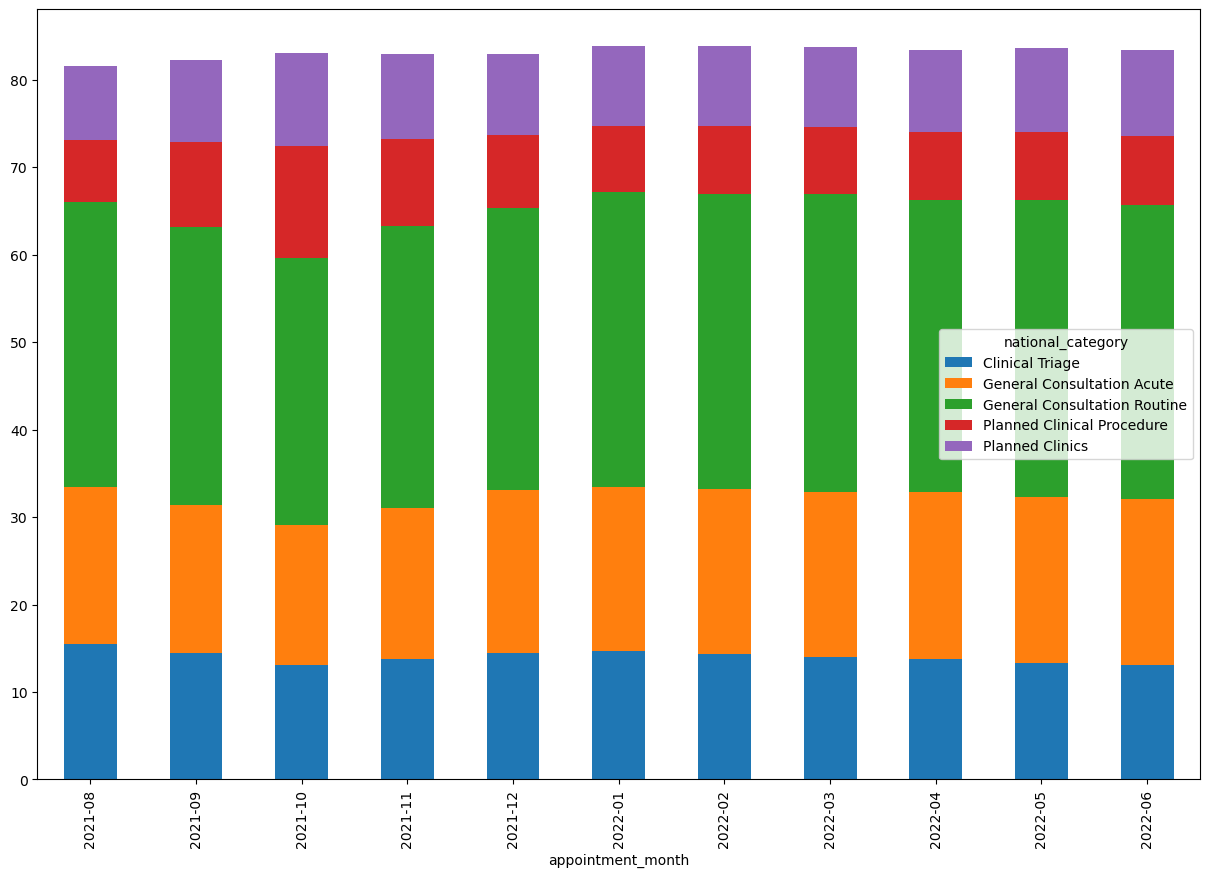

In [200]:
# Create a stacked barchart to visualise the difference in months
nc_monthly_nc_pct[[
       'Clinical Triage', 'General Consultation Acute',
       'General Consultation Routine',
        'Planned Clinical Procedure',
       'Planned Clinics']].plot(
    kind='bar', stacked=True, figsize=(15, 10))

# Show the plot
plt.show()

#### 5k) How do the number of daily appointments change between regions?

##### From the below analysis:
- There are variations in daily appointments between regions, but each follow the same patterns
- Unfortunately, desk research has not revealed capacity or populations of different geographicals areas
- Therefore, focused analysis on system as a whole over regional performance, as this was the question posed by the NHS

In [203]:
# Group by location with count_of_appointments as values
apps_x_reg_tot = ad.groupby('region_ons_code')[['count_of_appointments']]\
                .sum()\
                .reset_index()\
                .sort_values('count_of_appointments', ascending=False)

print(apps_x_reg_tot)

  region_ons_code  count_of_appointments
5       E40000011               32574555
6       E40000012               27425610
1       E40000005               25577953
0       E40000003               24488519
4       E40000010               19880924
3       E40000007               19546694
2       E40000006               18486437


In [204]:
# Add percentage column to look at relative difference
# Sum the total count_of_appointments
total_appointments = apps_x_reg_tot['count_of_appointments'].sum()

# Create a new percentage column
apps_x_reg_tot['percentage'] = (apps_x_reg_tot['count_of_appointments'] / total_appointments) * 100

# Round to 1 decimal places
apps_x_reg_tot['percentage'] = apps_x_reg_tot['percentage'].round(1)

# Print the updated DataFrame
print(apps_x_reg_tot)

  region_ons_code  count_of_appointments  percentage
5       E40000011               32574555          19
6       E40000012               27425610          16
1       E40000005               25577953          15
0       E40000003               24488519          15
4       E40000010               19880924          12
3       E40000007               19546694          12
2       E40000006               18486437          11


In [205]:
# Group by location and date with count_of_appointments as values
apps_x_reg = ad.groupby(['region_ons_code', 'appointment_date'])[['count_of_appointments']]\
                .sum()\
                .reset_index()\
                .sort_values('count_of_appointments', ascending=False)
print(apps_x_reg.head())

     region_ons_code appointment_date  count_of_appointments
1226       E40000011       2022-05-16                 263656
1233       E40000011       2022-05-23                 263221
1219       E40000011       2022-05-09                 259947
1128       E40000011       2022-02-07                 258291
1156       E40000011       2022-03-07                 257939


In [206]:
# Filter out weekends from apps_x_reg
apps_x_reg_wd = apps_x_reg[apps_x_reg['appointment_date'].dt.dayofweek < 5]

print(apps_x_reg_wd.head(10))

     region_ons_code appointment_date  count_of_appointments
1226       E40000011       2022-05-16                 263656
1233       E40000011       2022-05-23                 263221
1219       E40000011       2022-05-09                 259947
1128       E40000011       2022-02-07                 258291
1156       E40000011       2022-03-07                 257939
1149       E40000011       2022-02-28                 257182
1261       E40000011       2022-06-20                 257167
1254       E40000011       2022-06-13                 257097
1121       E40000011       2022-01-31                 256774
1163       E40000011       2022-03-14                 256189


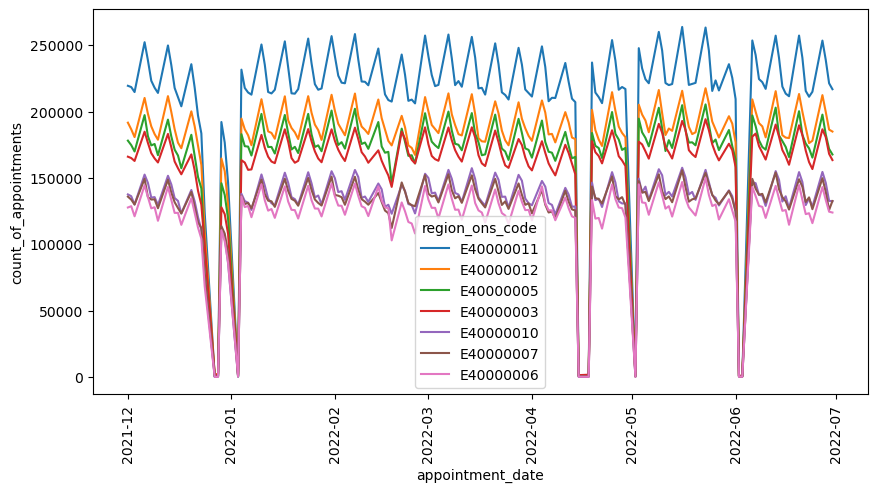

In [207]:
# Create line chart showing appointment count for each region over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='region_ons_code', data=apps_x_reg_wd)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

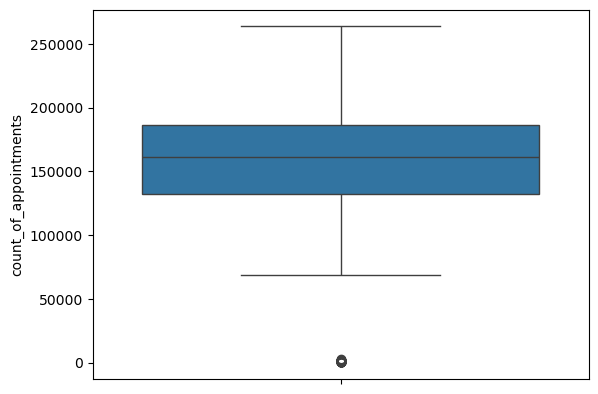

In [208]:
# Idenitfy outliers through boxplot
sns.boxplot(y=apps_x_reg_wd['count_of_appointments'])

# Show the plot
plt.show()

In [209]:
# Run descriptive statistics to identify interquartile range
apps_x_reg_wd.describe()

,appointment_date,count_of_appointments
count,1064,1064
mean,2022-03-16 16:44:12.631578880,156845
min,2021-12-01 00:00:00,149
25%,2022-01-23 06:00:00,132341
50%,2022-03-16 12:00:00,160940
75%,2022-05-09 06:00:00,185980
max,2022-06-30 00:00:00,263656
std,NaN,50508


In [210]:
# Filter out any days below 130,000 appointments (outliers)
apps_x_reg_flt = apps_x_reg_wd[apps_x_reg_wd['count_of_appointments']>130000]

print(apps_x_reg_flt.head())
print(apps_x_reg_flt.tail())

     region_ons_code appointment_date  count_of_appointments
1226       E40000011       2022-05-16                 263656
1233       E40000011       2022-05-23                 263221
1219       E40000011       2022-05-09                 259947
1128       E40000011       2022-02-07                 258291
1156       E40000011       2022-03-07                 257939
    region_ons_code appointment_date  count_of_appointments
932       E40000010       2022-02-23                 130284
906       E40000010       2022-01-28                 130153
813       E40000007       2022-05-27                 130116
850       E40000010       2021-12-03                 130005
600       E40000006       2022-05-26                 130004


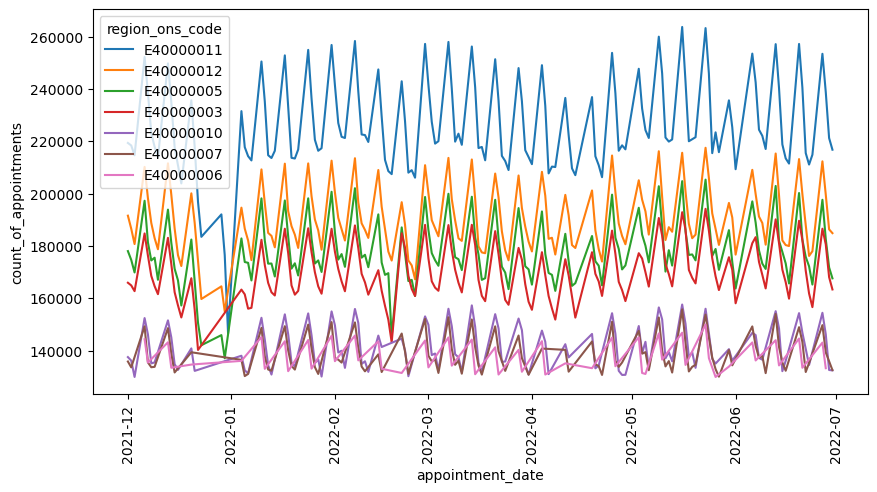

In [211]:
# Create line chart showing appointment count for each region over time
# Set figure size before plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='region_ons_code', data=apps_x_reg_flt)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### 5l) What insights can be gained from the Twitter data?

##### From the below analysis:
- Healthcare is the top performing hashtag by some distance
- There is no date data included in the file, making it different to identify patterns
- The tweets are mostly irrelevant and unrelated to the NHS

In [214]:
# Load the tweets.csv file
tw = pd.read_csv('tweets.csv')

# View dataframe
tw

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Repor...,"{'hashtags': [{'text': 'Innovation', 'indices'...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 're...",1,0,False,False,en
1170,1567582945342267393,Not a cent towards workers who would like to a...,"{'hashtags': [{'text': 'SKPoli', 'indices': [2...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of E...","{'hashtags': [{'text': 'webinar', 'indices': [...","#webinar, #ESG, #healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1172,1567582892892782592,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiothe...,"{'hashtags': [{'text': 'bpt', 'indices': [30, ...","#bpt, #physiotherapy, #HealthyNation, #healthc...","{'iso_language_code': 'en', 'result_type': 're...",0,5,False,False,en


In [215]:
# View descriptive statistics of dataframe
tw.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1174,1174,1174
mean,1567612055941191936,9,0
std,24275534270242,30,2
min,1567574368858914816,0,0
25%,1567589787532554240,0,0
50%,1567611203412713472,1,0
75%,1567633430776754176,3,0
max,1567655472005582848,303,42


In [216]:
# View metadata of dataframe
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


##### There is missing data in the tweet_entities_hashtags column

In [218]:
# Sort tw by number of retweets
tw_top_rtws = tw.sort_values(['tweet_retweet_count'],ascending=False)

tw_top_rtws.head(10)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
263,1567649792897032192,RT @UltimaLionsDen: Temitope is looking to boo...,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",303,0,False,False,en
1139,1567585317498003456,"RT @khaleejtimes: .@BurjeelHoldings, a private...","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",208,0,False,False,en
985,1567594301978288130,"RT @khaleejtimes: .@BurjeelHoldings, a private...","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",208,0,False,False,en
330,1567644141726703617,"RT @khaleejtimes: .@BurjeelHoldings, a private...","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",208,0,False,False,en
595,1567621342987718656,"RT @khaleejtimes: .@BurjeelHoldings, a private...","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",208,0,False,False,en
1160,1567583655689854978,"RT @khaleejtimes: .@BurjeelHoldings, a private...","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",208,0,False,False,en
1168,1567583062354968576,"RT @khaleejtimes: .@BurjeelHoldings, a private...","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",208,0,False,False,en
1132,1567585759036669958,"RT @khaleejtimes: .@BurjeelHoldings, a private...","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",208,0,False,False,en
987,1567594286056603661,"RT @khaleejtimes: .@BurjeelHoldings, a private...","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",208,0,False,False,en
1097,1567587723850166272,"RT @khaleejtimes: .@BurjeelHoldings, a private...","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",208,0,False,False,en


In [219]:
tw_top_rtws_text = tw_top_rtws[['tweet_full_text', 'tweet_retweet_count']]

pd.options.display.max_colwidth=400

tw_top_rtws_text.head(30)

,tweet_full_text,tweet_retweet_count
263,RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…,303
1139,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208
985,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208
330,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208
595,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208
1160,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208
1168,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208
1132,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208
987,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208
1097,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208


In [220]:
# Sort tw by number of favourited tweets
tw_top_ftws = tw.sort_values(['tweet_favorite_count'],ascending=False)

pd.options.display.max_colwidth=400

tw_top_ftws.head(10)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
1156,1567583855422611461,Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: @medics_AbuSaif https://t.co/biwq6A1yVD,"{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [22, 37]}, {'text': 'MedEd', 'indices': [38, 44]}, {'text': 'MedTwitter', 'indices': [45, 56]}, {'text': 'medicine', 'indices': [57, 66]}, {'text': 'medical', 'indices': [67, 75]}, {'text': 'medicare', 'indices': [76, 85]}, {'text': 'health', 'indices': [86, 93]}, {'text': 'healthcare', 'indices': [94, 105]}, {'text': 'FOAMed', 'indices': [10...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid","{'iso_language_code': 'en', 'result_type': 'recent'}",12,42,False,False,en
9,1567582427719282689,You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥,"{'hashtags': [{'text': 'Healthcare', 'indices': [33, 44]}], 'symbols': [{'text': 'JCO', 'indices': [14, 18]}, {'text': 'DAG', 'indices': [76, 80]}], 'user_mentions': [{'screen_name': '_JennyCo', 'name': 'JennyCo', 'id': 1458484454482120704, 'id_str': '1458484454482120704', 'indices': [19, 28]}, {'screen_name': 'Conste11ation', 'name': 'Constellation Network', 'id': 851902232903766016, 'id_str'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",1,28,False,False,en
442,1567634936341069826,How health insurance works 😂 \n\n#comedy #adulting #healthcare https://t.co/ciksdeoAkb,"{'hashtags': [{'text': 'comedy', 'indices': [31, 38]}, {'text': 'adulting', 'indices': [39, 48]}, {'text': 'healthcare', 'indices': [49, 60]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1567634777343406082, 'id_str': '1567634777343406082', 'indices': [61, 84], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1567634777343406082/pu/img/nilI7ouHiL_waPpw.jpg', 'media_u...","#comedy, #adulting, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",5,20,False,False,en
84,1567579049043832832,"Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or seamless\n- does simplicity or complexity well\n- prioritizes saving money or saving lives\n- takes care of it’s workers or takes care of itself\n\n#cdnpoli","{'hashtags': [{'text': 'healthcare', 'indices': [22, 33]}, {'text': 'cdnpoli', 'indices': [270, 278]}], 'symbols': [], 'user_mentions': [], 'urls': []}","#healthcare, #cdnpoli","{'iso_language_code': 'en', 'result_type': 'recent'}",4,18,False,False,en
1122,1567586306607423488,"Heart Failure, Myocardial Infarction &amp; immediate Treatment\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: @medics_AbuSaif https://t.co/mTgXpjY5yo","{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [64, 79]}, {'text': 'MedEd', 'indices': [80, 86]}, {'text': 'MedTwitter', 'indices': [87, 98]}, {'text': 'medicine', 'indices': [99, 108]}, {'text': 'medical', 'indices': [109, 117]}, {'text': 'medicare', 'indices': [118, 127]}, {'text': 'health', 'indices': [128, 135]}, {'text': 'healthcare', 'indices': [136, 147]}, {'text': 'FOAMed', 'indic...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid","{'iso_language_code': 'en', 'result_type': 'recent'}",3,17,False,False,en
119,1567577266162475011,"More data that our 13+ 🇨🇦 #healthcare systems fall short of providing adequate access to care, even for those w/ a family physician.\n\nInstead of siloed solu

In [221]:
# Create new dataframe only showing text columns
tw_text = tw[['tweet_full_text', 'tweet_entities', 'tweet_entities_hashtags', 'tweet_metadata']]

tw_text.head()

,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-being of our community as our next https://t.co/yw0cstfmSI #Healthcare","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url': 'bit.ly/3BiSKbs', 'indices': [229, 252]}]}",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}"
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer', 'id': 447676901, 'id_str': '447676901', 'indices': [3, 17]}], 'urls': []}","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}"
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912', 'indices': [3, 17]}], 'urls': []}",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}"
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices': [3, 17]}], 'urls': []}",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}"
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #digitaltransformation #cybersecurity #accounting #finance #healthcare https://t.co/HC4tTrk8sW","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices': [229, 240]}, {'text': 'finance', 'indices': [241, 249]}, {'text': 'healthcare', 'indices': [250, 261]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/4nnK0FiVVL', 'expanded_url...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}"


In [222]:
# Create variable with empty list attached
tags = []

In [223]:
# Extract the hashtags and convert to lowercase using a for loop
for y in [x.split(' ') for x in tw['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [224]:
# Create new series to count the different hashtags
tags_count = pd.Series(tags).value_counts()
print(tags_count.head(30))

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [225]:
# Convert series to a dataframe
tags_df = pd.DataFrame(tags_count).reset_index()

tags_df.head()

,index,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [226]:
# Rename Columns to 'word' and 'count'
tags_df.columns = ['word', 'count']

tags_df

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [227]:
# Filter dataframe to tags >10
tags_df_flt = tags_df[tags_df['count']>10]

tags_df_flt

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


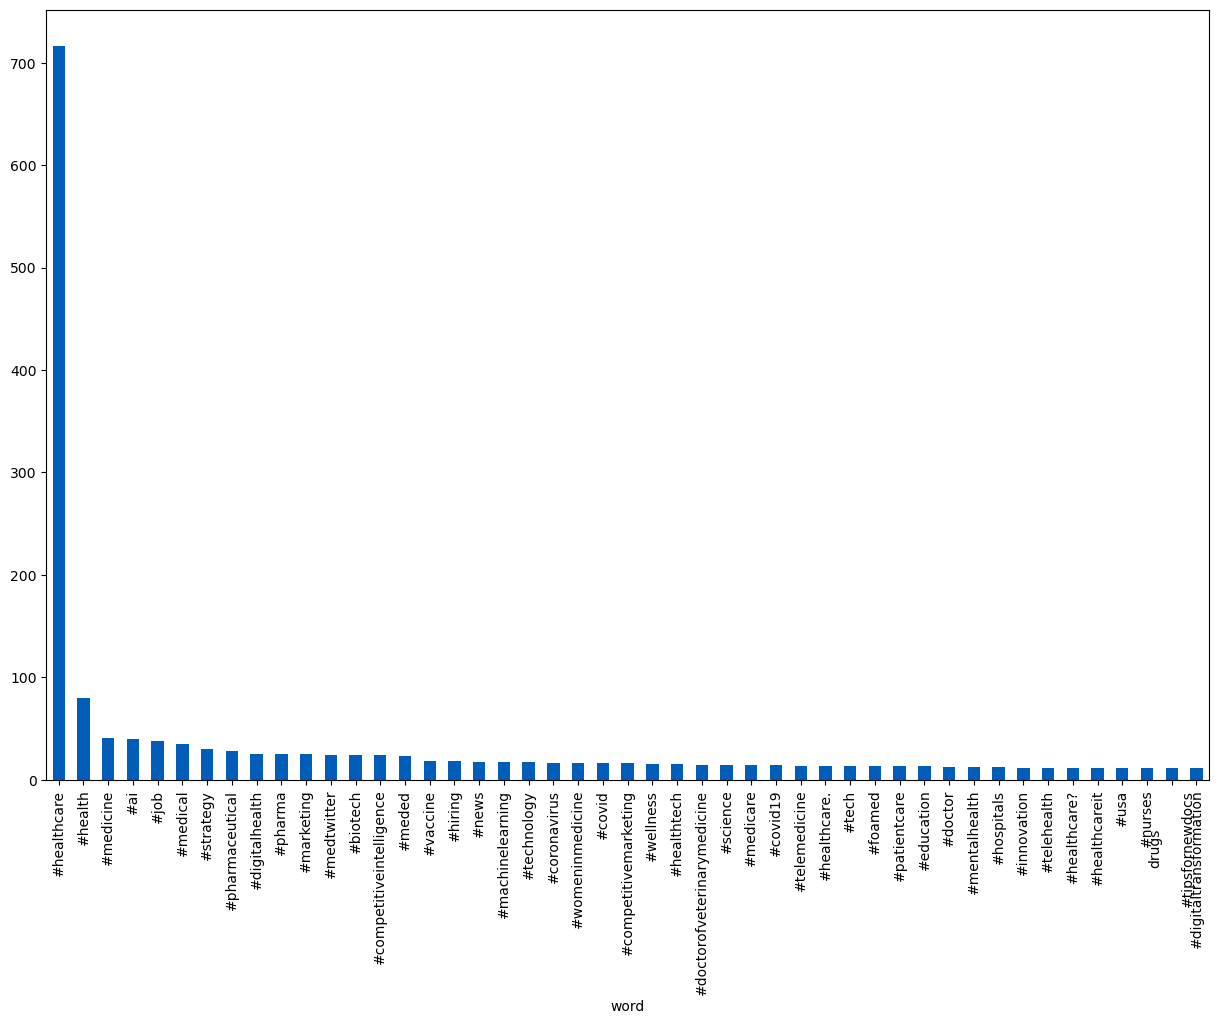

In [228]:
# Create a barchart to visualise the most popular tags
plt.figure(figsize=(15, 10))
tags_df_flt.set_index('word')['count'].plot(
    kind='bar', color='#005EB8') #NHS blue

# Show the plot
plt.show()

In [229]:
# Increase the filter to make barchart readable, removing outliers
tags_df_flt = tags_df[(tags_df['count']>30)]

tags_df_flt


,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35


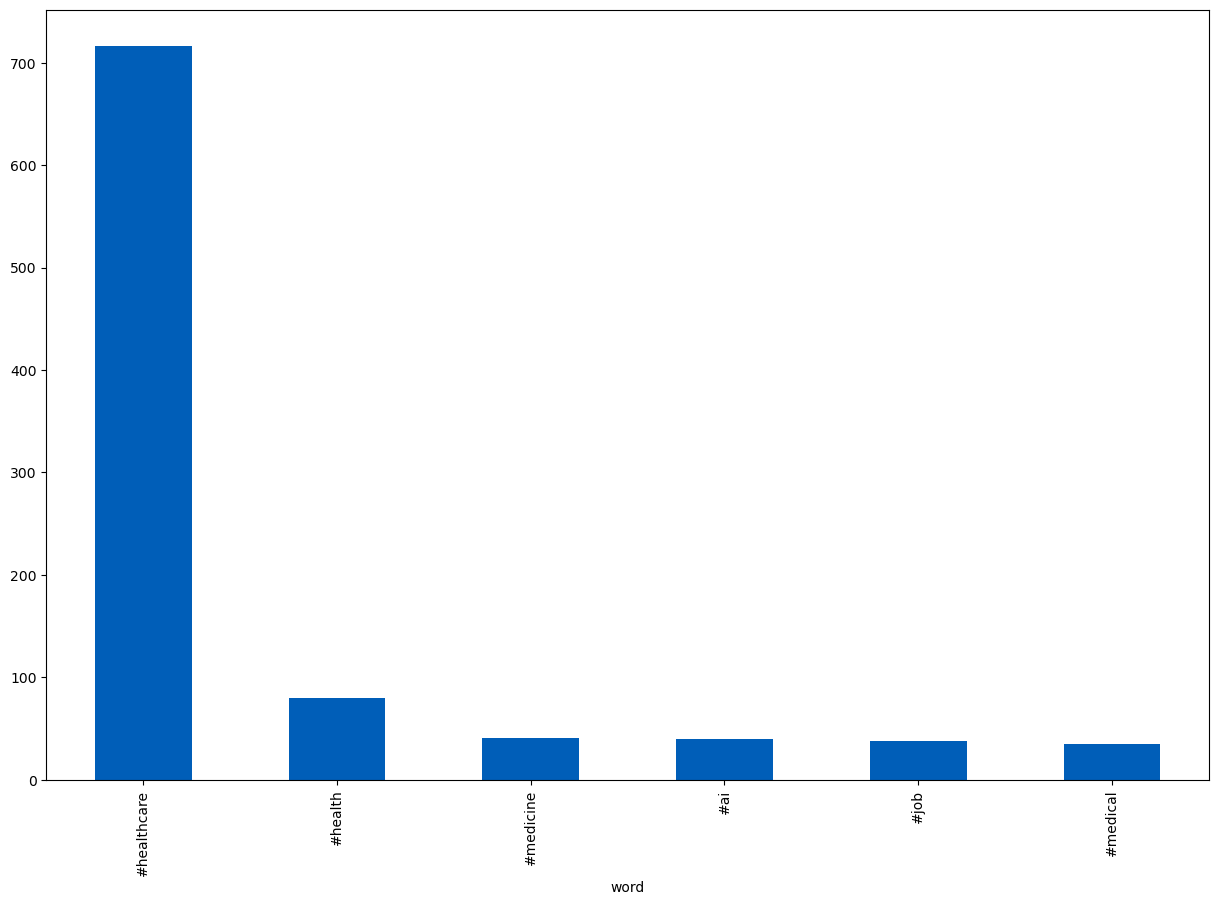

In [230]:
# Create a barchart to visualise the most popular tags
plt.figure(figsize=(15, 10))
tags_df_flt.set_index('word')['count'].plot(
    kind='bar', color='#005EB8') #NHS blue

# Show the plot
plt.show()

In [231]:
# Explore the hashtage #strategy

tw_strat = tw_text[tw_text['tweet_full_text'].str.contains('#strategy', case=False, na=False)]

tw_strat.head()

,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata
43,RT @_timos_: World Duchenne Organization Leadership Award - Duchenne Parent Project https://t.co/fclXISxcit #strategy #competitiveintellige…,"{'hashtags': [{'text': 'strategy', 'indices': [108, 117]}], 'symbols': [], 'user_mentions': [{'screen_name': '_timos_', 'name': 'Dr Timos Papagatsias', 'id': 133504478, 'id_str': '133504478', 'indices': [3, 11]}], 'urls': [{'url': 'https://t.co/fclXISxcit', 'expanded_url': 'http://dlvr.it/SXx6S1', 'display_url': 'dlvr.it/SXx6S1', 'indices': [84, 107]}]}",#strategy,"{'iso_language_code': 'en', 'result_type': 'recent'}"
49,RT @_timos_: Form 483 reveals spore contamination at a South Korean manufacturing site last year https://t.co/bEBShGTjq1 #strategy #competi…,"{'hashtags': [{'text': 'strategy', 'indices': [121, 130]}], 'symbols': [], 'user_mentions': [{'screen_name': '_timos_', 'name': 'Dr Timos Papagatsias', 'id': 133504478, 'id_str': '133504478', 'indices': [3, 11]}], 'urls': [{'url': 'https://t.co/bEBShGTjq1', 'expanded_url': 'http://dlvr.it/SXx6RX', 'display_url': 'dlvr.it/SXx6RX', 'indices': [97, 120]}]}",#strategy,"{'iso_language_code': 'en', 'result_type': 'recent'}"
52,Duchenne Muscular Dystrophy (DMD) Clinical Trial Analysis Featuring 60+ Companies | DelveInsight - GlobeNewswire https://t.co/xSlLTxDPFr #strategy #competitiveintelligence #marketing #healthcare #biotech #pharma #competitivemarketing #pharmaceutical,"{'hashtags': [{'text': 'strategy', 'indices': [137, 146]}, {'text': 'competitiveintelligence', 'indices': [147, 171]}, {'text': 'marketing', 'indices': [172, 182]}, {'text': 'healthcare', 'indices': [183, 194]}, {'text': 'biotech', 'indices': [195, 203]}, {'text': 'pharma', 'indices': [204, 211]}, {'text': 'competitivemarketing', 'indices': [212, 233]}, {'text': 'pharmaceutical', 'indices': [2...","#strategy, #competitiveintelligence, #marketing, #healthcare, #biotech, #pharma, #competitivemarketing, #pharmaceutical","{'iso_language_code': 'en', 'result_type': 'recent'}"
53,Sarepta's Exondys Successor Bounces Back From Clinical Hold But All Eyes On Gene Therapy - Scrip https://t.co/VviVKRPf02 #strategy #competitiveintelligence #marketing #pharmaceutical #competitivemarketing #biotech #healthcare #pharma https://t.co/Y5TPYWUE1Z,"{'hashtags': [{'text': 'strategy', 'indices': [121, 130]}, {'text': 'competitiveintelligence', 'indices': [131, 155]}, {'text': 'marketing', 'indices': [156, 166]}, {'text': 'pharmaceutical', 'indices': [167, 182]}, {'text': 'competitivemarketing', 'indices': [183, 204]}, {'text': 'biotech', 'indices': [205, 213]}, {'text': 'healthcare', 'indices': [214, 225]}, {'text': 'pharma', 'indices': [2...","#strategy, #competitiveintelligence, #marketing, #pharmaceutical, #competitivemarketing, #biotech, #healthcare, #pharma","{'iso_language_code': 'en', 'result_type': 'recent'}"
55,World Duchenne Organization Leadership Award - Duchenne Parent Project https://t.co/fclXISxcit #strategy #competitiveintelligence #marketing #pharmaceutical #biotech #competitivemarketing #pharma #healthcare https://t.co/GoNAgsqJYt,"{'hashtags': [{'text': 'strategy', 'indices': [95, 104]}, {'text': 'competitiveintelligence', 'indices': [105, 129]}, {'text': 'marketing', 'indices': [130, 140]}, {'text': 'pharmaceutical', 'indices': [141, 156]}, {'text': 'biotech', 'indices': [157, 165]}, {'text': 'competitivemarketing', 'indices': [166, 187]}, {'text': 'pharma', 'indices': [188, 195]}, {'text': 'healthcare', 'indices': [19...","#strategy, #competitiveintelligence, #marketing, #pharmaceutical, #biotech, #competitivemarketing, #pharma, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}"


In [232]:
# Explore the hashtage #vaccine
tw_vacc = tw_text[tw_text['tweet_full_text'].str.contains('#vaccine', case=False, na=False)]

tw_vacc.head()

,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata
73,RT @widercircledet1: #vaccine #covid #coronavirus #pandemic #health #corona #vaccines #vaccination #virus #medicine #lockdown #science #qua…,"{'hashtags': [{'text': 'vaccine', 'indices': [21, 29]}, {'text': 'covid', 'indices': [30, 36]}, {'text': 'coronavirus', 'indices': [37, 49]}, {'text': 'pandemic', 'indices': [50, 59]}, {'text': 'health', 'indices': [60, 67]}, {'text': 'corona', 'indices': [68, 75]}, {'text': 'vaccines', 'indices': [76, 85]}, {'text': 'vaccination', 'indices': [86, 98]}, {'text': 'virus', 'indices': [99, 105]},...","#vaccine, #covid, #coronavirus, #pandemic, #health, #corona, #vaccines, #vaccination, #virus, #medicine, #lockdown, #science","{'iso_language_code': 'en', 'result_type': 'recent'}"
74,RT @widercircledet1: #vaccine #covid #coronavirus #pandemic #health #corona #vaccines #vaccination #virus #medicine #lockdown #science #qua…,"{'hashtags': [{'text': 'vaccine', 'indices': [21, 29]}, {'text': 'covid', 'indices': [30, 36]}, {'text': 'coronavirus', 'indices': [37, 49]}, {'text': 'pandemic', 'indices': [50, 59]}, {'text': 'health', 'indices': [60, 67]}, {'text': 'corona', 'indices': [68, 75]}, {'text': 'vaccines', 'indices': [76, 85]}, {'text': 'vaccination', 'indices': [86, 98]}, {'text': 'virus', 'indices': [99, 105]},...","#vaccine, #covid, #coronavirus, #pandemic, #health, #corona, #vaccines, #vaccination, #virus, #medicine, #lockdown, #science","{'iso_language_code': 'en', 'result_type': 'recent'}"
75,RT @widercircledet1: #vaccine #covid #coronavirus #pandemic #health #corona #vaccines #vaccination #virus #medicine #lockdown #science #qua…,"{'hashtags': [{'text': 'vaccine', 'indices': [21, 29]}, {'text': 'covid', 'indices': [30, 36]}, {'text': 'coronavirus', 'indices': [37, 49]}, {'text': 'pandemic', 'indices': [50, 59]}, {'text': 'health', 'indices': [60, 67]}, {'text': 'corona', 'indices': [68, 75]}, {'text': 'vaccines', 'indices': [76, 85]}, {'text': 'vaccination', 'indices': [86, 98]}, {'text': 'virus', 'indices': [99, 105]},...","#vaccine, #covid, #coronavirus, #pandemic, #health, #corona, #vaccines, #vaccination, #virus, #medicine, #lockdown, #science","{'iso_language_code': 'en', 'result_type': 'recent'}"
104,RT @widercircledet1: #vaccine #covid #coronavirus #pandemic #health #corona #vaccines #vaccination #virus #medicine #lockdown #science #qua…,"{'hashtags': [{'text': 'vaccine', 'indices': [21, 29]}, {'text': 'covid', 'indices': [30, 36]}, {'text': 'coronavirus', 'indices': [37, 49]}, {'text': 'pandemic', 'indices': [50, 59]}, {'text': 'health', 'indices': [60, 67]}, {'text': 'corona', 'indices': [68, 75]}, {'text': 'vaccines', 'indices': [76, 85]}, {'text': 'vaccination', 'indices': [86, 98]}, {'text': 'virus', 'indices': [99, 105]},...","#vaccine, #covid, #coronavirus, #pandemic, #health, #corona, #vaccines, #vaccination, #virus, #medicine, #lockdown, #science","{'iso_language_code': 'en', 'result_type': 'recent'}"
105,RT @widercircledet1: #vaccine #covid #coronavirus #pandemic #health #corona #vaccines #vaccination #virus #medicine #lockdown #science #qua…,"{'hashtags': [{'text': 'vaccine', 'indices': [21, 29]}, {'text': 'covid', 'indices': [30, 36]}, {'text': 'coronavirus', 'indices': [37, 49]}, {'text': 'pandemic', 'indices': [50, 59]}, {'text': 'health', 'indices': [60, 67]}, {'text': 'corona', 'indices': [68, 75]}, {'text': 'vaccines', 'indices': [76, 85]}, {'text': 'vaccination', 'indices': [86, 98]}, {'text': 'virus', 'indices': [99, 105]},...","#vaccine, #covid, #coronavirus, #pandemic, #health, #corona, #vaccines, #vaccination, #virus, #medicine, #lockdown, #science","{'iso_language_code': 'en', 'result_type': 'recent'}"


In [233]:
# Explore the hashtage #job
tw_job = tw_text[tw_text['tweet_full_text'].str.contains('#job', case=False, na=False)]

tw_job.head()

,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata
12,Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for Licensed Practical Nurse (LPN). #Healthcare #qualitypatientcare #jobs \nhttps://t.co/0iCMZsLRMA #job,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [75, 89]}, {'text': 'hiring', 'indices': [108, 115]}, {'text': 'Healthcare', 'indices': [152, 163]}, {'text': 'qualitypatientcare', 'indices': [164, 183]}, {'text': 'jobs', 'indices': [184, 189]}, {'text': 'job', 'indices': [215, 219]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0iCMZsLRMA', 'expanded_url': 'http://app...","#PremiseHealth, #hiring, #Healthcare, #qualitypatientcare, #jobs, #job","{'iso_language_code': 'en', 'result_type': 'recent'}"
23,RT @KimcoStaffing: Apply now to work for #MediQuestStaffing as EVS - #Hospital - 1st #shift - Interviewing Now!! (#NewportBeach) #job http…,"{'hashtags': [{'text': 'MediQuestStaffing', 'indices': [41, 59]}, {'text': 'Hospital', 'indices': [69, 78]}, {'text': 'shift', 'indices': [85, 91]}, {'text': 'NewportBeach', 'indices': [115, 128]}, {'text': 'job', 'indices': [130, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'KimcoStaffing', 'name': 'Kimco Staffing', 'id': 62575182, 'id_str': '62575182', 'indices': [3, 17]}], 'urls...","#MediQuestStaffing, #Hospital, #shift, #NewportBeach, #job","{'iso_language_code': 'en', 'result_type': 'recent'}"
24,Apply now to work for #MediQuestStaffing as EVS - #Hospital - 1st #shift - Interviewing Now!! (#NewportBeach) #job https://t.co/KRPpI6K7Qd #jobs #employment #healthcare #job #hiring https://t.co/bFO8SfUdws,"{'hashtags': [{'text': 'MediQuestStaffing', 'indices': [22, 40]}, {'text': 'Hospital', 'indices': [50, 59]}, {'text': 'shift', 'indices': [66, 72]}, {'text': 'NewportBeach', 'indices': [96, 109]}, {'text': 'job', 'indices': [111, 115]}, {'text': 'jobs', 'indices': [140, 145]}, {'text': 'employment', 'indices': [146, 157]}, {'text': 'healthcare', 'indices': [158, 169]}, {'text': 'job', 'indices...","#MediQuestStaffing, #Hospital, #shift, #NewportBeach, #job, #jobs, #employment, #healthcare, #job, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}"
194,Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for Medical Assistant (MA). #Healthcare #qualitypatientcare #jobs \nhttps://t.co/0NFbZslqfm #job,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [75, 89]}, {'text': 'hiring', 'indices': [108, 115]}, {'text': 'Healthcare', 'indices': [144, 155]}, {'text': 'qualitypatientcare', 'indices': [156, 175]}, {'text': 'jobs', 'indices': [176, 181]}, {'text': 'job', 'indices': [207, 211]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0NFbZslqfm', 'expanded_url': 'http://app...","#PremiseHealth, #hiring, #Healthcare, #qualitypatientcare, #jobs, #job","{'iso_language_code': 'en', 'result_type': 'recent'}"
197,Apply now to work for #MediQuestStaffing as #Medical #Assistant! (#SunCity) #job https://t.co/MHUHLzcKsd #jobs #employment #healthcare #job #hiring #mediqueststaffing #jobsearch https://t.co/yZT1GlVgBW,"{'hashtags': [{'text': 'MediQuestStaffing', 'indices': [22, 40]}, {'text': 'Medical', 'indices': [44, 52]}, {'text': 'Assistant', 'indices': [53, 63]}, {'text': 'SunCity', 'indices': [66, 74]}, {'text': 'job', 'indices': [76, 80]}, {'text': 'jobs', 'indices': [105, 110]}, {'text': 'employment', 'indices': [111, 122]}, {'text': 'healthcare', 'indices': [123, 134]}, {'text': 'job', 'indices': [1...","#MediQuestStaffing, #Medical, #Assistant, #SunCity, #job, #jobs, #employment, #healthcare, #job, #hiring, #mediqueststaffing, #jobsearch","{'iso_language_code': 'en', 'result_type': 'recent'}"


In [234]:
# Explore the hashtage #hiring
tw_hiring = tw_text[tw_text['tweet_full_text'].str.contains('#hiring', case=False, na=False)]

tw_hiring

,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer', 'id': 447676901, 'id_str': '447676901', 'indices': [3, 17]}], 'urls': []}","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}"
11,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer', 'id': 447676901, 'id_str': '447676901', 'indices': [3, 17]}], 'urls': []}","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}"
12,Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for Licensed Practical Nurse (LPN). #Healthcare #qualitypatientcare #jobs \nhttps://t.co/0iCMZsLRMA #job,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [75, 89]}, {'text': 'hiring', 'indices': [108, 115]}, {'text': 'Healthcare', 'indices': [152, 163]}, {'text': 'qualitypatientcare', 'indices': [164, 183]}, {'text': 'jobs', 'indices': [184, 189]}, {'text': 'job', 'indices': [215, 219]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0iCMZsLRMA', 'expanded_url': 'http://app...","#PremiseHealth, #hiring, #Healthcare, #qualitypatientcare, #jobs, #job","{'iso_language_code': 'en', 'result_type': 'recent'}"
24,Apply now to work for #MediQuestStaffing as EVS - #Hospital - 1st #shift - Interviewing Now!! (#NewportBeach) #job https://t.co/KRPpI6K7Qd #jobs #employment #healthcare #job #hiring https://t.co/bFO8SfUdws,"{'hashtags': [{'text': 'MediQuestStaffing', 'indices': [22, 40]}, {'text': 'Hospital', 'indices': [50, 59]}, {'text': 'shift', 'indices': [66, 72]}, {'text': 'NewportBeach', 'indices': [96, 109]}, {'text': 'job', 'indices': [111, 115]}, {'text': 'jobs', 'indices': [140, 145]}, {'text': 'employment', 'indices': [146, 157]}, {'text': 'healthcare', 'indices': [158, 169]}, {'text': 'job', 'indices...","#MediQuestStaffing, #Hospital, #shift, #NewportBeach, #job, #jobs, #employment, #healthcare, #job, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}"
194,Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for Medical Assistant (MA). #Healthcare #qualitypatientcare #jobs \nhttps://t.co/0NFbZslqfm #job,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [75, 89]}, {'text': 'hiring', 'indices': [108, 115]}, {'text': 'Healthcare', 'indices': [144, 155]}, {'text': 'qualitypatientcare', 'indices': [156, 175]}, {'text': 'jobs', 'indices': [176, 181]}, {'text': 'job', 'indices': [207, 211]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0NFbZslqfm', 'expanded_url': 'http://app...","#PremiseHealth, #hiring, #Healthcare, #qualitypatientcare, #jobs, #job","{'iso_language_code': 'en', 'result_type': 'recent'}"
197,Apply now to work for #MediQuestStaffing as #Medical #Assistant! (#SunCity) #job https://t.co/MHUHLzcKsd #jobs #employment #healthcare #job #hiring #mediqueststaffing #jobsearch https://t.co/yZT1GlVgBW,"{'hashtags': [{'text': 'MediQuestStaffing', 'indices': [22, 40]}, {'text': 'Medical', 'indices': [44, 52]}, {'text': 'Assistant', 'indices': [53, 63]}, {'text': 'SunCity', 'indices': [66, 74]}, {'text': 'job', 'indices': [76, 80]}, {'text': 'jobs', 'indices': [105, 110]}, {'text': 'employment', 'indices': [111, 122]}, {'text': 'healthcare', 'indices': [123, 134]}, {'text': 'job', 'indices': [1...","#MediQuestStaffing, #Medical, #Assistant, #SunCity,

In [235]:
# Explore the hashtage #healthcare
tw_healthcare = tw_text[tw_text['tweet_full_text'].str.contains('#healthcare', case=False, na=False)]

tw_healthcare.head(20)

,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-being of our community as our next https://t.co/yw0cstfmSI #Healthcare","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url': 'bit.ly/3BiSKbs', 'indices': [229, 252]}]}",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}"
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912', 'indices': [3, 17]}], 'urls': []}",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}"
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #digitaltransformation #cybersecurity #accounting #finance #healthcare https://t.co/HC4tTrk8sW","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices': [229, 240]}, {'text': 'finance', 'indices': [241, 249]}, {'text': 'healthcare', 'indices': [250, 261]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/4nnK0FiVVL', 'expanded_url...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}"
5,"Nursing interventions can be independent, dependent, or collaborative.\n-----\nLearn more: 👉 https://t.co/jrGQeqDme4\n.\n#firstcoastcna #cnaexam #cnaexampreparation #jacksonville #cnatraining #nurse #nursing #nurselife #nursepractitioner #nurseproblems #nursingschool #healthcare https://t.co/hfyvrYuSy7","{'hashtags': [{'text': 'firstcoastcna', 'indices': [117, 131]}, {'text': 'cnaexam', 'indices': [132, 140]}, {'text': 'cnaexampreparation', 'indices': [141, 160]}, {'text': 'jacksonville', 'indices': [161, 174]}, {'text': 'cnatraining', 'indices': [175, 187]}, {'text': 'nurse', 'indices': [188, 194]}, {'text': 'nursing', 'indices': [195, 203]}, {'text': 'nurselife', 'indices': [204, 214]}, {'te...","#firstcoastcna, #cnaexam, #cnaexampreparation, #jacksonville, #cnatraining, #nurse, #nursing, #nurselife, #nursepractitioner, #nurseproblems, #nursingschool, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}"
6,🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data as focus intensifies on addressing #disparities. h/t @JessicaKimCohen &amp; @karahartnett\n#healthcare #alert #insurance #data\nhttps://t.co/h9HLAMR7P9,"{'hashtags': [{'text': 'NEW', 'indices': [1, 5]}, {'text': 'disparities', 'indices': [156, 168]}, {'text': 'healthcare', 'indices': [211, 222]}, {'text': 'alert', 'indices': [223, 229]}, {'text': 'insurance', 'indices': [230, 240]}, {'text': 'data', 'indices': [241, 246]}], 'symbols': [], 'user_mentions': [{'screen_name': 'JessicaKimCohen', 'name': 'Jessica Kim Cohen', 'id': 2584753063, 'id_st...","#NEW, #disparities, #healthcare, #alert, #insurance, #data","{'iso_language_code': 'en', 'result_type': 'recent'}"
7,"Now, more than ever, we need to focus on strengthening our global #Healthcare systems. 2/2","{'hashtags': [{'text': 'Healthcare', 'indices': [66, 77]}], 'symbols': [], 'user_mentions': [], 'urls': []}",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}"
8,"RT @AlikaMD: Our nat’l choices re: #healthcare systems aren’t th

In [236]:
tw_health = tw_text[tw_text['tweet_full_text'].str.contains('#health', case=False, na=False)]

tw_health.head(20)

,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-being of our community as our next https://t.co/yw0cstfmSI #Healthcare","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url': 'bit.ly/3BiSKbs', 'indices': [229, 252]}]}",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}"
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912', 'indices': [3, 17]}], 'urls': []}",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}"
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #digitaltransformation #cybersecurity #accounting #finance #healthcare https://t.co/HC4tTrk8sW","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices': [229, 240]}, {'text': 'finance', 'indices': [241, 249]}, {'text': 'healthcare', 'indices': [250, 261]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/4nnK0FiVVL', 'expanded_url...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}"
5,"Nursing interventions can be independent, dependent, or collaborative.\n-----\nLearn more: 👉 https://t.co/jrGQeqDme4\n.\n#firstcoastcna #cnaexam #cnaexampreparation #jacksonville #cnatraining #nurse #nursing #nurselife #nursepractitioner #nurseproblems #nursingschool #healthcare https://t.co/hfyvrYuSy7","{'hashtags': [{'text': 'firstcoastcna', 'indices': [117, 131]}, {'text': 'cnaexam', 'indices': [132, 140]}, {'text': 'cnaexampreparation', 'indices': [141, 160]}, {'text': 'jacksonville', 'indices': [161, 174]}, {'text': 'cnatraining', 'indices': [175, 187]}, {'text': 'nurse', 'indices': [188, 194]}, {'text': 'nursing', 'indices': [195, 203]}, {'text': 'nurselife', 'indices': [204, 214]}, {'te...","#firstcoastcna, #cnaexam, #cnaexampreparation, #jacksonville, #cnatraining, #nurse, #nursing, #nurselife, #nursepractitioner, #nurseproblems, #nursingschool, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}"
6,🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data as focus intensifies on addressing #disparities. h/t @JessicaKimCohen &amp; @karahartnett\n#healthcare #alert #insurance #data\nhttps://t.co/h9HLAMR7P9,"{'hashtags': [{'text': 'NEW', 'indices': [1, 5]}, {'text': 'disparities', 'indices': [156, 168]}, {'text': 'healthcare', 'indices': [211, 222]}, {'text': 'alert', 'indices': [223, 229]}, {'text': 'insurance', 'indices': [230, 240]}, {'text': 'data', 'indices': [241, 246]}], 'symbols': [], 'user_mentions': [{'screen_name': 'JessicaKimCohen', 'name': 'Jessica Kim Cohen', 'id': 2584753063, 'id_st...","#NEW, #disparities, #healthcare, #alert, #insurance, #data","{'iso_language_code': 'en', 'result_type': 'recent'}"
7,"Now, more than ever, we need to focus on strengthening our global #Healthcare systems. 2/2","{'hashtags': [{'text': 'Healthcare', 'indices': [66, 77]}], 'symbols': [], 'user_mentions': [], 'urls': []}",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}"
8,"RT @AlikaMD: Our nat’l choices re: #healthcare systems aren’t th

## 6)Visualise the data


#### 6a) Covid significantly impacted available data

In [239]:
# Show the ar data set previously grouped by month
apps_x_month.head()

,appointment_month,count_of_appointments
0,2020-01,27199296
1,2020-02,24104621
2,2020-03,24053468
3,2020-04,16007881
4,2020-05,16417212


In [240]:
# Change column names to make them easier to read
apps_x_month.columns = ["month", "# appointments"]

apps_x_month.head()

,month,# appointments
0,2020-01,27199296
1,2020-02,24104621
2,2020-03,24053468
3,2020-04,16007881
4,2020-05,16417212


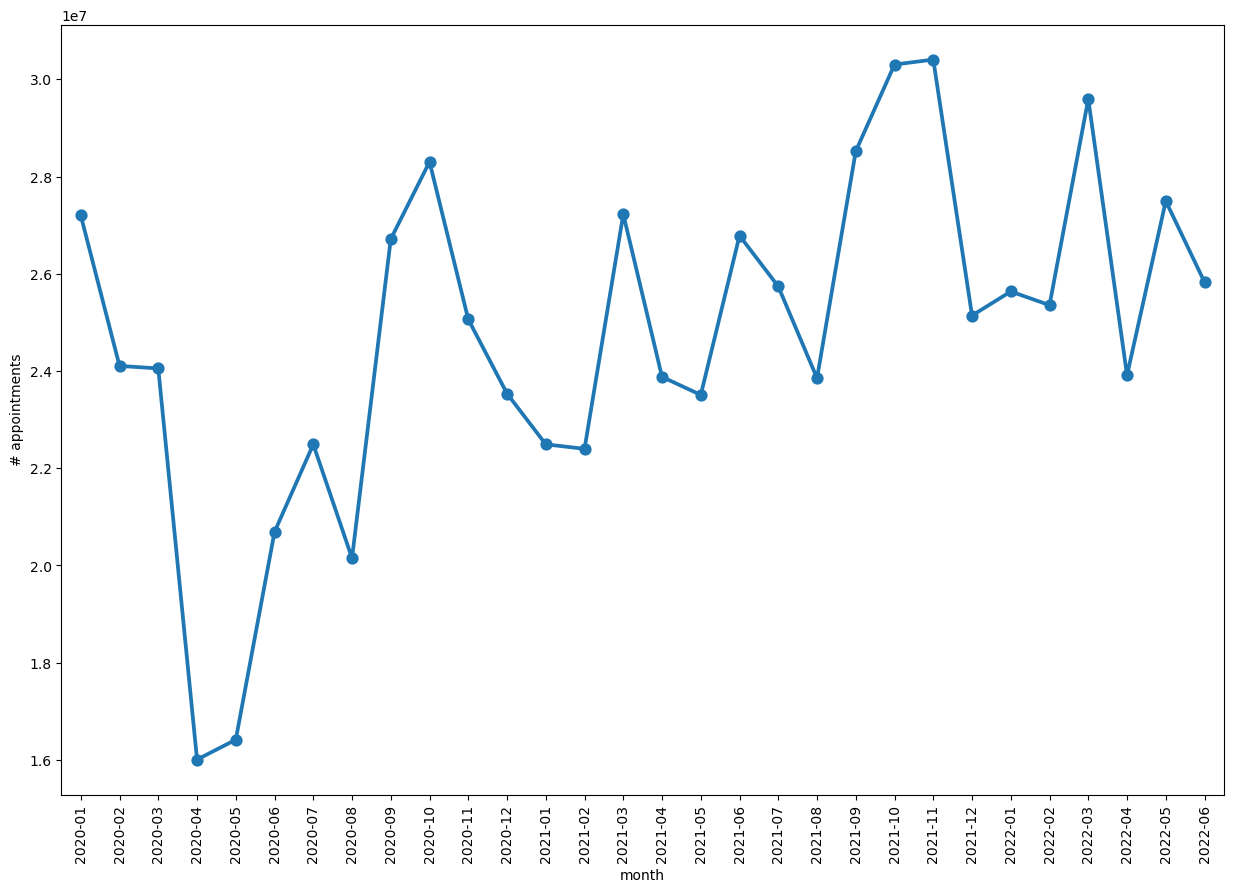

In [241]:
# Create a pointplot
plt.figure(figsize=(15, 10))
sns.pointplot(x='month', y='# appointments', data=apps_x_month)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

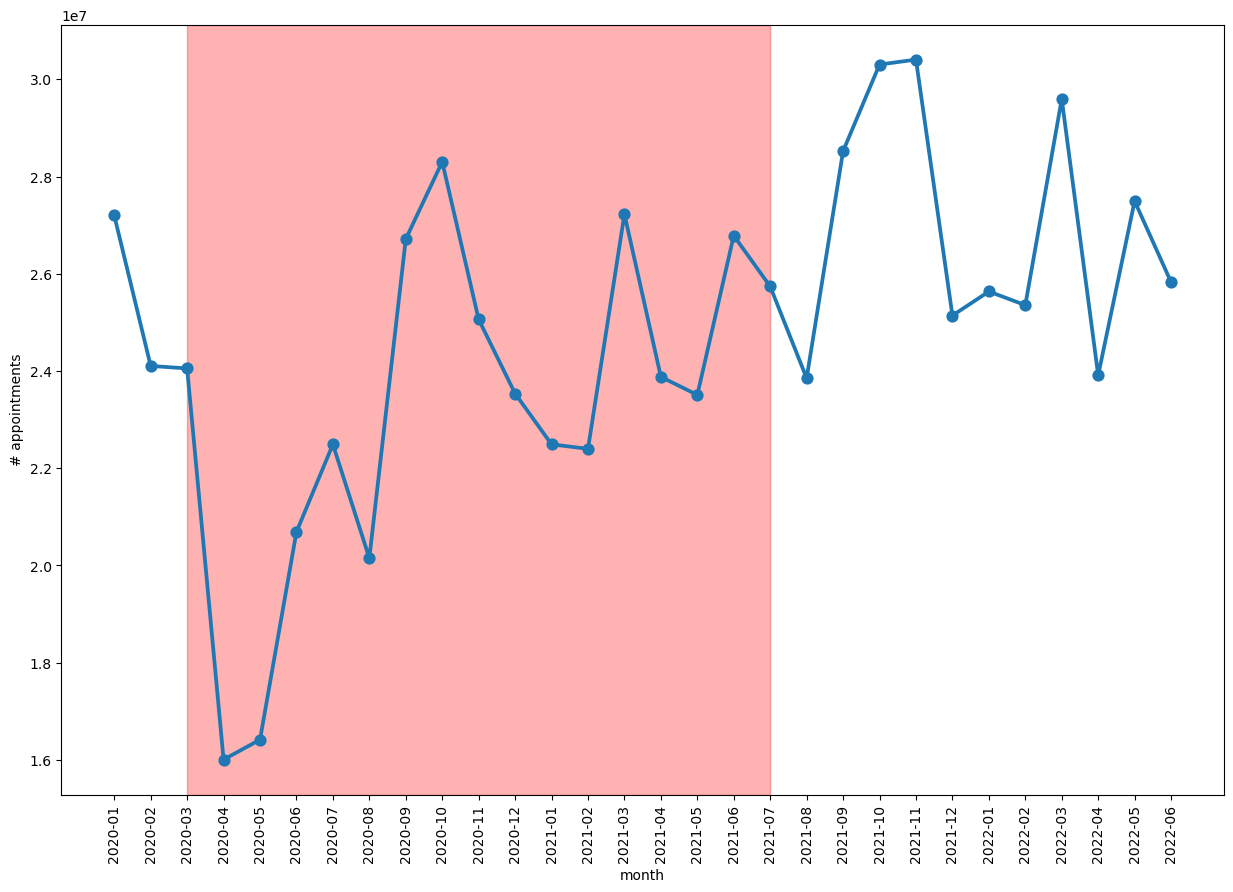

In [242]:
# Add highlighted section showing covid months
# Create a pointplot
plt.figure(figsize=(15, 10))
sns.pointplot(x='month', y='# appointments', data=apps_x_month)

# Add highlighted section for COVID months (March 2020 - July 2021)
plt.axvspan('2020-03', '2021-07', color='red', alpha=0.3)

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

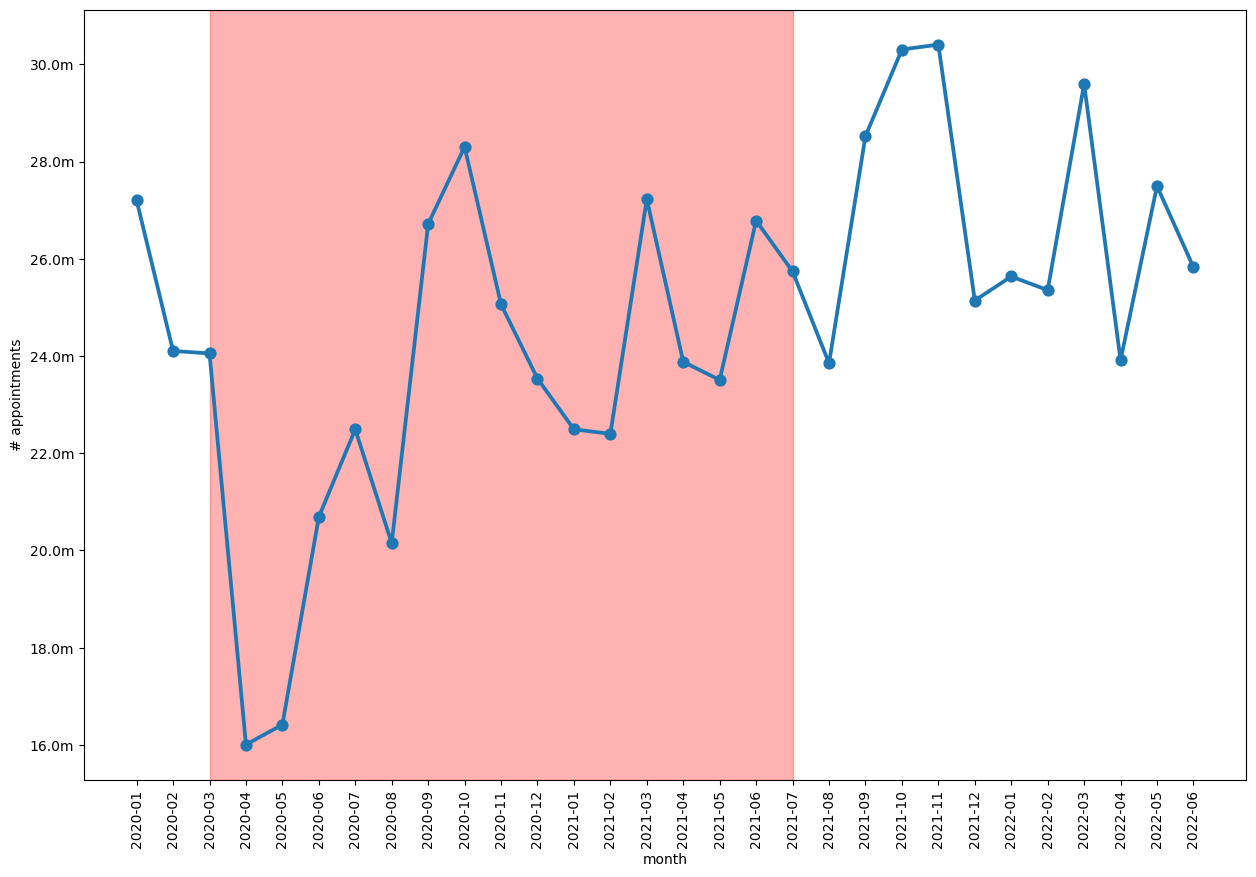

In [243]:
# Tidy up the y axis scale to avoid scientific notations
# Import matplotlib ticker to customise axis
import matplotlib.ticker as ticker


# Create the pointplot
plt.figure(figsize=(15, 10))
sns.pointplot(x='month', y='# appointments', data=apps_x_month)

# Add highlighted section for COVID months (March 2020 - July 2021)
plt.axvspan('2020-03', '2021-07', color='red', alpha=0.3)

# Create function to format the y-axis to show numbers in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}m' 

# Apply above function to y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Save the as image (PNG)
plt.savefig("plot.png", dpi=300, bbox_inches="tight") 

# Show the plot
plt.show()


#### 6b) Overall, average daily usage is under the 1,200,000 capacity for period 08-2021 to 06-2022

In [245]:
# Group data into seasons to improve visualisation
# Convert appointment month into string format
apps_x_non_covid_months['appointment_month'] = apps_x_non_covid_months['appointment_month'].astype(str)

# Create dictionary 
seasons_dict = {
    '2021-12': 'Winter', '2022-01': 'Winter', '2022-02': 'Winter',
    '2022-03': 'Spring', '2022-04': 'Spring', '2022-05': 'Spring',
    '2022-06': 'Summer', '2021-08': 'Summer',
   '2021-09': 'Autumn', '2021-10': 'Autumn', '2021-11': 'Autumn'
}

# Map months to seasons
apps_x_non_covid_months['season'] = apps_x_non_covid_months['appointment_month'].map(seasons_dict)

print(apps_x_non_covid_months)

   appointment_month  count_of_appointments  season
22           2021-11               30405070  Autumn
21           2021-10               30303834  Autumn
26           2022-03               29595038  Spring
20           2021-09               28522501  Autumn
28           2022-05               27495508  Spring
29           2022-06               25828078  Summer
24           2022-01               25635474  Winter
25           2022-02               25355260  Winter
23           2021-12               25140776  Winter
27           2022-04               23913060  Spring
19           2021-08               23852171  Summer


In [246]:
# Calculate average daily usage per month
# Show the non-covid monthly data from ar
apps_x_non_covid_months.head()

,appointment_month,count_of_appointments,season
22,2021-11,30405070,Autumn
21,2021-10,30303834,Autumn
26,2022-03,29595038,Spring
20,2021-09,28522501,Autumn
28,2022-05,27495508,Spring


In [247]:
# Add average daily appointments by month
# Import relavent library
import calendar

# Create function to pull number of days per month
def get_days_in_month(date_str):
    year, month = map(int, date_str.split("-"))
    return calendar.monthrange(year, month)[1]

# Apply the function to dataframe previously created containing appointments by month (non-Covid)
apps_x_non_covid_months["days_per_month"] = apps_x_non_covid_months["appointment_month"].apply(get_days_in_month)

apps_x_non_covid_months.head()

,appointment_month,count_of_appointments,season,days_per_month
22,2021-11,30405070,Autumn,30
21,2021-10,30303834,Autumn,31
26,2022-03,29595038,Spring,31
20,2021-09,28522501,Autumn,30
28,2022-05,27495508,Spring,31


In [248]:
# Divide the number of appointments in month with number of days to get average
apps_x_non_covid_months['avg. apps per day'] = apps_x_non_covid_months['count_of_appointments']/apps_x_non_covid_months['days_per_month']

apps_x_non_covid_months

,appointment_month,count_of_appointments,season,days_per_month,avg. apps per day
22,2021-11,30405070,Autumn,30,1013502
21,2021-10,30303834,Autumn,31,977543
26,2022-03,29595038,Spring,31,954679
20,2021-09,28522501,Autumn,30,950750
28,2022-05,27495508,Spring,31,886952
29,2022-06,25828078,Summer,30,860936
24,2022-01,25635474,Winter,31,826951
25,2022-02,25355260,Winter,28,905545
23,2021-12,25140776,Winter,31,810993
27,2022-04,23913060,Spring,30,797102


In [249]:
# Add column showing daily capacity
apps_x_non_covid_months['avg. capacity per day'] = 1200000

apps_x_non_covid_months

,appointment_month,count_of_appointments,season,days_per_month,avg. apps per day,avg. capacity per day
22,2021-11,30405070,Autumn,30,1013502,1200000
21,2021-10,30303834,Autumn,31,977543,1200000
26,2022-03,29595038,Spring,31,954679,1200000
20,2021-09,28522501,Autumn,30,950750,1200000
28,2022-05,27495508,Spring,31,886952,1200000
29,2022-06,25828078,Summer,30,860936,1200000
24,2022-01,25635474,Winter,31,826951,1200000
25,2022-02,25355260,Winter,28,905545,1200000
23,2021-12,25140776,Winter,31,810993,1200000
27,2022-04,23913060,Spring,30,797102,1200000


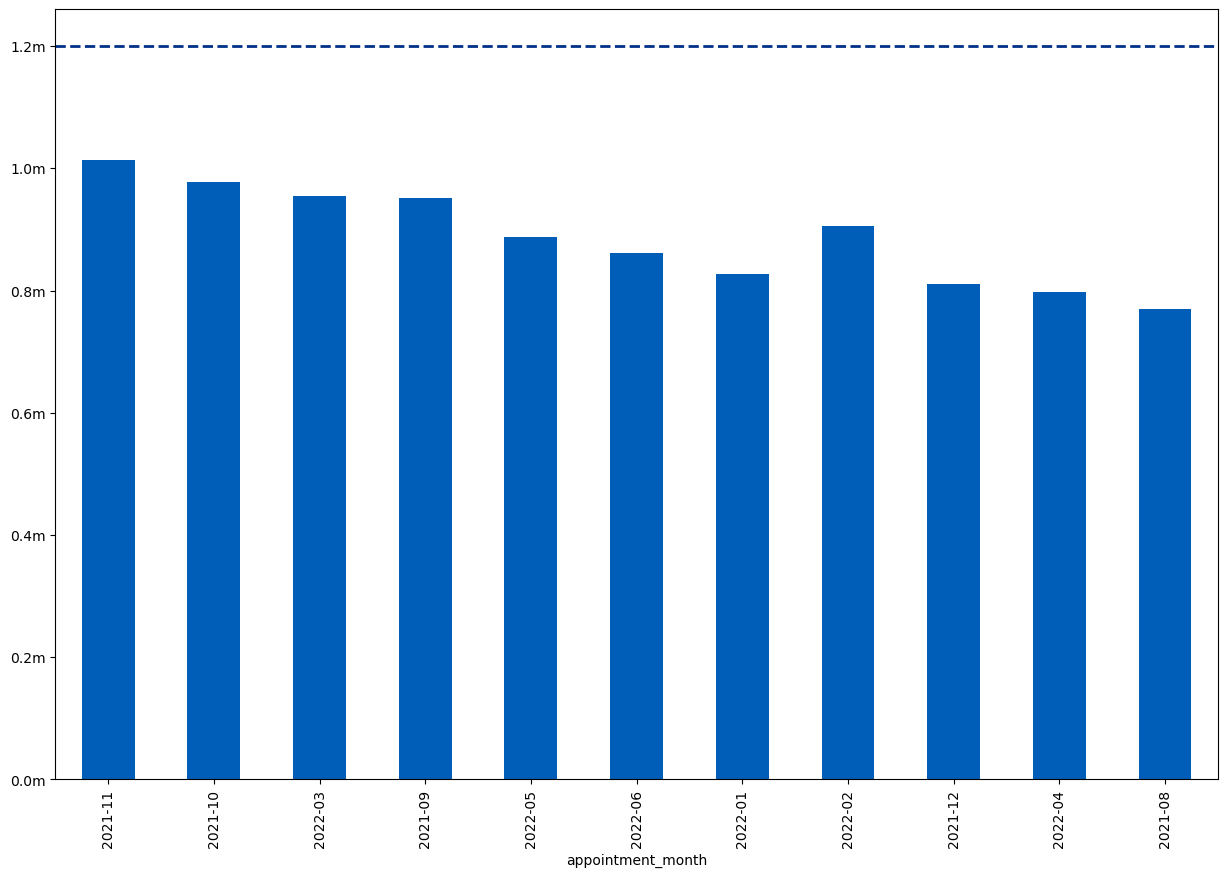

In [250]:
# Create a barchart showing daily appointments by daily capacity by month
plt.figure(figsize=(15, 10))
daily_avg = apps_x_non_covid_months.set_index('appointment_month')['avg. apps per day'].plot(
    kind='bar', color='#005EB8') # used NHS Blue #005EB8 - as per https://www.england.nhs.uk/nhsidentity/identity-guidelines/colours/

# Add a line to show capacity
plt.axhline(y=1200000, color='#003087', linestyle='--', linewidth=2, label='capacity') # used NHS Dark Blue ##003087

# Apply previously created function to convert y-axis numbers to millions (i.e. x.xm)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Save the as image (PNG)
plt.savefig("plot2.png", dpi=300, bbox_inches="tight") 

# Show the plot
plt.show()

#### 6c) However there are large variances on different days of week, with all weekdays apart from Friday being over capacity

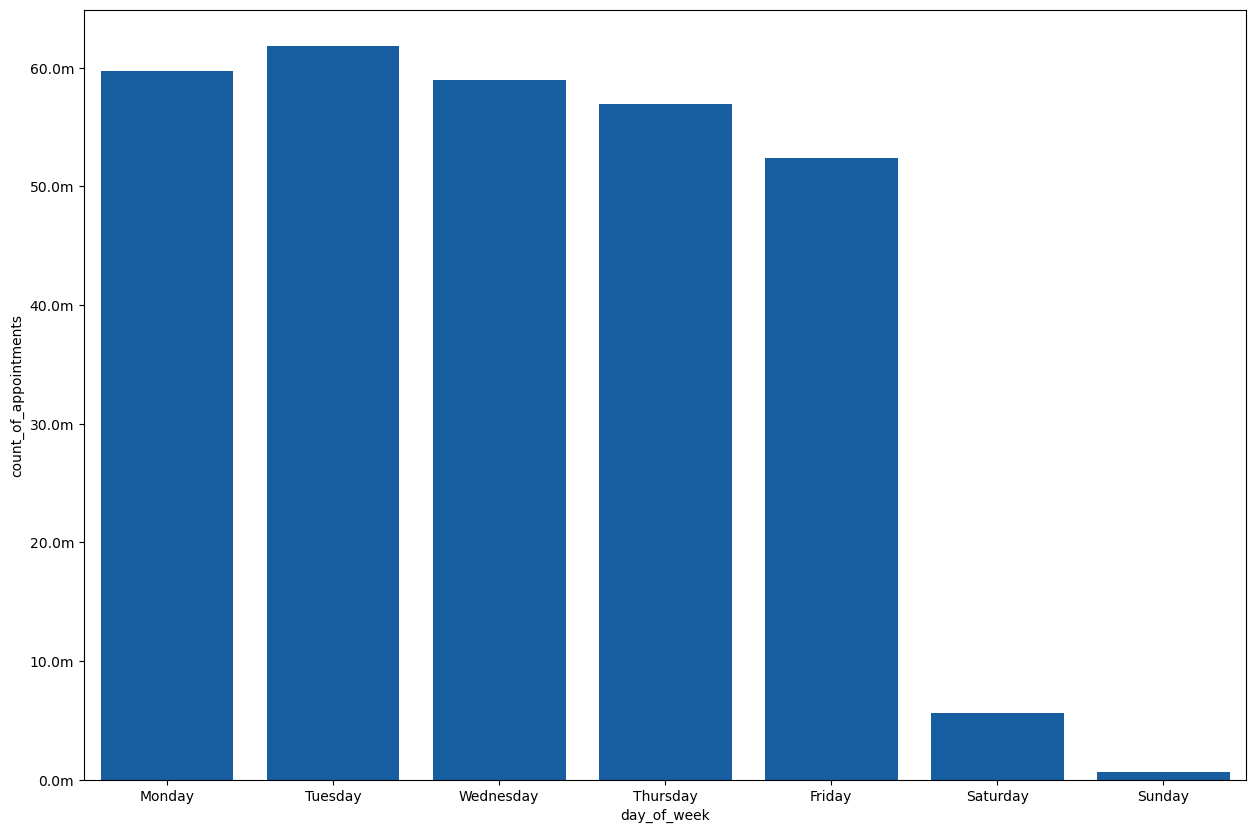

In [252]:
# Demonstrate significant impact of days of week
# Create a barplot of days of week
plt.figure(figsize=(15, 10))
sns.barplot(x='day_of_week', y='count_of_appointments', data=apps_x_dow, color='#005EB8')

# Apply previously created function to convert y-axis numbers to millions (i.e. x.xm)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Save the as image (PNG)
plt.savefig("plot3.png", dpi=300, bbox_inches="tight") 

# Show the plot
plt.show()

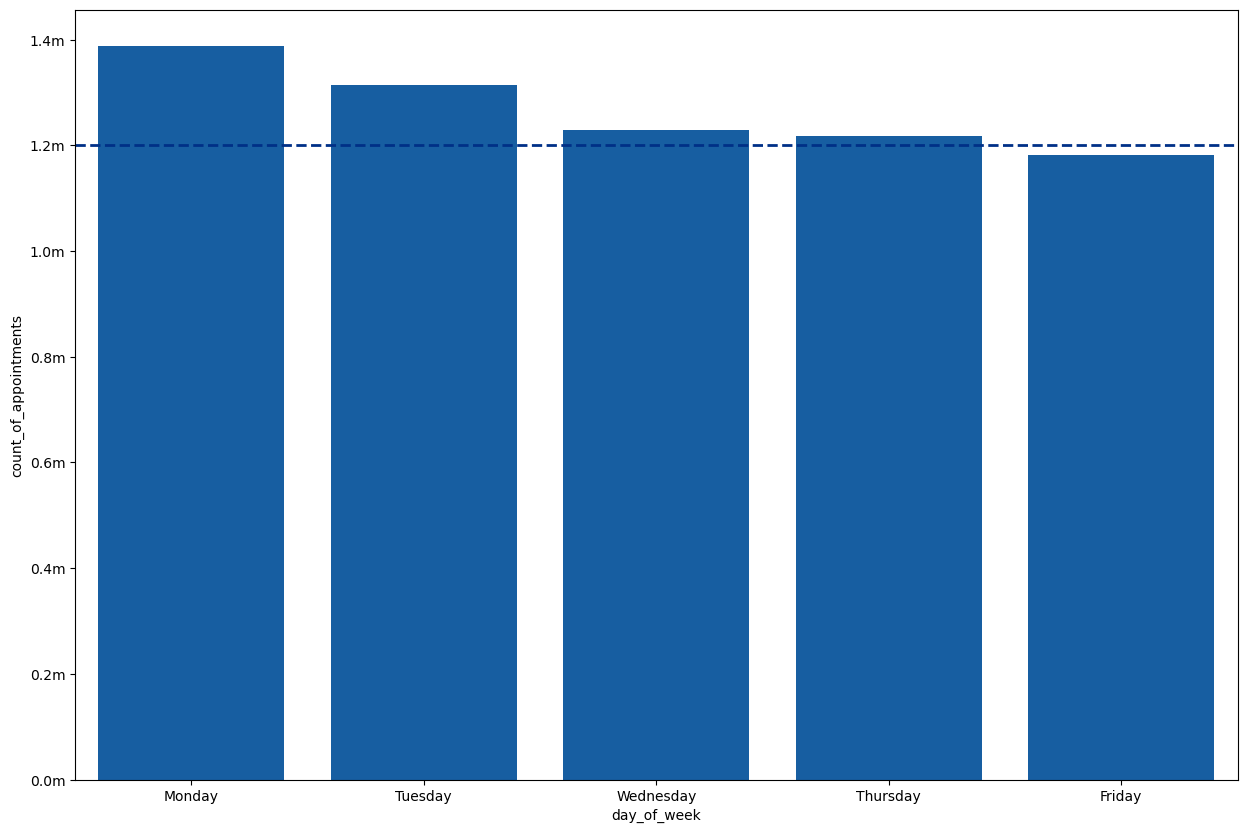

In [253]:
# Create a barplot of weekdays
plt.figure(figsize=(15, 10))
sns.barplot(x='day_of_week', y='count_of_appointments', data=avg_app_dow, color='#005EB8')

# Add a line to show capacity
plt.axhline(y=1200000, color='#003087', linestyle='--', linewidth=2, label='capacity') # used NHS Dark Blue ##003087

# Apply previously created function to convert y-axis numbers to millions (i.e. x.xm)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Save the as image (PNG)
plt.savefig("plot4.png", dpi=300, bbox_inches="tight") 

# Show the plot
plt.show()


In [254]:
# Change y-axis and x-axis labels to make them more readable
# Show relevant dataframe (avg_app_dow)
avg_app_dow.head()

,day_of_week,count_of_appointments
1,Monday,1387447
3,Tuesday,1314824
4,Wednesday,1228839
2,Thursday,1216870
0,Friday,1182204


In [255]:
# Change column names
avg_app_dow.columns = ["day", "average # appointments"]

avg_app_dow

,day,average # appointments
1,Monday,1387447
3,Tuesday,1314824
4,Wednesday,1228839
2,Thursday,1216870
0,Friday,1182204


In [256]:
# Run same chart for just November
# Show relevant dataframe (avg_app_dow)
avg_app_dow_nov.head()

,day_of_week,count_of_appointments
1,Monday,1456483
3,Tuesday,1389855
4,Wednesday,1306138
2,Thursday,1288840
0,Friday,1247452


In [257]:
# Change column names
avg_app_dow_nov.columns = ["day", "average # appointments"]

avg_app_dow_nov

,day,average # appointments
1,Monday,1456483
3,Tuesday,1389855
4,Wednesday,1306138
2,Thursday,1288840
0,Friday,1247452


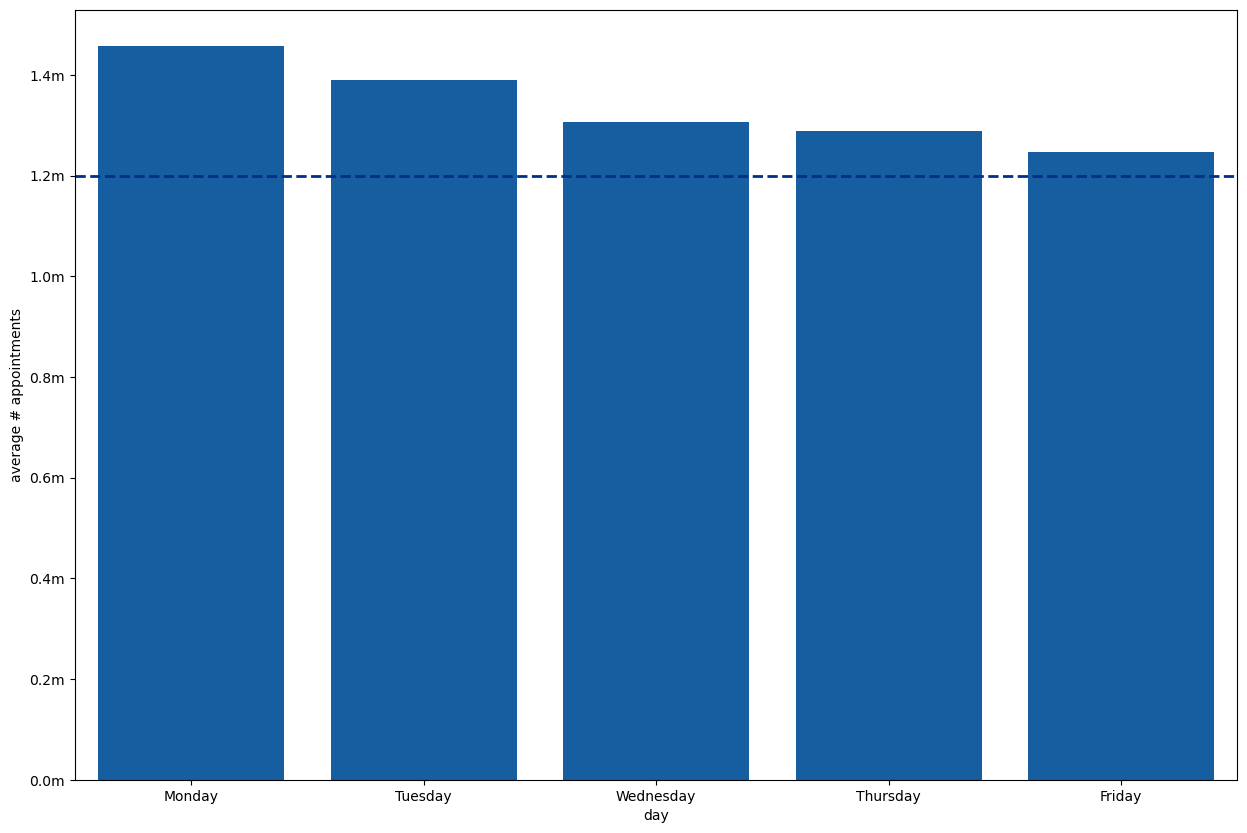

In [258]:
# Run same chart for just November
# Create a barplot of weekdays
plt.figure(figsize=(15, 10))
sns.barplot(x='day', y='average # appointments', data=avg_app_dow_nov, color='#005EB8')

# Add a line to show capacity
plt.axhline(y=1200000, color='#003087', linestyle='--', linewidth=2, label='capacity') # used NHS Dark Blue ##003087

# Apply previously created function to convert y-axis numbers to millions (i.e. x.xm)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Save the as image (PNG)
plt.savefig("plot5.png", dpi=300, bbox_inches="tight") 

# Show the plot
plt.show()

#### 6d) The average weekday is over capacity in every month other than August

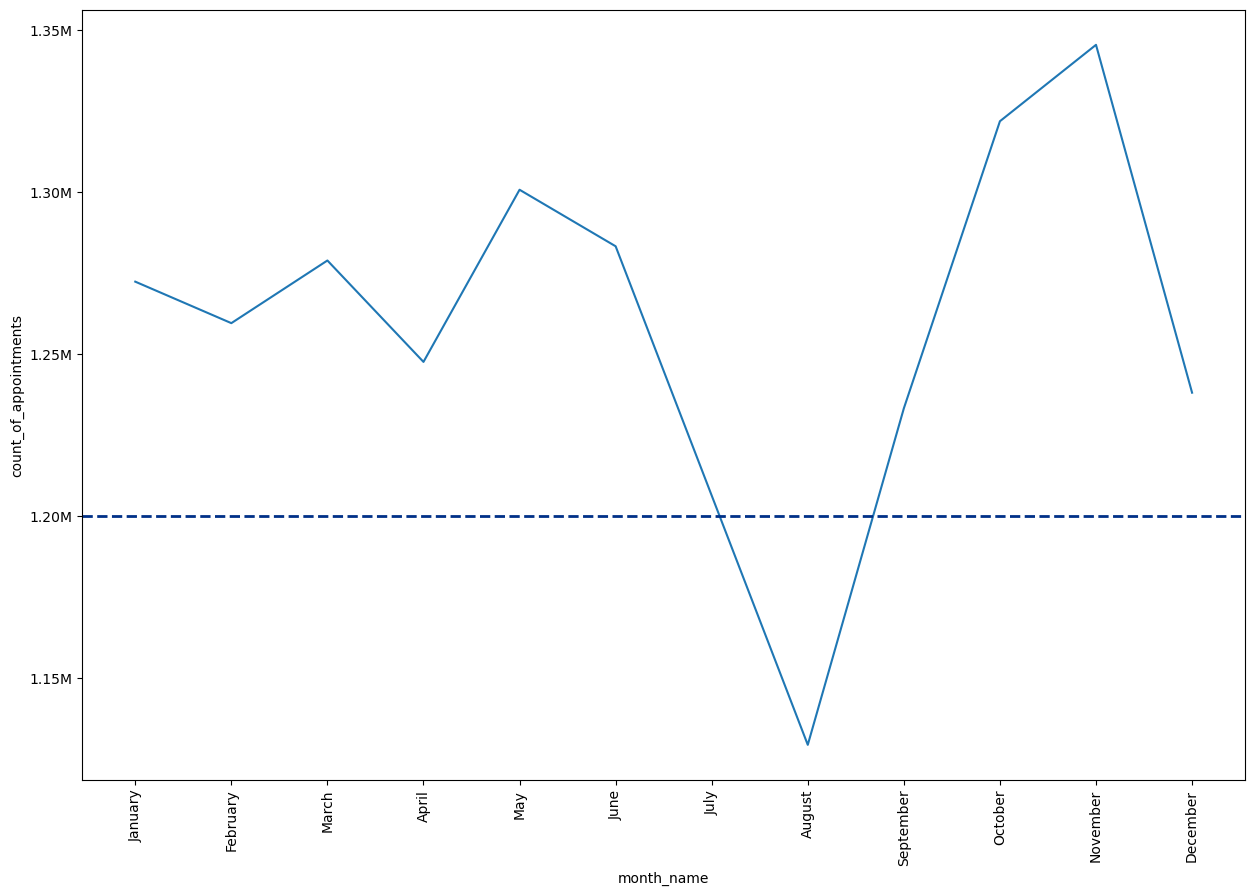

In [260]:
# Show visualisation of average # weekday appointments through the year
# Create a lineplot for just weekdays
plt.figure(figsize=(15, 10))
sns.lineplot(x='month_name', y='count_of_appointments', data=avg_app_dow_mon)

# Define a function to format Y-axis values with 2 decimal places
def millions_formatter_2(x, pos):
    return f'{x / 1_000_000:.2f}M'

# Add a line to show capacity
plt.axhline(y=1200000, color='#003087', linestyle='--', linewidth=2, label='capacity') # used NHS Dark Blue ##003087

# Apply previously created function to convert y-axis numbers to millions with 2 decimal places
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter_2))

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Save the as image (PNG)
plt.savefig("plot6.png", dpi=300, bbox_inches="tight") 

# Show the plot
plt.show()

#### 6e) 90% of appointments occur in General Practice


<Figure size 1500x1000 with 0 Axes>

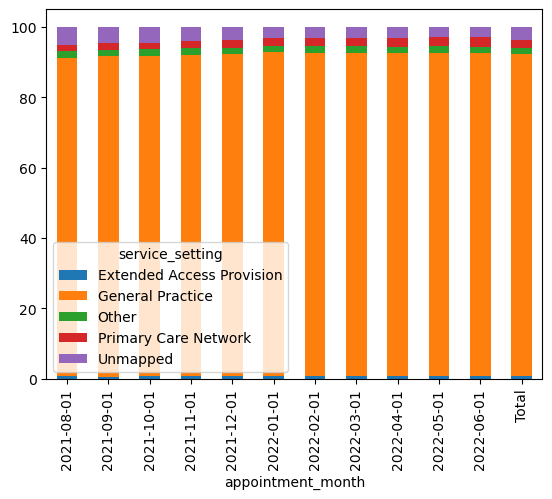

In [262]:
# Create a stacked barchart to visualise the difference in months
plt.figure(figsize=(15, 10))
nc_monthly_ss_pct[[
    'Extended Access Provision', 
    'General Practice', 'Other',
    'Primary Care Network', 'Unmapped']].plot(
    kind='bar', stacked=True)

# Save the as image (PNG)
plt.savefig("plot8.png", dpi=300, bbox_inches="tight") 

# Show the plot
plt.show()

#### 6f) 52% of appointments are handled by GPs

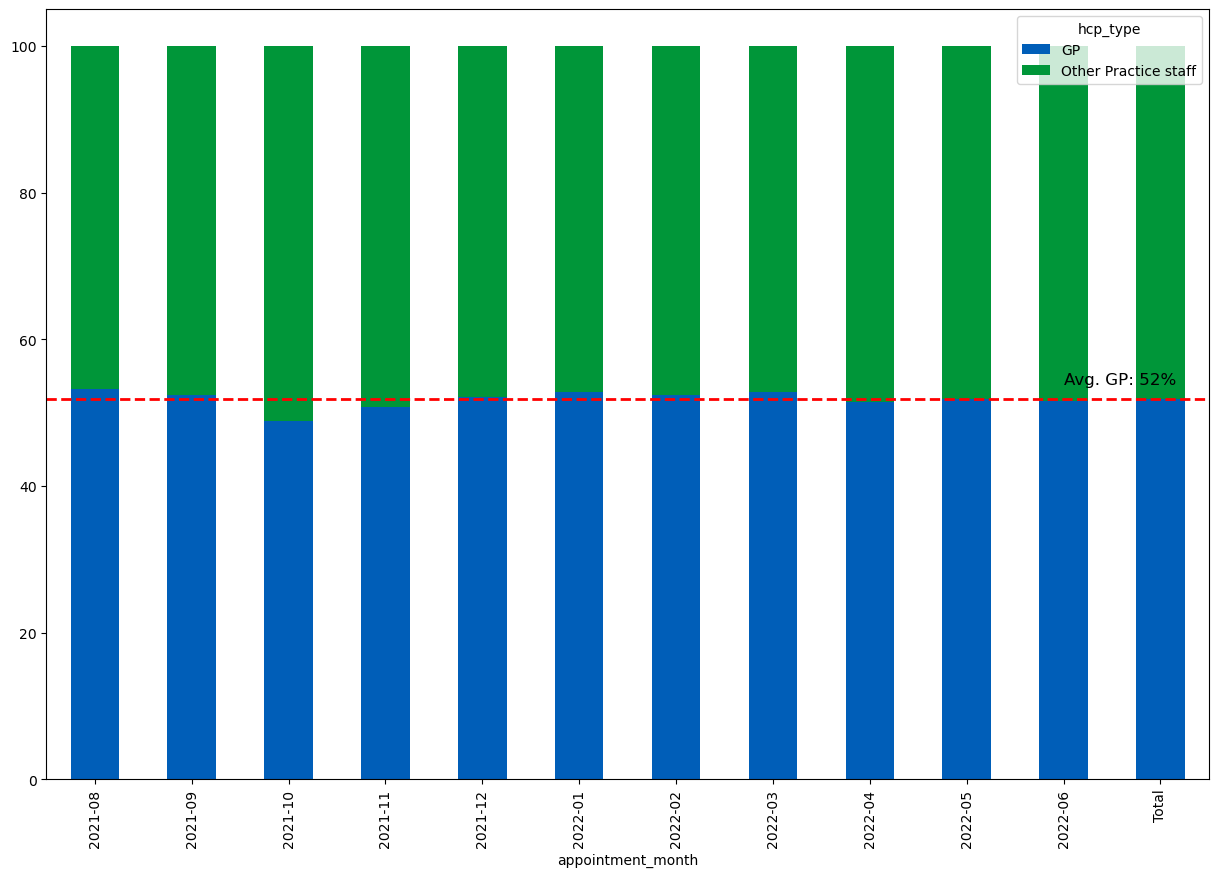

In [264]:
# Show 52% of appointments handled by GPs
# Create a stacked barchart to visualise the difference in HCP by month
fig, ax = plt.subplots(figsize=(15, 10))

app_x_day_hcp_pct[['GP', 'Other Practice staff']].plot(
    kind='bar', stacked=True, ax=ax, color=['#005EB8', '#009639']) # used NHS Blue #005EB8 and NHS Green #009639

# Calculate the average percentage for 'GP'
average_gp = app_x_day_hcp_pct['GP'].mean()

# Add a horizontal line for the average GP percentage
ax.axhline(y=average_gp, color='red', linestyle='--', linewidth=2, label=f'Avg GP: {average_gp:.1f}%')

# Add a text label above the line
ax.text(x=len(app_x_day_hcp_pct) - 2, 
        y=average_gp + 2, 
        s=f"Avg. GP: {average_gp:.0f}%", 
        color='black', 
        fontsize=12, 
        fontweight='light')

# Save the as image (PNG)
plt.savefig("plot7.png", dpi=300, bbox_inches="tight") 

# Show the plot
plt.show()


#### 6g) This means GPs are doing over the recommended max 25 appointments per day

##### The European Union of General Practitioners and BMA have recommended a safe level of patient contacts per day in order for a GP to deliver safe care at not more than 25 contacts per day.(https://www.bma.org.uk/advice-and-support/gp-practices/managing-workload/safe-working-in-general-practice/daily-working-contacts#:~:text=The%20European%20Union%20of%20General,significantly%20in%20excess%20of%20this.)

In [267]:
# Apply 52% of appointments are done by GPs to average weekday appointments dataframe
# Show relevant dataframe
avg_app_dow.head()

,day,average # appointments
1,Monday,1387447
3,Tuesday,1314824
4,Wednesday,1228839
2,Thursday,1216870
0,Friday,1182204


In [268]:
# Create new dataframe to add estimated number of daily appointment done by GP
avg_app_dow_gp = avg_app_dow.copy()

avg_app_dow_gp


,day,average # appointments
1,Monday,1387447
3,Tuesday,1314824
4,Wednesday,1228839
2,Thursday,1216870
0,Friday,1182204


In [269]:
# Add column showing estimated number of appintments (i.e. 52% of appointments)
# Create new dataframe adding column showing estimated number of daily appointment done by GP
avg_app_dow_gp['gp appointments'] = avg_app_dow_gp['average # appointments']*.52

avg_app_dow_gp

,day,average # appointments,gp appointments
1,Monday,1387447,721473
3,Tuesday,1314824,683708
4,Wednesday,1228839,638996
2,Thursday,1216870,632773
0,Friday,1182204,614746


In [270]:
# Add number of GPs column
avg_app_dow_gp['# of GPs'] = 28197 #source https://www.bma.org.uk/advice-and-support/nhs-delivery-and-workforce/pressures/pressures-in-general-practice-data-analysis

avg_app_dow_gp

,day,average # appointments,gp appointments,# of GPs
1,Monday,1387447,721473,28197
3,Tuesday,1314824,683708,28197
4,Wednesday,1228839,638996,28197
2,Thursday,1216870,632773,28197
0,Friday,1182204,614746,28197


In [271]:
# Add column showing number of appointments per GP per day
avg_app_dow_gp['daily apps per GP'] = avg_app_dow_gp['gp appointments'] / avg_app_dow_gp['# of GPs']

avg_app_dow_gp

,day,average # appointments,gp appointments,# of GPs,daily apps per GP
1,Monday,1387447,721473,28197,26
3,Tuesday,1314824,683708,28197,24
4,Wednesday,1228839,638996,28197,23
2,Thursday,1216870,632773,28197,22
0,Friday,1182204,614746,28197,22


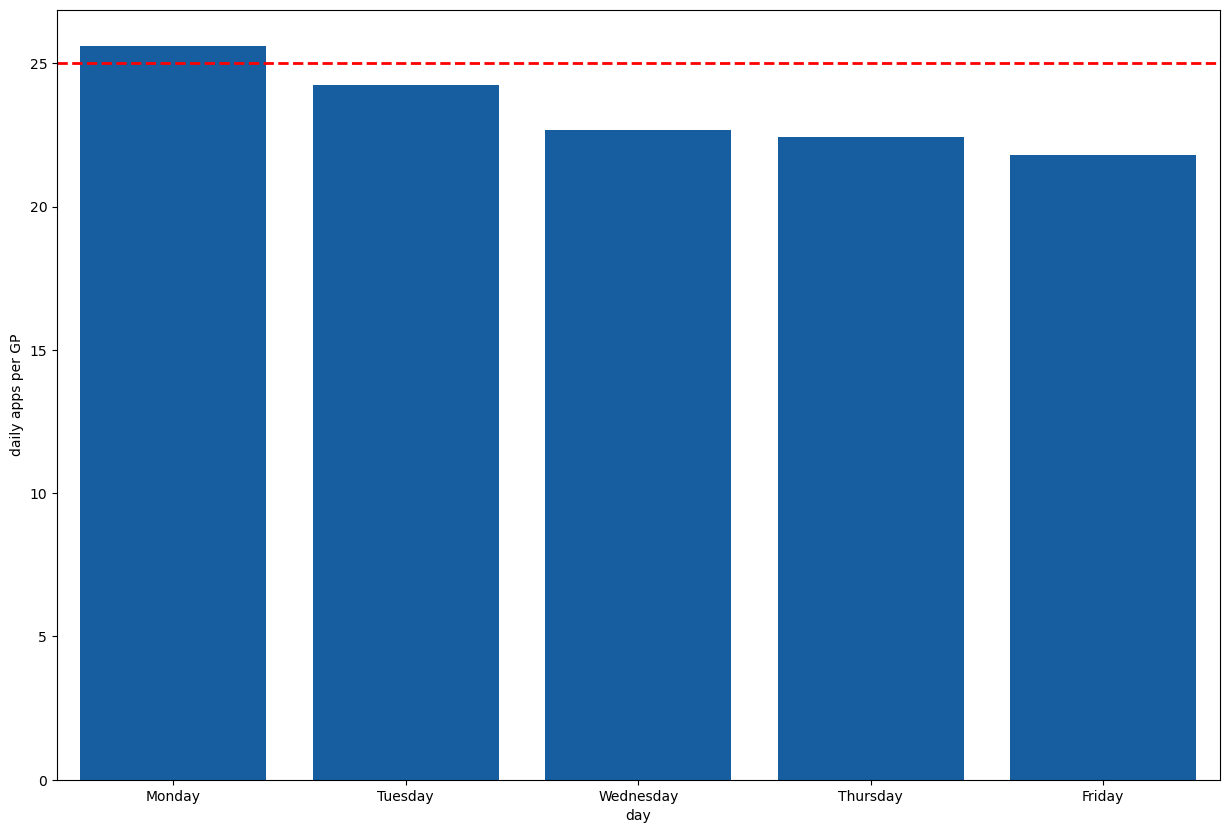

In [272]:
# Show number of appointments per GP per day on chart
# Create a barplot of GP appointments per day
plt.figure(figsize=(15, 10))
sns.barplot(x='day', y='daily apps per GP', data=avg_app_dow_gp, color='#005EB8')

# Add a line to show capacity
plt.axhline(y=25, color='red', linestyle='--', linewidth=2, label='capacity') # used NHS Dark Blue ##003087

# Save the as image (PNG)
plt.savefig("plot8.png", dpi=300, bbox_inches="tight") 

# Show the plot
plt.show()

#### 6h) There is a significant spike in 'Other Practice staff' appointments in October

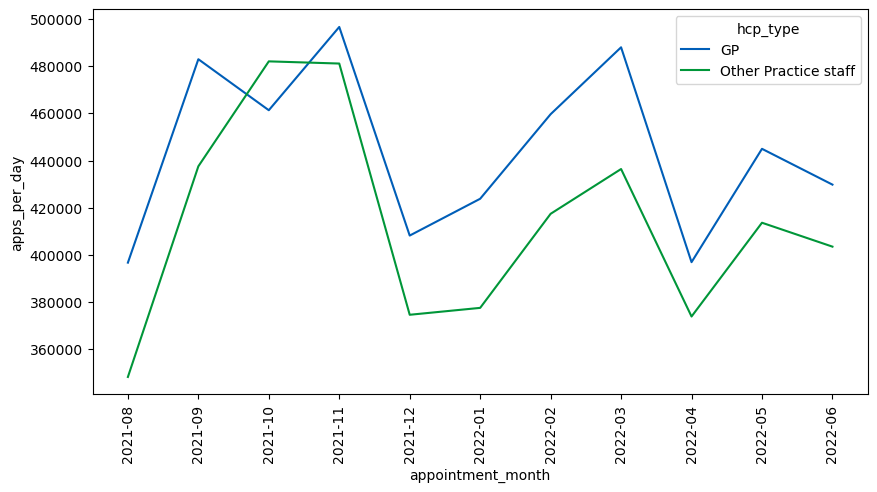

In [274]:
# Create linechart to show change over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='appointment_month', y='apps_per_day', hue='hcp_type', data=app_x_day_hcp,
    palette={'GP': '#005EB8', 'Other Practice staff': '#009639'})

# Rotate x-axis marks to make them readable
plt.xticks(rotation=90)

# Save the as image (PNG)
plt.savefig("plot9.png", dpi=300, bbox_inches="tight") 

# Show the plot
plt.show()

#### 6i) This appears to be driven by uplift in Planned Clinical Procedures at this time (likely due to Flu Vaccine)

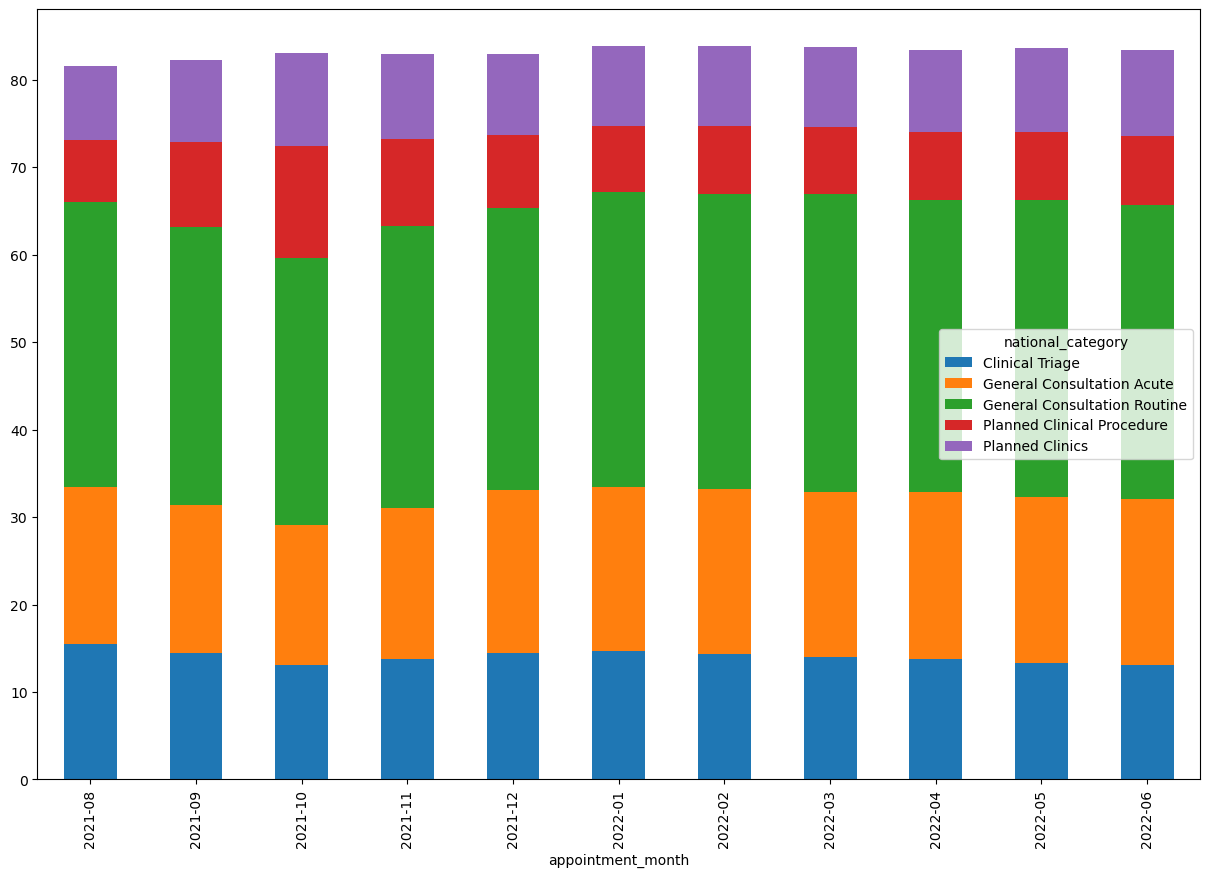

In [276]:
# Create a stacked barchart to visualise the difference in months
nc_monthly_nc_pct[[
       'Clinical Triage', 'General Consultation Acute',
       'General Consultation Routine',
        'Planned Clinical Procedure',
       'Planned Clinics']].plot(
    kind='bar', stacked=True, figsize=(15, 10))

# Show the plot
plt.show()

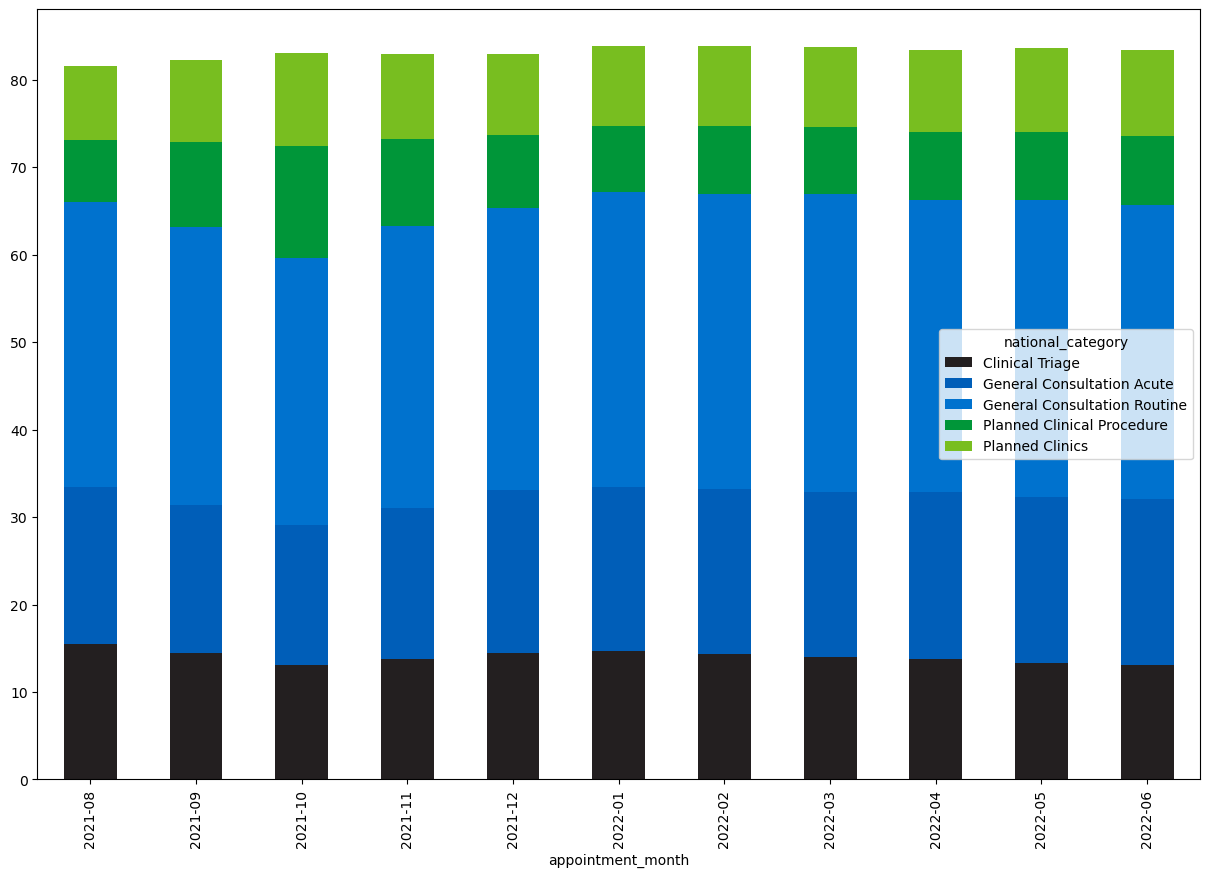

In [277]:
# Define NHS colours for each category
colours = ['#231f20', '#005EB8', '#0072CE', '#009639', '#78BE20']

# Create a stacked barchart to visualise the difference in months
nc_monthly_nc_pct[[
       'Clinical Triage', 'General Consultation Acute',
       'General Consultation Routine',
        'Planned Clinical Procedure',
       'Planned Clinics']].plot(
    kind='bar', stacked=True, figsize=(15, 10), color=colours)

# Save the as image (PNG)
plt.savefig("plot10.png", dpi=300, bbox_inches="tight") 

# Show the plot
plt.show()

#### 6j) 4%-5% are appointments are lost through no-shows

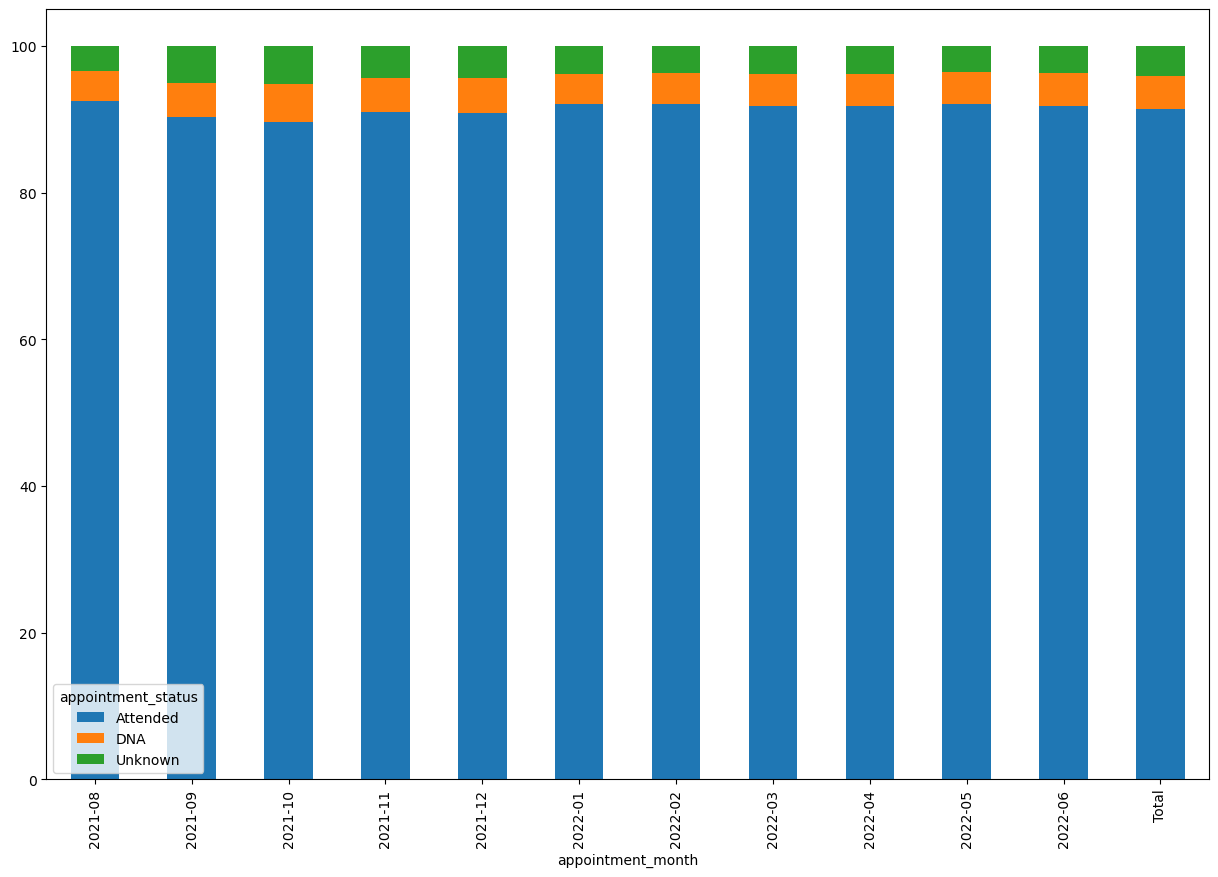

In [279]:
# Create a stacked barchart to visualise the difference in months
apps_x_day_as_pct[['Attended', 'DNA', 'Unknown']].plot(
    kind='bar', stacked=True, figsize=(15, 10))

plt.show()

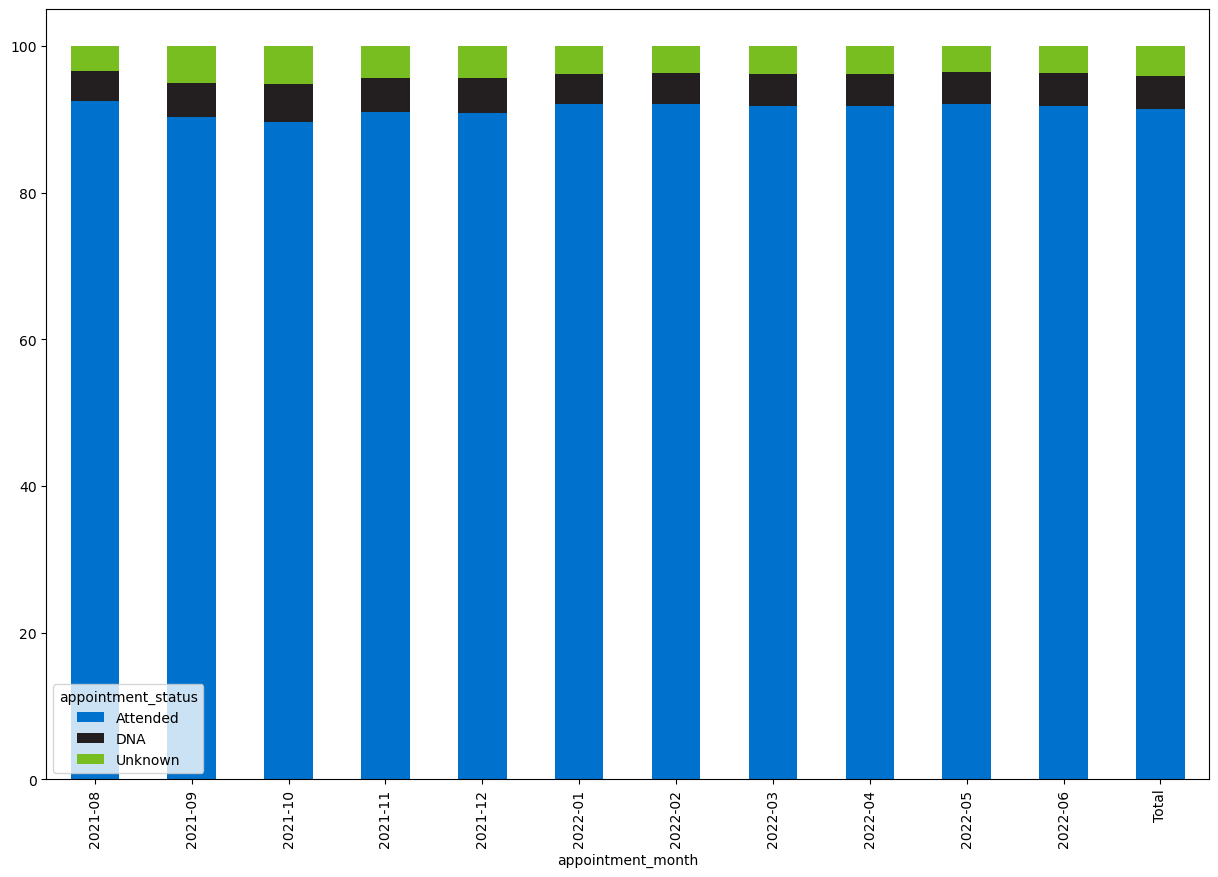

In [280]:
# Define NHS colours for each category
colours = ['#0072CE','#231f20', '#78BE20']

# Create a stacked barchart to visualise the difference in months
apps_x_day_as_pct[['Attended', 'DNA', 'Unknown']].plot(
    kind='bar', stacked=True, figsize=(15, 10), color=colours)

# Save the as image (PNG)
plt.savefig("plot11.png", dpi=300, bbox_inches="tight") 

plt.show()

#### 6k) Twitter data provided limited insight as it was unstructured and inconsistent

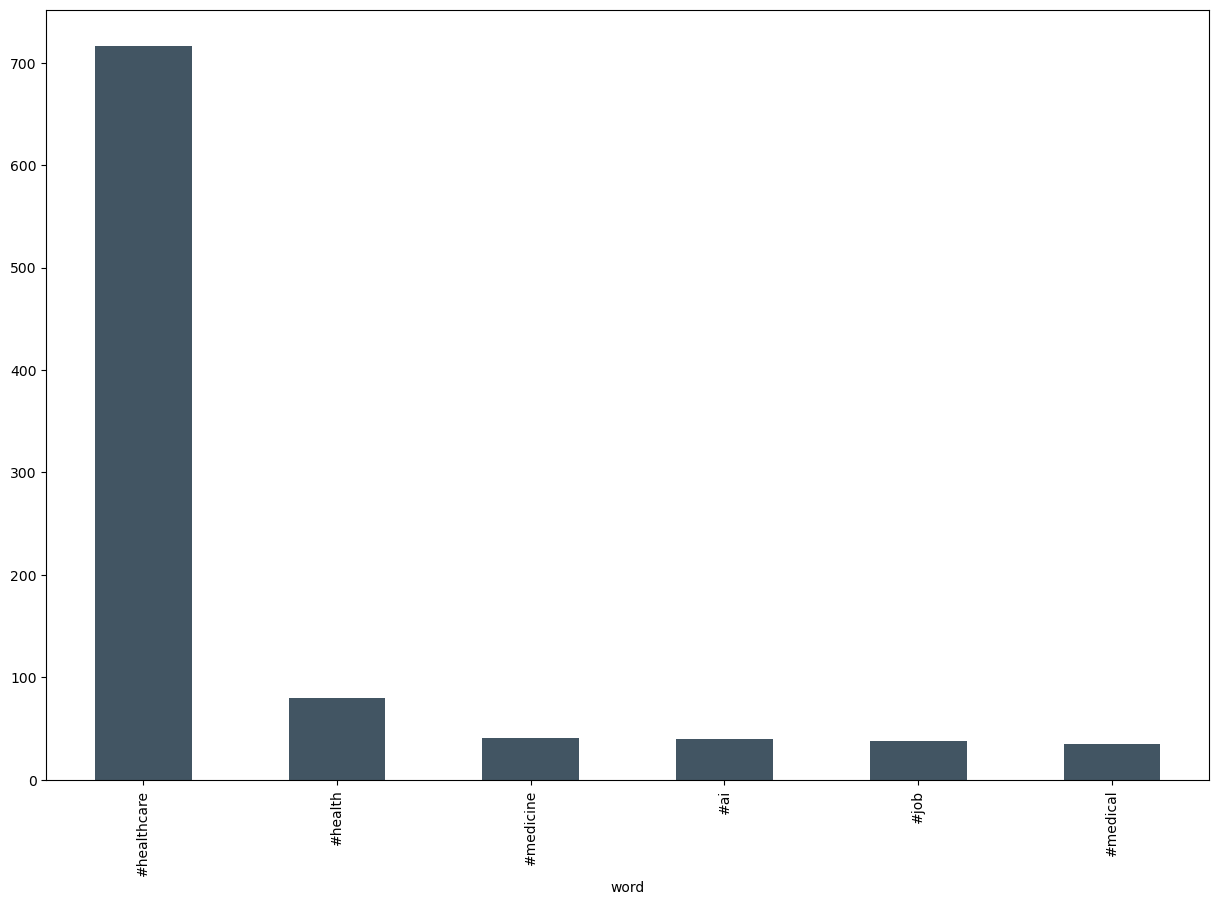

In [282]:
# Create a barchart to visualise the most popular tags
plt.figure(figsize=(15, 10))
tags_df_flt.set_index('word')['count'].plot(
    kind='bar', color='#425563')

# Save the as image (PNG)
plt.savefig("plot12.png", dpi=300, bbox_inches="tight") 

# Show the plot
plt.show()

## 7) Recommendation Summary

##### Business Recommendations

- Capacity needs to be increased by an estimated 2,640 FTEs* to meet average weekday demand. 
- Incentivize GPs to open over weekends to reduce pent-up demand which is amplifying capacity issues
- Start annual vaccine programs as early as possible to reduce appointments at busiest time of year
- Explore measures to reduce unattended appointments such as financial penalties or incentives for attending
- Before investment in further Twitter data, use NHS account for customer service, promoting own hashtags to aid analysis

##### Analytical Recommendations
- Create clear standardization of data entry to improve data quality
- Further exploration on retention of GPs required (September 2015 -July 2022, a decrease of 6.3% of the GP workforce*)
- Further exploration into regions and geographies, with direction on capacity for each area